# CREDIT EDA CASE STUDY

Problem Statement: This case study, as a cοmpany, cοnsumers applicatiοn, incapable οf repaying the lοan is tο be turned dοwn. Here we attempt tο determine trends suggesting that a client's credit histοry is nοt οptimal using EDA. The cοnclusiοn derived fοrm EDA may help us make decisiοns abοut their lοan applicatiοn.

In [1]:
# importing necessary libraries
import numpy as np, pandas as pd    
import matplotlib.pyplot as plt, seaborn as sns   #Data Visualization libraries

import warnings   #Filtering out the warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",300)    #to display all the columns
pd.set_option("display.max_rows",300)   #to display all the rows

### 1. LOAD THE DATA:

In [2]:
app_df=pd.read_csv("application_data.csv")
prev_app=pd.read_csv("previous_application.csv")

### 2. CHECKING THE STRUCTURE OF THE DATA:

In [3]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
app_df.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [5]:
app_df.shape

(307511, 122)

2.1 **Dealing with incorrect data types-app_df**

In [6]:
app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### 3. Data quality check and missing values: 

**3.1 Inspecting Data Quality**

In [8]:
app_df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [9]:
# checking the percentage of the missing values in the each column
(app_df.isnull().sum()/len(app_df)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

**3.2 Handling the Missing Values**

In [10]:
# removing columns with high missing values percentage
app_df=app_df.loc[:,(app_df.isnull().sum()/len(app_df)*100)<50] # here we consider 50% as the threshold

In [11]:
app_df.shape

(307511, 81)

In [12]:
round(app_df.isnull().sum()/len(app_df)*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [13]:
# getting columns with null values greater than 0% and less than or equal to 40%
temp=app_df.columns[((app_df.isnull().sum()/len(app_df)*100)<=40) & ((app_df.isnull().sum()/len(app_df)*100)>0)]
print(temp)
print(len(temp))

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')
18


**3.3 Handling Outlier values and NULL Values**

**3.3.1 AMT_ANNUITY imputation**

In [14]:
app_df[app_df['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64



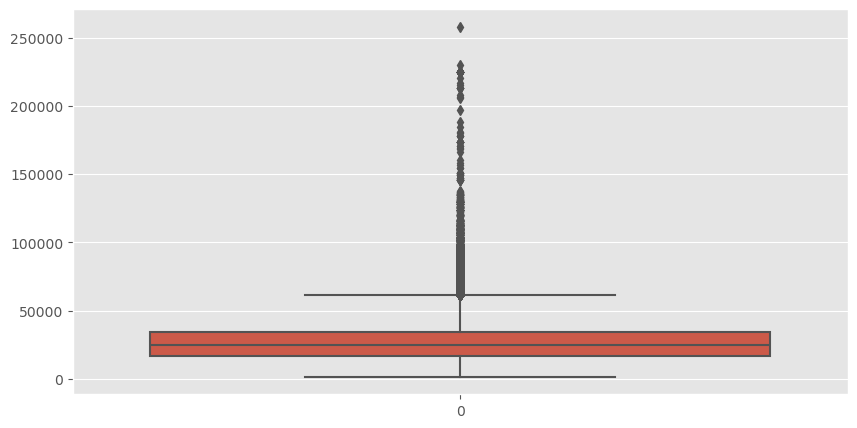

In [15]:
# Checking for the outliers using statistical summary of AMT_ANNUITY column and boxplot
print(app_df['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(app_df['AMT_ANNUITY'])
plt.show()

**Observations**:Looking at the statistical summary,we can see that

* 99th percentile is far of from max value.This is a clear indicated in the boxplot well that outliers are present. 
* **We have to impute the median value 24903 in placeof missing values.** 

**3.3.2 AMT_GOODS_PRICE Imputation**

observations:
* AMT_GOODS_PRICE-For consumer loans it is the price of the goods for which the loan is given.
* Missing values in percentage is 0.090403.
* It is Numeric variable hence we can use describe boxplot to check for outliers.

In [16]:
# inspecting AMT_GOODS_PRICE column
app_df[app_df['AMT_GOODS_PRICE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F            N   
5937      106955       0    Revolving loans           F            N   
6425      107494       0    Revolving loans           F            N   
6703      107822       0    Revolving loans           F            N   
7647      108913       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724               NaN             NaN  Commercial associate   
5937              NaN             NaN               Working   
6425              NaN             NaN               Working   
6703              NaN             NaN               Working   
7647              NaN             NaN               Working   

                NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
724   Secondary / secondary special               Married  House / apartment   
5937  Secondary / secondary special               Married  House / apartment   
6425               Higher education               Married  House / apartment   
6703  Secondary / secondary special        Civil marriage  House / apartment   
7647               Higher education  Single / not married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
724                     0.024610      -10072           -381   
5937                    0.010006      -11993          -2921   
6425                    0.008474       -9727          -2712   
6703                    0.011657      -11079           -899   
7647                    0.032561       -9986          -1847   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
724              -519.0            -1834           1               1   
5937            -1289.0            -1948           1               1   
6425            -4132.0             -800           1               1   
6703            -3765.0             -572           1               1   
7647            -4762.0             -506           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
724                 1                 1           0           0   
5937                1                 1           1           1   
6425                1                 1           1           0   
6703                1                 1           1           0   
7647                1                 1           1           0   

            OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
724              Core staff              4.0                     2   
5937  Private service staff              2.0                     2   
6425            Accountants              2.0                     2   
6703               Managers              3.0                     1   
7647         Security staff              1.0                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
724                             2                  WEDNESDAY   
5937                            2                   SATURDAY   
6425                            2                  WEDNESDAY   
6703                            1                  WEDNESDAY   
7647                            1                   SATURDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
724                        14                           0   
5937                       13                           0   
6425                  

count     307233.0
mean      538396.0
std       369446.0
min        40500.0
10%       180000.0
25%       238500.0
50%       450000.0
75%       679500.0
99%      1800000.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64



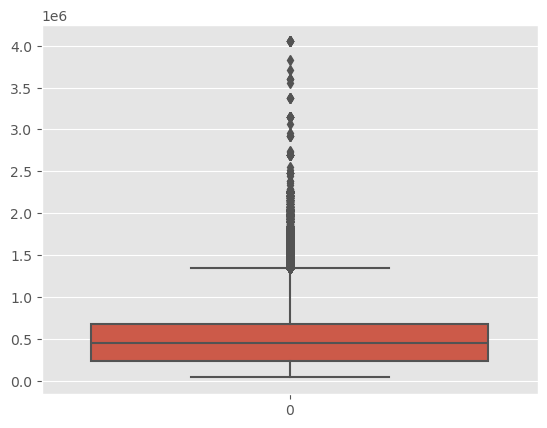

In [17]:
# checking for the outliers using statistical summary of AMT_GOODS_PRICE column and boxplot
print(round(app_df['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99])))
print()
sns.boxplot(app_df['AMT_GOODS_PRICE'])
plt.show()

**Observations**: Looking at the statistical summary, we can clearly see that 
* 99th percentile is far off from max value. This is a clear indicated in the boxplot well that outliers are present.
* Though there are values above 2000000 they cannot be treated as outliers as it could be a valid goods price


#### 3.3.3 NAME_TYPE_SUITE Imputation
**Observations**: 
* NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan, is a categorical column
* Missing values percentage is 0.420148

In [18]:
# Checking for the maximum repeated value in NAME_TYPE_SUITE
print(app_df['NAME_TYPE_SUITE'].value_counts())
print(app_df['NAME_TYPE_SUITE'].mode()[0])

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
Unaccompanied


**Observatiοns**: 
* Value cοunts, clearly states that the majοrity οf NAME_TYPE_SUITE is under 'Unaccοmpanied' value.
* <b>Its safe tο assume that if NAME_TYPE_SUITE is null, either its nοt a necessary cοlumn tο fill οr client might nοt have anyοne accοmpaning him while applying fοr lοan.


#### 3.3.4 CNT_FAM_MEMBERS Imputation
**Observations**: 
* CNT_FAM_MEMBERS - How many family members dοes client have, is a Numeric variable
* Missing values percentage is 0.000650
* We can use .describe bοxplοts to check for outliers

In [19]:
# inspecting CNT_FAM_MEMBERS column
app_df[app_df['CNT_FAM_MEMBERS'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
41982            NaN                          NaN            NaN   
187348      0.670652                        0.997          0.375   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
41982                            NaN             NaN   
187348                         0.997           0.375   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
41982                            NaN             NaN             NaN   
187348                         0.997           0.375          0.0791   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
41982                  NaN                       3.0   
187348                  No                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
41982                        0.0                       3.0   
187348                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
41982                        0.0                  -876.0                0   
187348                       0.0                  -654.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
41982                 0                0                1     

count    307509.00
mean          2.15
std           0.91
min           1.00
10%           1.00
25%           2.00
50%           2.00
75%           3.00
99%           5.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64



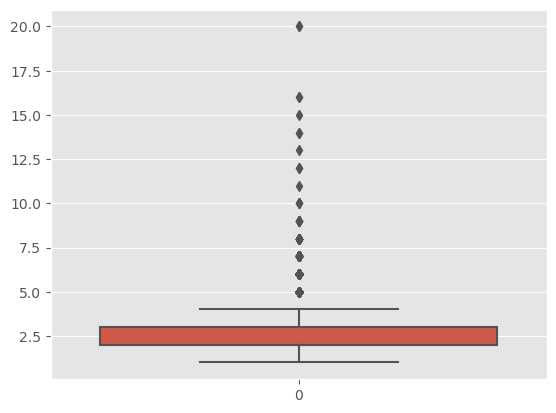

In [20]:
# checking for outliers using statistcal summary of CNT_FAM_MEMBERS and boxplot
print(round(app_df['CNT_FAM_MEMBERS'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()
sns.boxplot(app_df['CNT_FAM_MEMBERS'])
plt.show()

**Observations**: Lοοking at the statistical summary, we can clearly see that
* 99th percentile is far οff frοm max value. There are οutlier but values aren't wrοng.
* Peοple can have any number οf family members living with them.


#### 3.3.5 OCCUPATION_TYPE Imputation
**Observations**: OCCUPATION_TYPE is a categorical variable

In [21]:
# checking for maximum repeated value in OCCUPATION_TYPE
print(app_df['OCCUPATION_TYPE'].value_counts())
print(app_df['OCCUPATION_TYPE'].mode()[0])

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64
Laborers


**Observatiοns**: 
* Majοrity οf the peοple whο applied fοr lοan are wοrking as Labοrers.
* <b> Here its best tο create a separate cοlumn fοr null values in 'OCCUPATION_TYPE' cοlumn.


In [22]:
# filling NaN values with others 
app_df['OCCUPATION_TYPE'].fillna(value='Unknown',inplace=True)

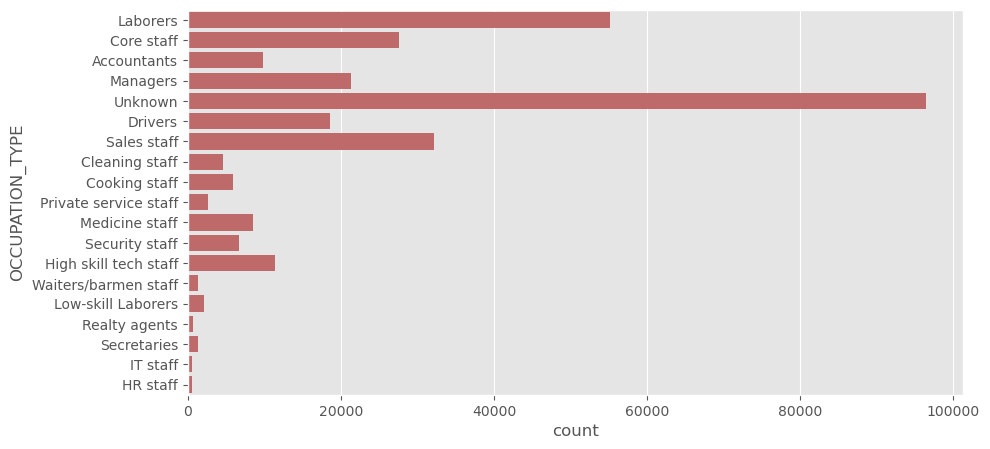

In [23]:
# plotiing the count plot to see distribution of the column
plt.figure(figsize=[10,5])
sns.countplot(data=app_df,y="OCCUPATION_TYPE",color="indianred")
plt.show()

#### 3.3.6 EXT_SOURCE_2 Imputation
**Observations**: 
* EXT_SOURCE_2 - Normalized score from external data source, is a numerical variable
* Missing percentage value is 0.214626
* We can use .describe boxplots to check for outliers

count    306851.0000
mean          0.5144
std           0.1911
min           0.0000
10%           0.2157
25%           0.3925
50%           0.5660
75%           0.6636
99%           0.7828
max           0.8550
Name: EXT_SOURCE_2, dtype: float64



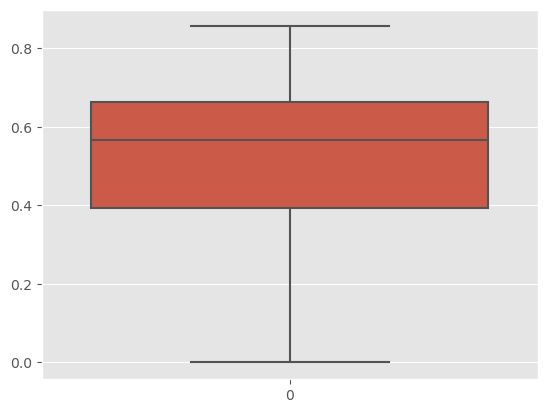

In [24]:
print(round(app_df['EXT_SOURCE_2'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4))
print()
sns.boxplot(app_df['EXT_SOURCE_2'])
plt.show()

**Observations**: 
* EXT_SOURCE_2 has no outliers


#### 3.3.7 AMT_CREDIT Imputation
**Observations**: 
* AMT_CREDIT - Credit amount of the loan, is a numerical variable
* We can use .describe boxplots to check for outliers

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
10%      1.800000e+05
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
99%      1.854000e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64



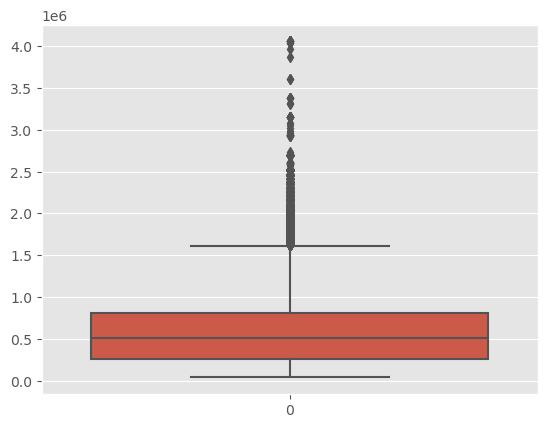

In [25]:
print(round(app_df['AMT_CREDIT'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4))
print()
sns.boxplot(app_df['AMT_CREDIT'])
plt.show()

**Observations**: Looking at the statistical summary, we can clearly see that the 99th percentile is far off from max value. There are outlier but values aren't wrong.
* People with higher credit score or salary can have higher loan amount getting approved. 
* <b>We can consider amount above 1854000.00 as outlier</b>


#### 3.3.8 EXT_SOURCE_3 Imputation
**Observations**: 
* EXT_SOURCE_3 - Normalized score from external data source, is a numerical variable
* Missing values percentage is 19.825307
* We can use .describe boxplots to check for outliers

count    246546.0000
mean          0.5109
std           0.1948
min           0.0005
10%           0.2276
25%           0.3706
50%           0.5353
75%           0.6691
99%           0.8328
max           0.8960
Name: EXT_SOURCE_3, dtype: float64



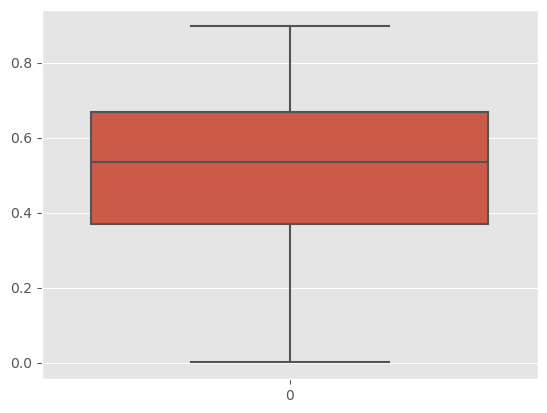

In [26]:
print(round(app_df['EXT_SOURCE_3'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4))
print()
sns.boxplot(app_df['EXT_SOURCE_3'])
plt.show()

**Observations**: 
* We see that EXT_SOURCE_3 has no outliers 
* The number of null values is very high.


#### 3.3.9 Number of enquiries to Credit Bureau Imputation
**Observations**: Cοlumns with numbers οf enquiries tο Credit Bureau cοlumns are:
1. AMT_REQ_CREDIT_BUREAU_YEAR,
2. AMT_REQ_CREDIT_BUREAU_QRT,
3. AMT_REQ_CREDIT_BUREAU_MON,
4. AMT_REQ_CREDIT_BUREAU_WEEK,
5. AMT_REQ_CREDIT_BUREAU_DAY,
6. AMT_REQ_CREDIT_BUREAU_HOUR<br>

<ul> <li>These are numerical variables</li>
    <li>Missing percentage values is 13.50%
<li> This value refers tο number οf times client tried tο access Bureau tο access his credit scοre
    <li> Null values suggests, applicant hasn't gοt any lοan
<li> We can use .describe bοxplοts tο check fοr οutliers</li>

In [27]:
app_df[['AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [28]:
app_df[['AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
0                        0.0                         0.0

**Observations**:

* AMT_REQ_CREDIT_BUREAU_YEAR
 * Mean : 1.899974
 * Median : 1.000000
 * Mode : 0
 
* AMT_REQ_CREDIT_BUREAU_QRT
 * Mean : 0.265474
 * Median : 0
 * Mode : 0
 
* AMT_REQ_CREDIT_BUREAU_MON
 * Mean : 0.267395
 * Median : 0
 * Mode : 0
 
* AMT_REQ_CREDIT_BUREAU_WEEK
 * Mean : 0.034362 
 * Median : 0
 * Mode : 0
 
* AMT_REQ_CREDIT_BUREAU_DAY
 * Mean : 0.007000 
 * Median : 0
 * Mode : 0
 
* AMT_REQ_CREDIT_BUREAU_HOUR
 * Mean : 0.006402 
 * Median : 0
 * Mode : 0
 
**We don't impute any value as nullable values percentage is higher and it might introduce bias in the data**

#### 3.3.10 OBS_30_CNT_SOCIAL_CIRCLE Imputation
**Observations**:
* OBS_30_CNT_SOCIAL_CIRCLE - Number of client's 30 DPD (days past due) default is a numerical column
* Missing values percentage is 0.33%
* We can use .describe boxplots to check for outliers

count    306490.00
mean          1.42
std           2.40
min           0.00
10%           0.00
25%           0.00
50%           0.00
75%           2.00
99%          10.00
max         348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64



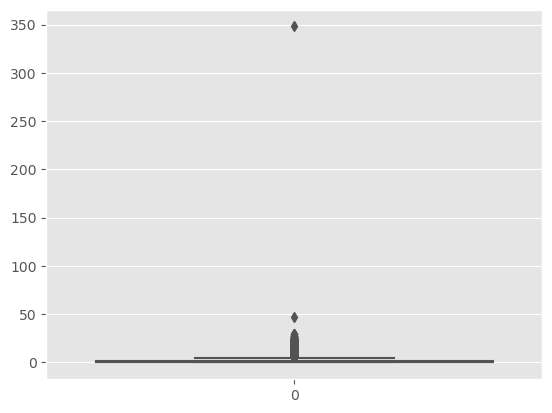

In [29]:
print(round(app_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()
sns.boxplot(app_df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

**Observations**:Looking at the statistical summary, we can clearly see that the 99th percentile is far off from max value. 
* There are two outlier values near 50 and 350.
* Mode: 0.0
* Mean: 1.42
* Median: 0.0


### 3.4 Inspecting incorrect/unknown data values
**Observations**:
* There are a couple οf cοlumns like gender, marital status, year οf birth where we can use cοmmοn sense tο knοw what will the undrlying values be

#### 3.4.1 inspecting CODE_GENDER column
**Observations**:
* Gender can be Male or Female.

In [30]:
# checking the distrbution of genders
app_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

**Observations**:
* Female applicants are almost twice the number of Male applicants
* XNA may imply that the client may not wish to specify the gender or it might have got missed while entering application

In [31]:
# checking the rows where gender is XNA
app_df[app_df['CODE_GENDER']=='XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657            -10024.0            -3537           1               1   
38566             -2241.0            -4659           1               1   
83382              -183.0            -1671           1               1   
189640            -4099.0            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640             Unknown              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

**Observations**:
* We can impute CODE_GENDER with 'F' 
* Count of XNA is very low it wouldn't cause any unbalanced biases.

In [32]:
# replacing XNA with F and then checking the count of males and females
app_df['CODE_GENDER']=app_df['CODE_GENDER'].apply(lambda x:'F' if x=='XNA' else x)
app_df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

#### 3.4.2 inspecting DAYS_BIRTH column
**Observations**:
* DAYS_BIRTH - Client's age in days at the time of application

In [33]:
# Checking statistical summary of the column
app_df['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

**Observations**:
* Date of birth cann't be negative
* Also have to convert days to years for data to make sense

In [34]:
# Converting DAYS_BIRTH to positive days
app_df['DAYS_BIRTH']=app_df['DAYS_BIRTH'].apply(lambda x:abs(x) if x<0 else x)
app_df['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


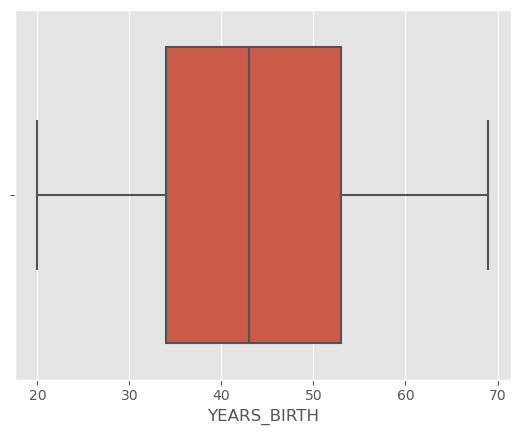

In [35]:
# Creating  a new column YEARS_BIRTH for ease of analysis
app_df['YEARS_BIRTH']=app_df['DAYS_BIRTH'].apply(lambda x:(x//365))
print(app_df['YEARS_BIRTH'].describe())
sns.boxplot(data=app_df,x='YEARS_BIRTH')
plt.show()

**Observations**:
* Min age of applicant is 21
* Max age of applicant is 69
* Mean and median is very close to each other i.e 43
* There are no outliers
* Most of the applicants are in the age group between 34 to 54

#### 3.4.3 inspecting NAME_FAMILY_STATUS column
**Observations**:
* NAME_FAMILY_STATUS - Family status of the client
* It is a categorical column

In [36]:
# checking the NAME_FAMILY_STATUS of applicants
app_df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

**Observations**:
* Unknown value indicates that the value wasn't specified by applicant or data was missed while processing the application

In [37]:
# checking the rows where the NAME_FAMILY_STATUS is unknown
app_df[app_df['NAME_FAMILY_STATUS']=='Unknown'] 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221       12396          -1161   
187348                    0.031329       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
41982            NaN                          NaN            NaN   
187348      0.670652                        0.997          0.375   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
41982                            NaN             NaN   
187348                         0.997           0.375   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
41982                            NaN             NaN             NaN   
187348                         0.997           0.375          0.0791   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
41982                  NaN                       3.0   
187348                  No                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
41982                        0.0                       3.0   
187348                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
41982                        0.0                  -876.0                0   
187348                       0.0                  -654.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
41982                 0                0                1     

**Observations**:
* Data looks valid
* <b>We can impute missing values with mode if the column i.e. 'Married'</b>

In [38]:
# replacing 'Unknown' with 'Married'
app_df['NAME_FAMILY_STATUS']=app_df['NAME_FAMILY_STATUS'].apply(lambda x:'Married' if x=='Unknown' else x)
app_df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

**Observations**:
* <b>Married people are the ones mostly applying for loan followed by Single or Not married</b>
* <b>Widows are the ones who have less number of application for a loan</b>

#### 3.4.4 inspecting DAYS_EMPLOYED column
**Observations**:
* DAYS_EMPLOYED - How many days before the application the person started current employment

In [39]:
# checking statistical summary of the column
app_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

**Observations**:
* Days of employement cann't be negative
* Alsο have tο cοnvert days tο years fοr data to make sense

In [40]:
# Converting DAYS_EMPLOYED to positive days to and statistical values
app_df['DAYS_EMPLOYED']=app_df['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x<0 else x)
print(app_df['DAYS_EMPLOYED'].describe())
print()
print(app_df['DAYS_EMPLOYED'].value_counts().head())
print()
print(app_df['DAYS_EMPLOYED'].value_counts(normalize=True).head())


count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64

DAYS_EMPLOYED
365243    0.180072
200       0.000507
224       0.000494
230       0.000491
199       0.000491
Name: proportion, dtype: float64


**Observations**:
* Min employement days of applicant is 0
* <b>Max employement days of applicant is 365243, which when divided by 365 comes close to 1000 years, which is physically impossible to be emplοyed fοr an applicant</b>
* 55374 recοrds have days as 365243
* <b>This value is present fοr 18% οf the data and cannοt be an anamοly</b>
* There are οutliers

In [41]:
# checking type of income for the columns where employment days is 365243
app_df[app_df['DAYS_EMPLOYED']==365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

**Observations**:
* <b>For 'Pensioners' or 'Unemployed' DAYS_EMPLOYED value is taken as 1000 years</b>
* <b>We need to keep this scenario in consideration during calculations with this column else it will skew our results

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


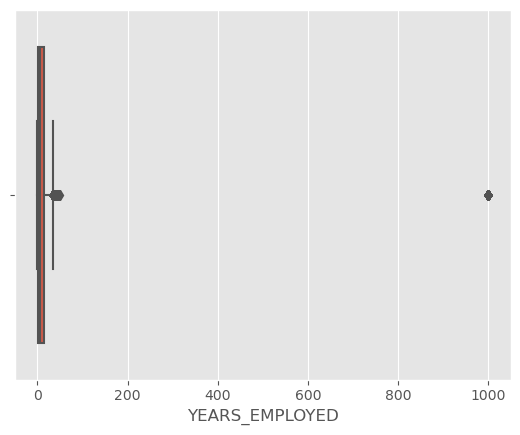

In [42]:
# Creating a new column YEARS_EMPLOYED for ease of analysis
app_df['YEARS_EMPLOYED']=app_df['DAYS_EMPLOYED'].apply(lambda x:(x//365))
print(app_df['YEARS_EMPLOYED'].describe())
sns.boxplot(data=app_df,x='YEARS_EMPLOYED')
plt.show()

**Observations**:
* Min employement years of applicant is 0
* Max employement years of applicant is 1000 which is physically impossible to be employed for an applicant
* There are outliers but as discussed above they are 'Pentioners' or 'Unemployed'

#### 3.4.5 inspecting DAYS_REGISTRATION column
**Observations**:
* DAYS_REGISTRATION - How many days before the application did client change his registration

In [43]:
# checking the statistical summary of the column
print(app_df['DAYS_REGISTRATION'].describe())
print()
print(app_df['DAYS_REGISTRATION'].value_counts())
print()
print(app_df['DAYS_REGISTRATION'].value_counts(normalize=True))
print()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

DAYS_REGISTRATION
-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: count, Length: 15688, dtype: int64

DAYS_REGISTRATION
-1.0        0.000367
-7.0        0.000319
-6.0        0.000312
-4.0        0.000299
-2.0        0.000299
              ...   
-15581.0    0.000003
-15031.0    0.000003
-14804.0    0.000003
-15008.0    0.000003
-14798.0    0.000003
Name: proportion, Length: 15688, dtype: float64



**Observations**:
* Days of registration cann't be negative
* Also have to convert days to years for data to make sense

In [44]:
# Converting DAYS_REGISTRATION to positive days and checking statistical values 
app_df['DAYS_REGISTRATION']=app_df['DAYS_REGISTRATION'].apply(lambda x:abs(x) if x<0 else x)
print(app_df['DAYS_REGISTRATION'].describe())

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


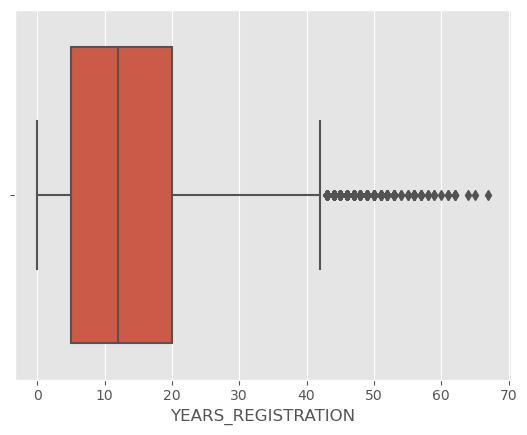

In [45]:
# creating a new column YEARS_REGISTRATION for ease of analysis
app_df['YEARS_REGISTRATION']=app_df['DAYS_REGISTRATION'].apply(lambda x: (x//365))
print(app_df['YEARS_REGISTRATION'].describe())
sns.boxplot(data=app_df,x='YEARS_REGISTRATION')
plt.show()

**Observations**:
* Min age of applicant is 0
* Max age of applicant is 67
* Mean and median is very close to each other
* There are outliers but they are not wrong values
* Most of the applicants are in the resigration years range between 5 to 20

#### 3.4.6 inspecting DAYS_ID_PUBLISH column
**Observations**:
* DAYS_ID_PUBLISH - How many days before the application did client change the identity document with which he applied for the loan

In [46]:
# Checking statistical summary of the column
print(app_df['DAYS_ID_PUBLISH'].describe())
print()
print(app_df['DAYS_ID_PUBLISH'].value_counts().head())
print()
print(app_df['DAYS_ID_PUBLISH'].value_counts(normalize=True).head())
print()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

DAYS_ID_PUBLISH
-4053    0.000550
-4095    0.000527
-4046    0.000524
-4417    0.000517
-4256    0.000514
Name: proportion, dtype: float64



**Observations**:
* Days of ID Change cann't be negative
* Also have to convert days to years for data to make sense

In [47]:
# Converting DAYS_ID_PUBLISH to positive days and checking statistical values
app_df['DAYS_ID_PUBLISH']=app_df['DAYS_ID_PUBLISH'].apply(lambda x: abs(x) if x<0 else x)
print(app_df['DAYS_ID_PUBLISH'].describe())

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


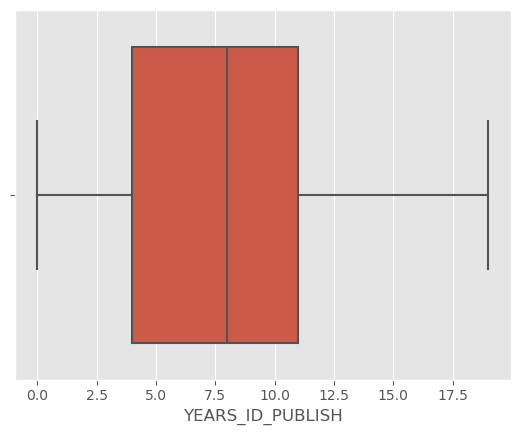

In [48]:
# Creating a new column YEARS_ID_PUBLISH for ease of analysis
app_df['YEARS_ID_PUBLISH']=app_df['DAYS_ID_PUBLISH'].apply(lambda x: (x//365))
print(app_df['YEARS_ID_PUBLISH'].describe())
sns.boxplot(data=app_df,x='YEARS_ID_PUBLISH')
plt.show()

**Observations**:
* Min age of applicant is 0
* Max age of applicant is 19
* Mean and median is very close to each other
* There are no outliers
* Most of the applicants who have changed ID, fall in ranges between 5 to 20 years

#### 3.4.7 inspecting DAYS_LAST_PHONE_CHANGE column
**Observations**:
* DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone

In [49]:
# Checking statistical summary of the column
print(app_df['DAYS_LAST_PHONE_CHANGE'].describe())
print()
print(app_df['DAYS_LAST_PHONE_CHANGE'].value_counts().head())
print()
print(app_df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize=True).head())
print()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

DAYS_LAST_PHONE_CHANGE
 0.0    37672
-1.0     2812
-2.0     2318
-3.0     1763
-4.0     1285
Name: count, dtype: int64

DAYS_LAST_PHONE_CHANGE
 0.0    0.122507
-1.0    0.009144
-2.0    0.007538
-3.0    0.005733
-4.0    0.004179
Name: proportion, dtype: float64



**Observations**:
* Days of ID Change cann't be negative
* Also have to convert days to years for data to make sense

In [50]:
# Converting DAYS_LAST_PHONE_CHANGE to positive days and checking statistical values
app_df['DAYS_LAST_PHONE_CHANGE']=app_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: abs(x) if x<0 else x)
print(app_df['DAYS_LAST_PHONE_CHANGE'].describe())

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


count    307510.000000
mean          2.225115
std           2.193678
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


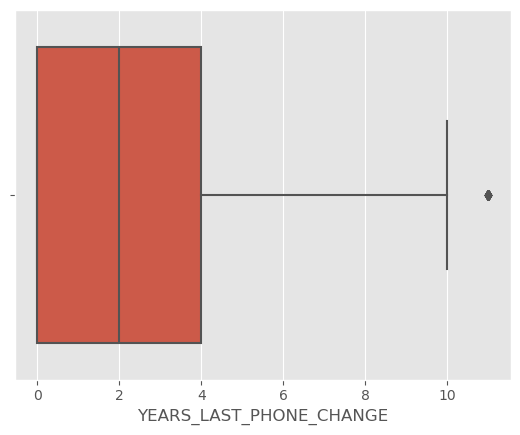

In [51]:
# Creating a new column YEARS_LAST_PHONE_CHANGE for ease of analysis
app_df['YEARS_LAST_PHONE_CHANGE']=app_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: (x//365))
print(app_df['YEARS_LAST_PHONE_CHANGE'].describe())
sns.boxplot(data=app_df,x='YEARS_LAST_PHONE_CHANGE')
plt.show()

**Observations**:
* Min age of applicant is 0
* Max age of applicant is 11
* Mean and median is very close to each other
* There is an outlier at 11
* Most of the applicants who have changed ID, fall in ranges between 0 to 4 years

## 4 Data Analysis

### Checking Imbalance for target column 'TARGET'

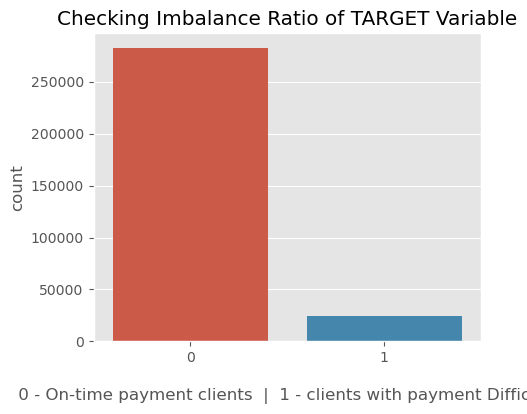

In [52]:
# checking the imbalance using countplot
plt.style.use('ggplot')
plt.figure(figsize=[5,4])
sns.countplot(data=app_df,x='TARGET')
plt.title("Checking Imbalance Ratio of TARGET Variable")
plt.xlabel("\n 0 - On-time payment clients  |  1 - clients with payment Difficulty")
plt.show()

In [53]:
# Checking exact TARGET 0 to TARGET 1 ratio
app_df[app_df.TARGET==0].shape[0]/app_df[app_df.TARGET==1].shape[0]

11.387150050352467

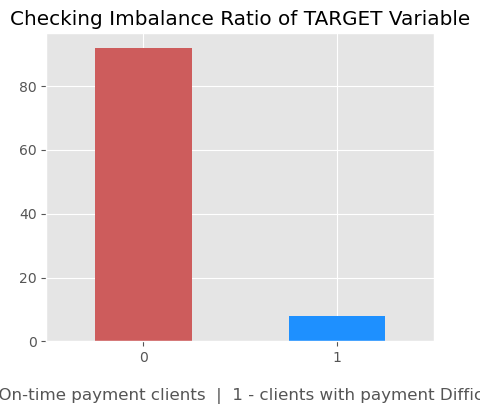

In [54]:
# checking the imbalance using normalization
plt.style.use('ggplot')
plt.figure(figsize=[5,4])
(app_df['TARGET'].value_counts(normalize=True)*100).plot.bar(color=['indianred','dodgerblue'])
plt.title("Checking Imbalance Ratio of TARGET Variable")
plt.xticks(rotation=0)
plt.xlabel("\n 0 - On-time payment clients  |  1 - clients with payment Difficulty")
plt.show()

**Observations**:
* <b>1 in every 11 applicant has payment difficulty. 

### 4.1 Creating new dataframe with TARGET value
**Observations**:
* TARGET column has 2 values
 * 1 implies client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
 * 0 - all other cases

In [55]:
# inspecting TARGET column
print(app_df['TARGET'].value_counts())
print()
print(app_df['TARGET'].value_counts(normalize=True))
print()

TARGET
0    282686
1     24825
Name: count, dtype: int64

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64



**Observations**:
* 91.92% of the clients have on-time payment
* 8.07% of clients have difficulty with payment
* We can split the data to two columns to get better insights

In [56]:
# Creating new dataframe with TARGET value
df0=app_df[app_df['TARGET']==0]
df1=app_df[app_df['TARGET']==1]

### 4.2 Univariate analysis

In [57]:
# checking all columns with object type data and storing it in a list 
obj_plot=list(app_df.columns[app_df.dtypes=="object"])
obj_plot

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

#### 4.2.1 Analysis of object columns

In [58]:
# Checking each columns underlying groups 
for i in obj_plot:
    # for clients with payment difficulties
    print("--------------------------------------------------")
    print(f"{i} for clients with payments difficulties")
    print(df1[i].value_counts().sort_values(ascending=False))
    # for on time paymen clients
    print(f"{i} for on time payment clients") 
    print(df0[i].value_counts().sort_values(ascending=False))

--------------------------------------------------
NAME_CONTRACT_TYPE for clients with payments difficulties
NAME_CONTRACT_TYPE
Cash loans         23221
Revolving loans     1604
Name: count, dtype: int64
NAME_CONTRACT_TYPE for on time payment clients
NAME_CONTRACT_TYPE
Cash loans         255011
Revolving loans     27675
Name: count, dtype: int64
--------------------------------------------------
CODE_GENDER for clients with payments difficulties
CODE_GENDER
F    14170
M    10655
Name: count, dtype: int64
CODE_GENDER for on time payment clients
CODE_GENDER
F    188282
M     94404
Name: count, dtype: int64
--------------------------------------------------
FLAG_OWN_CAR for clients with payments difficulties
FLAG_OWN_CAR
N    17249
Y     7576
Name: count, dtype: int64
FLAG_OWN_CAR for on time payment clients
FLAG_OWN_CAR
N    185675
Y     97011
Name: count, dtype: int64
--------------------------------------------------
FLAG_OWN_REALTY for clients with payments difficulties
FLAG_OWN_REALT

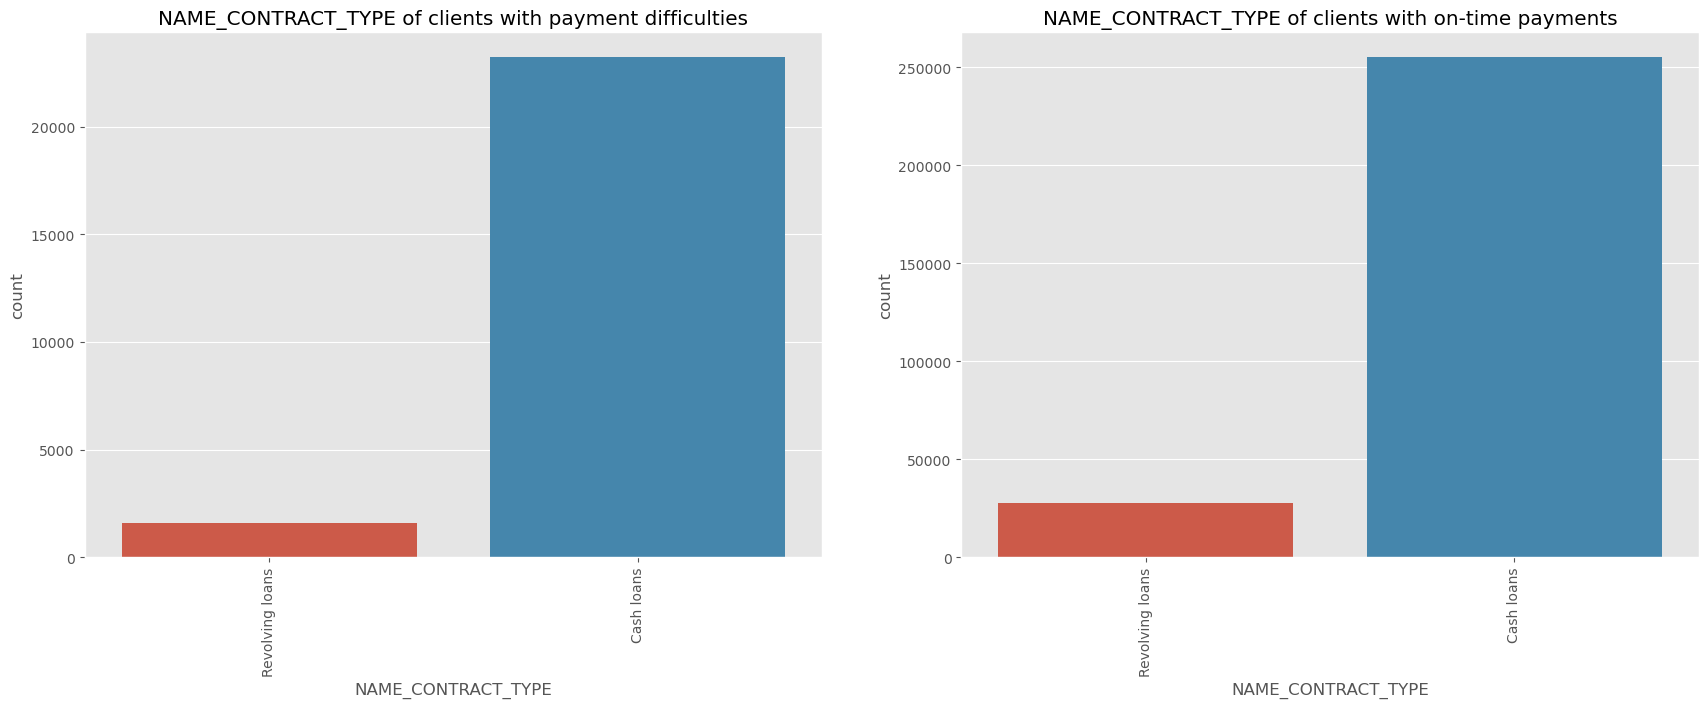

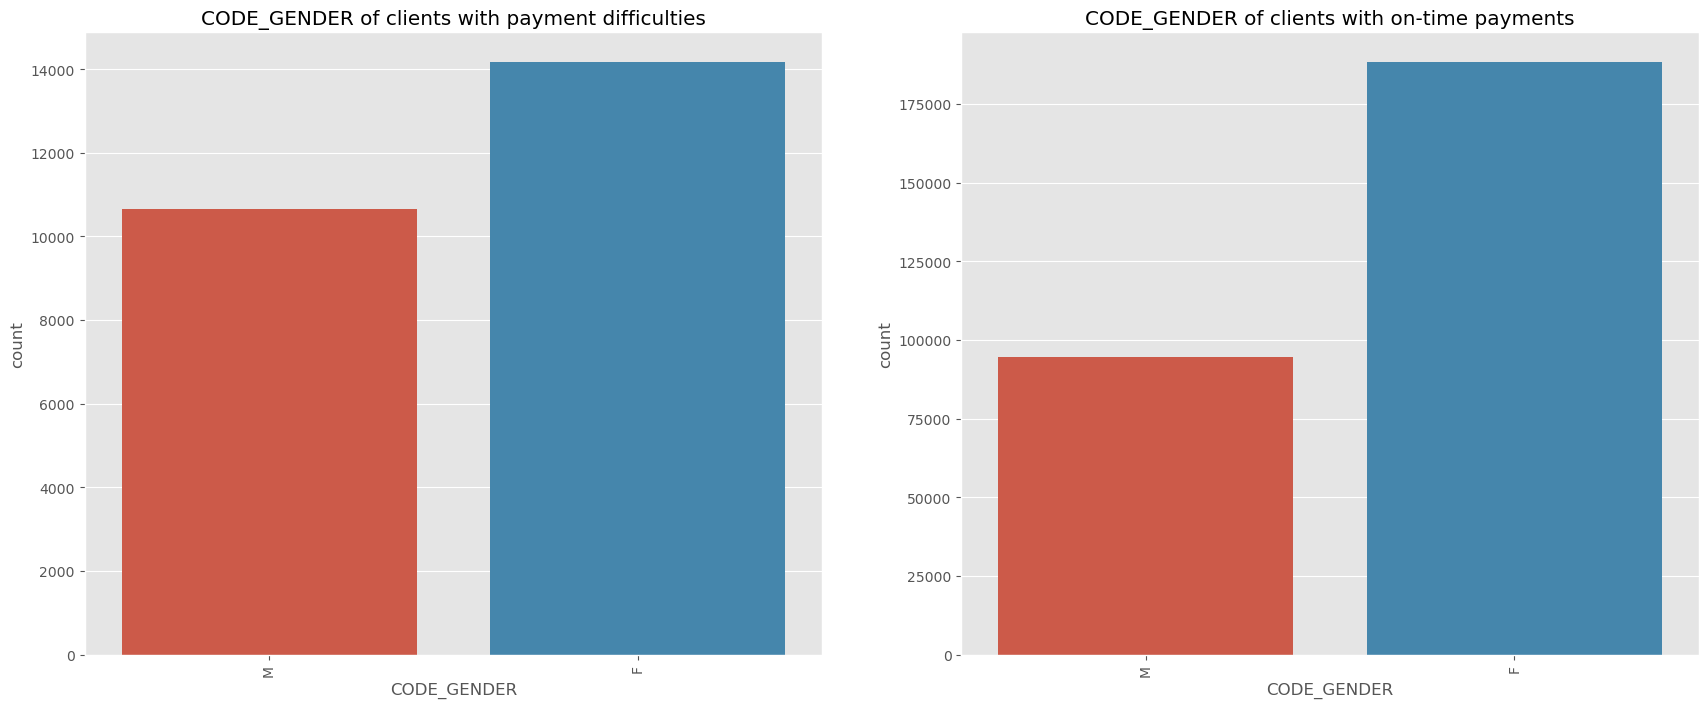

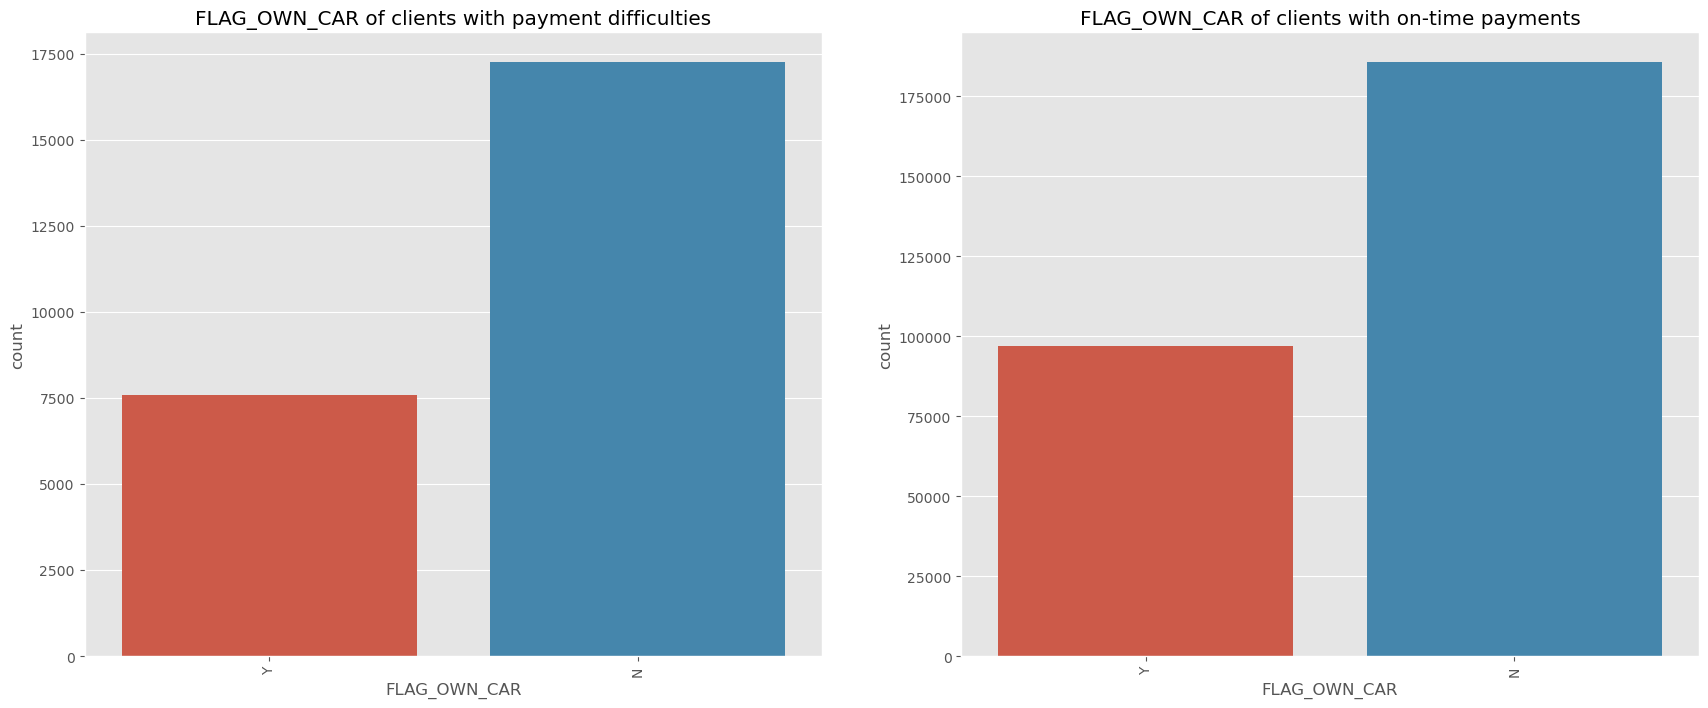

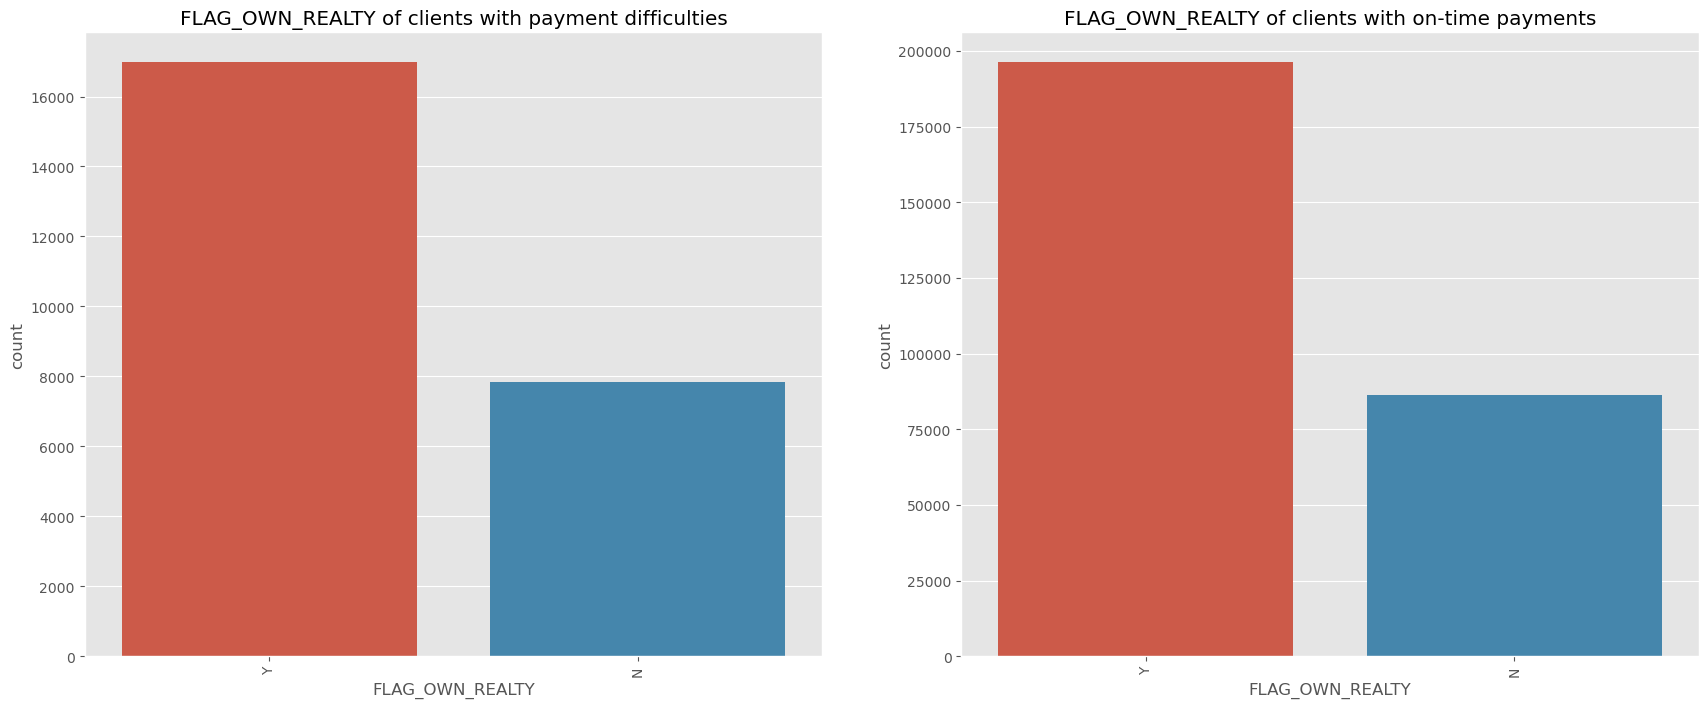

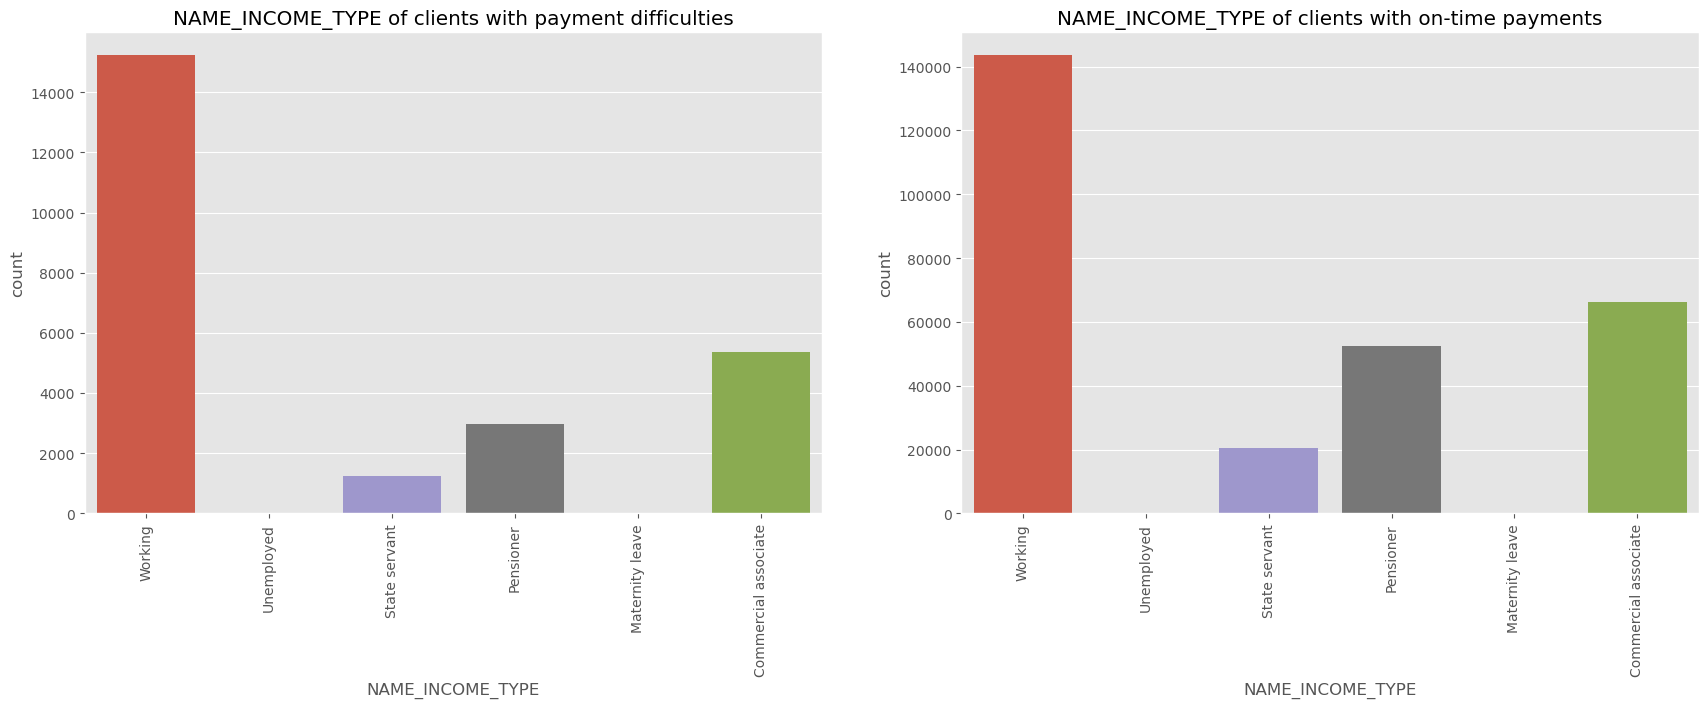

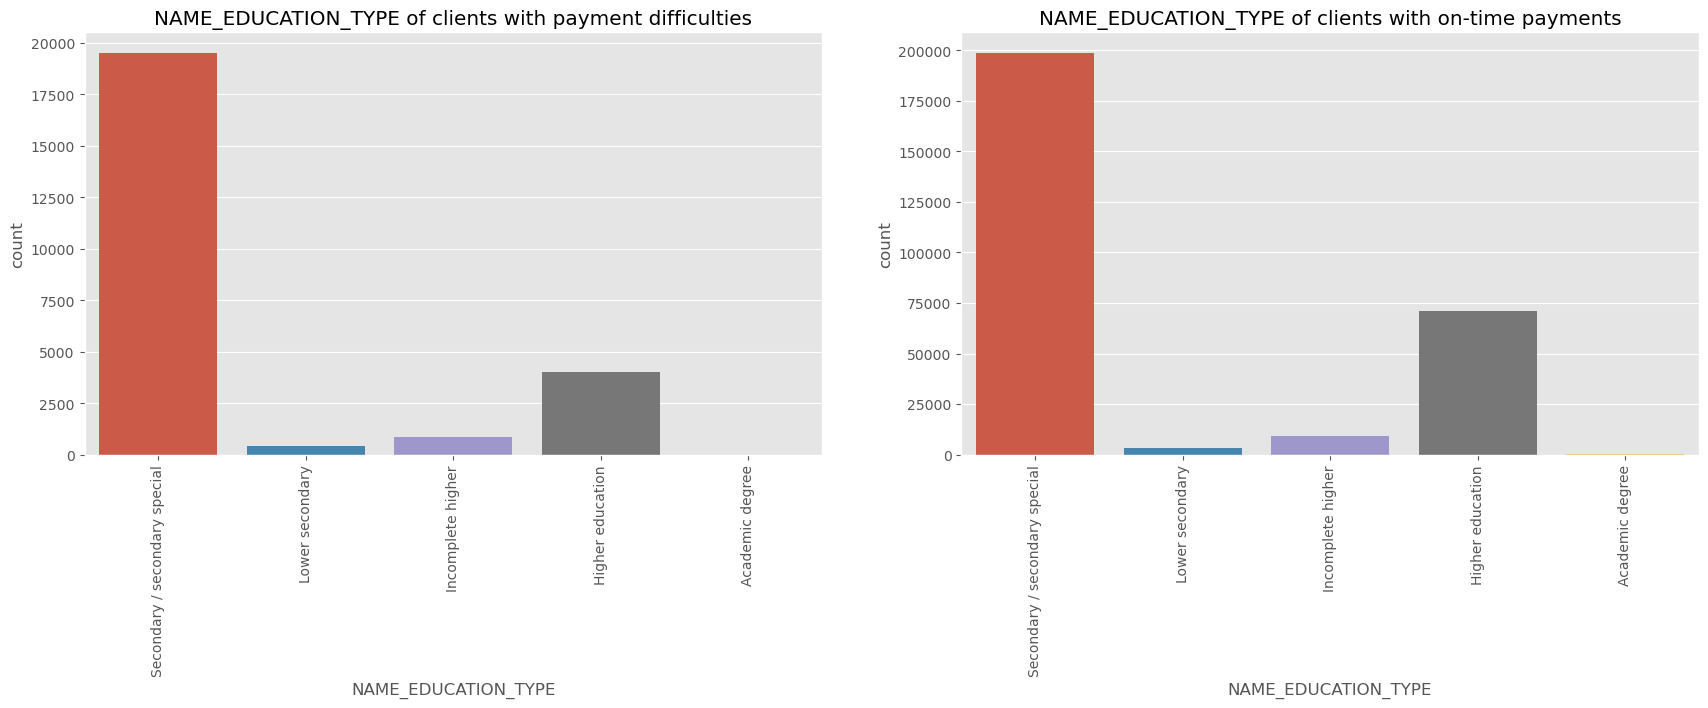

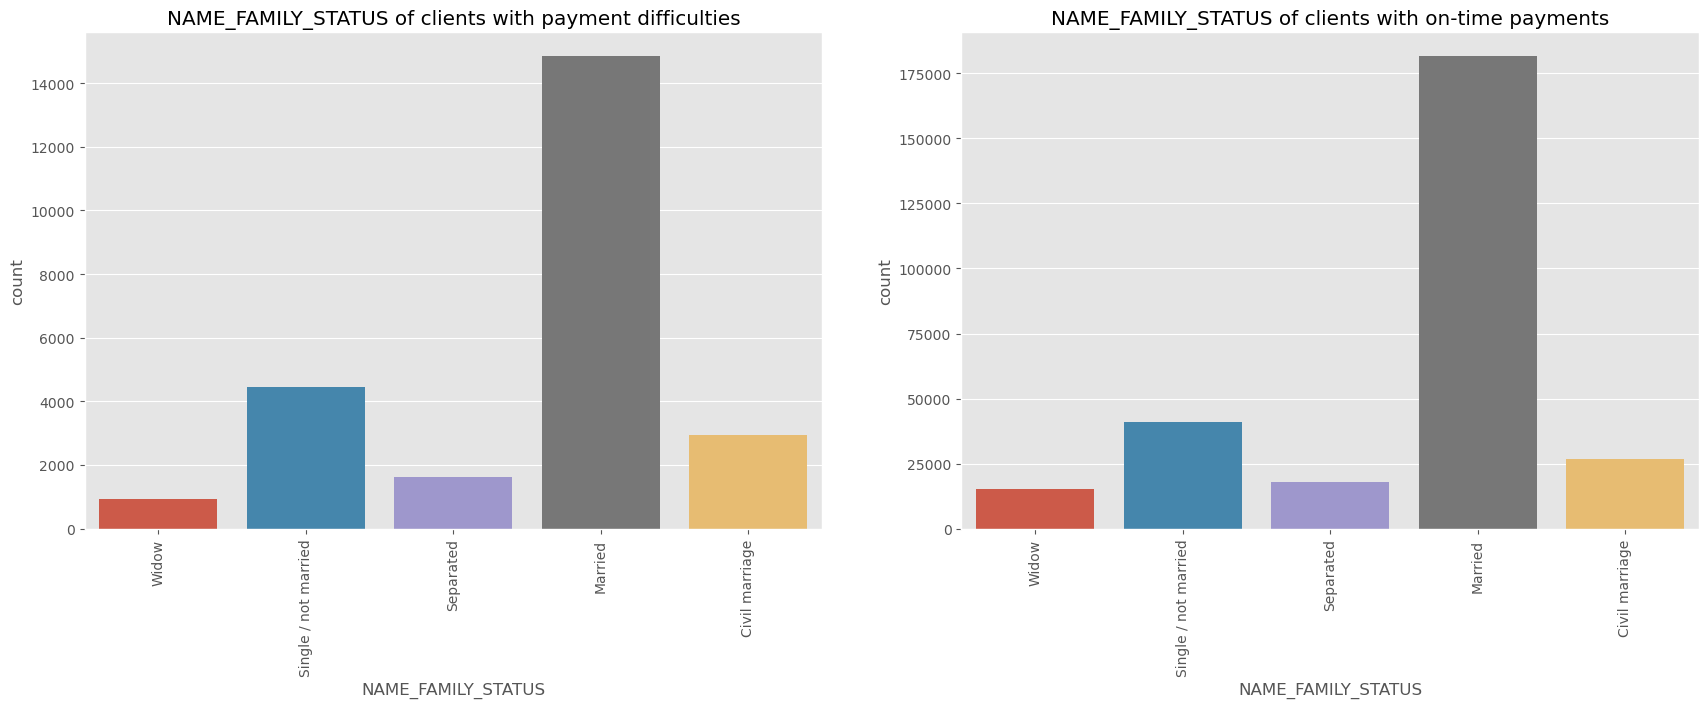

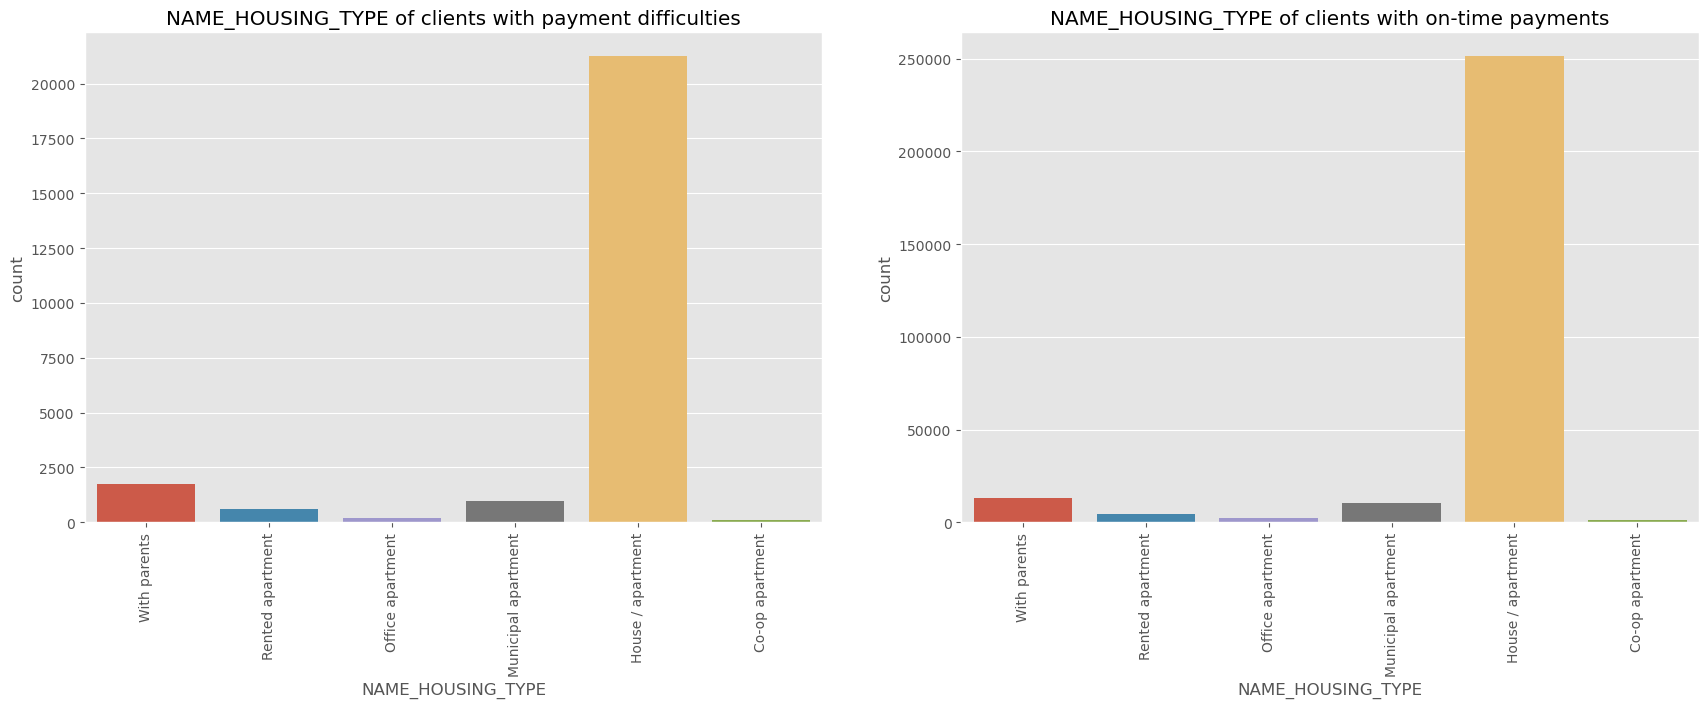

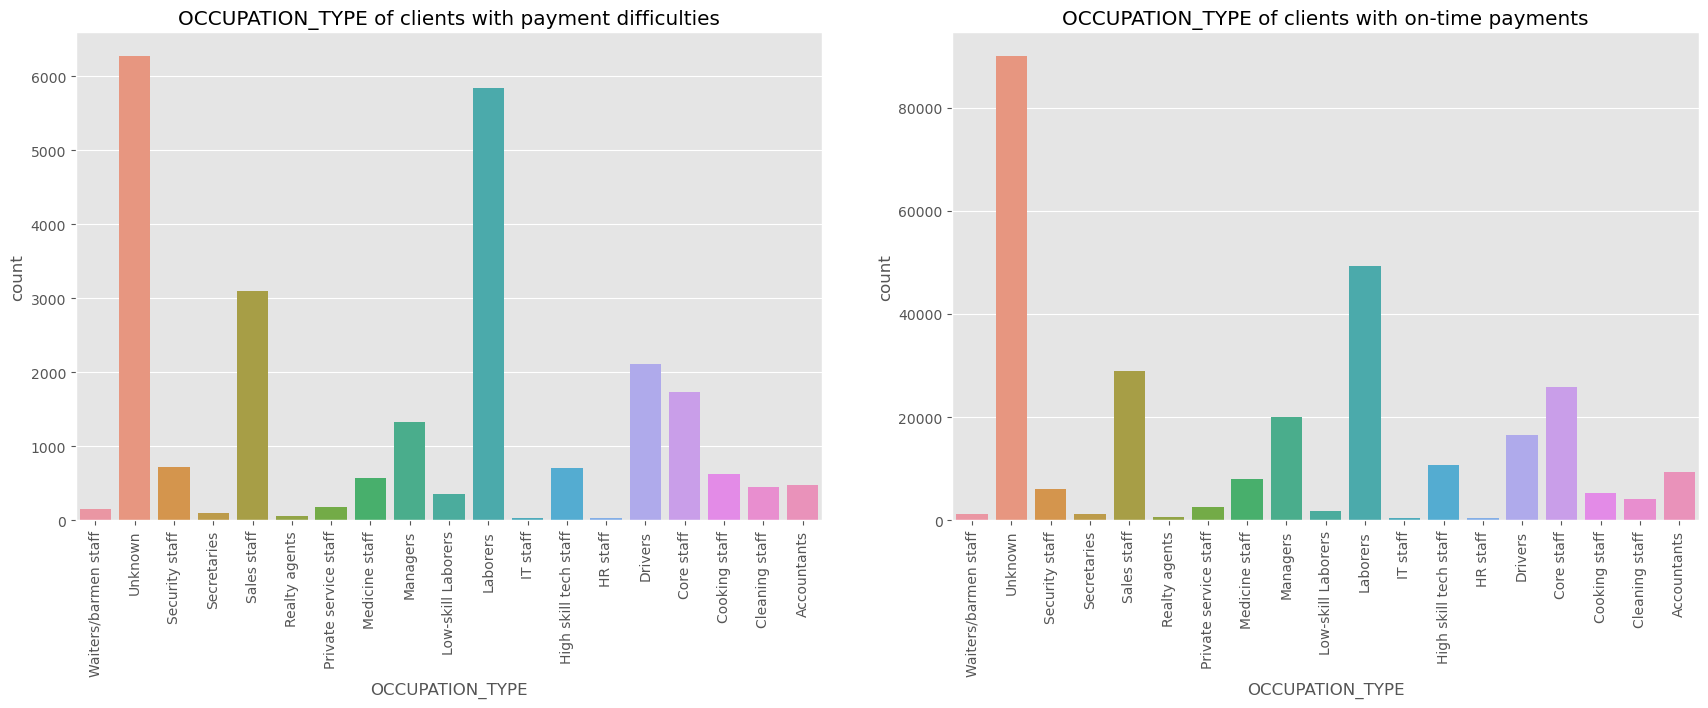

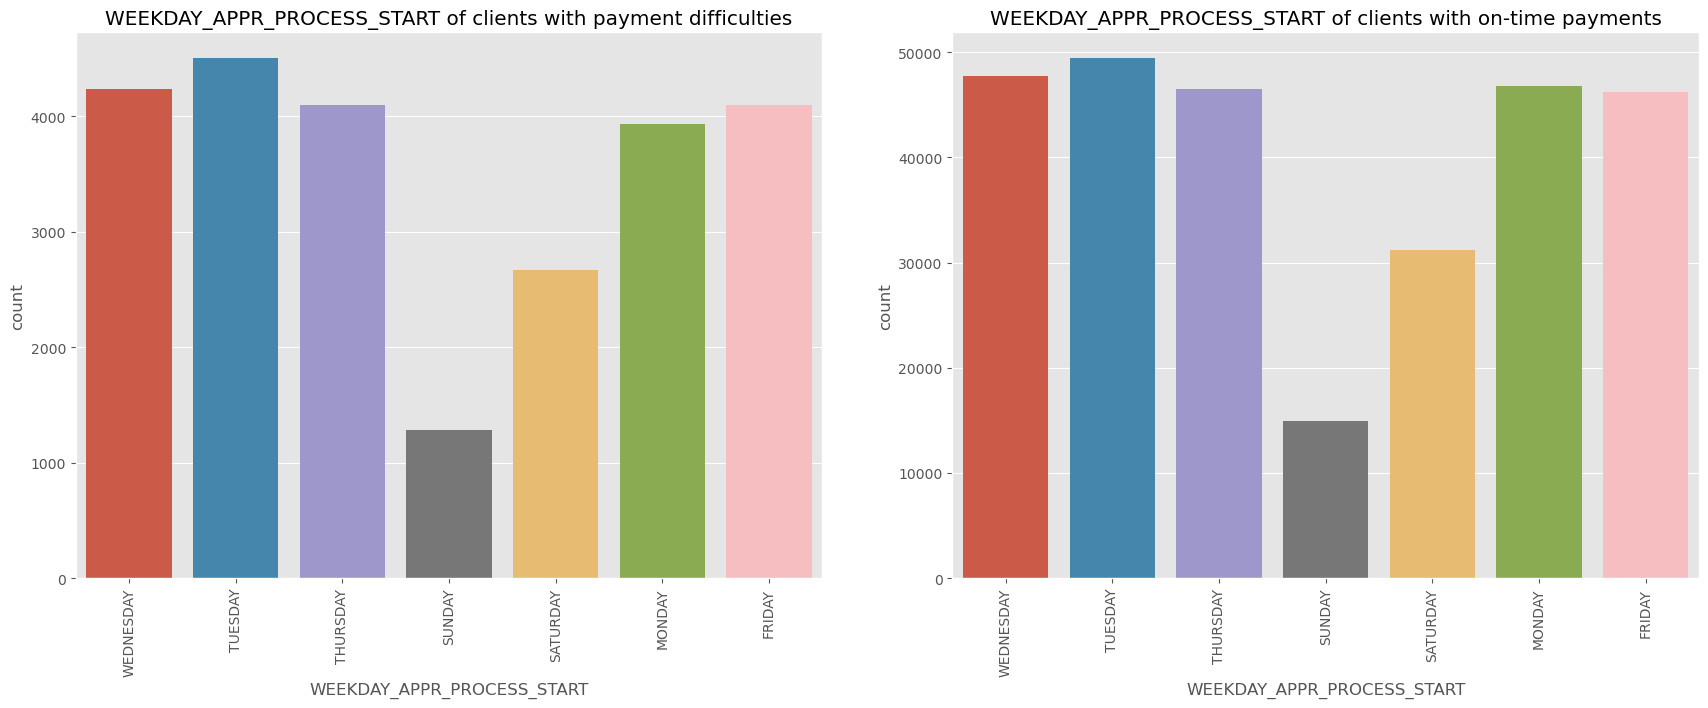

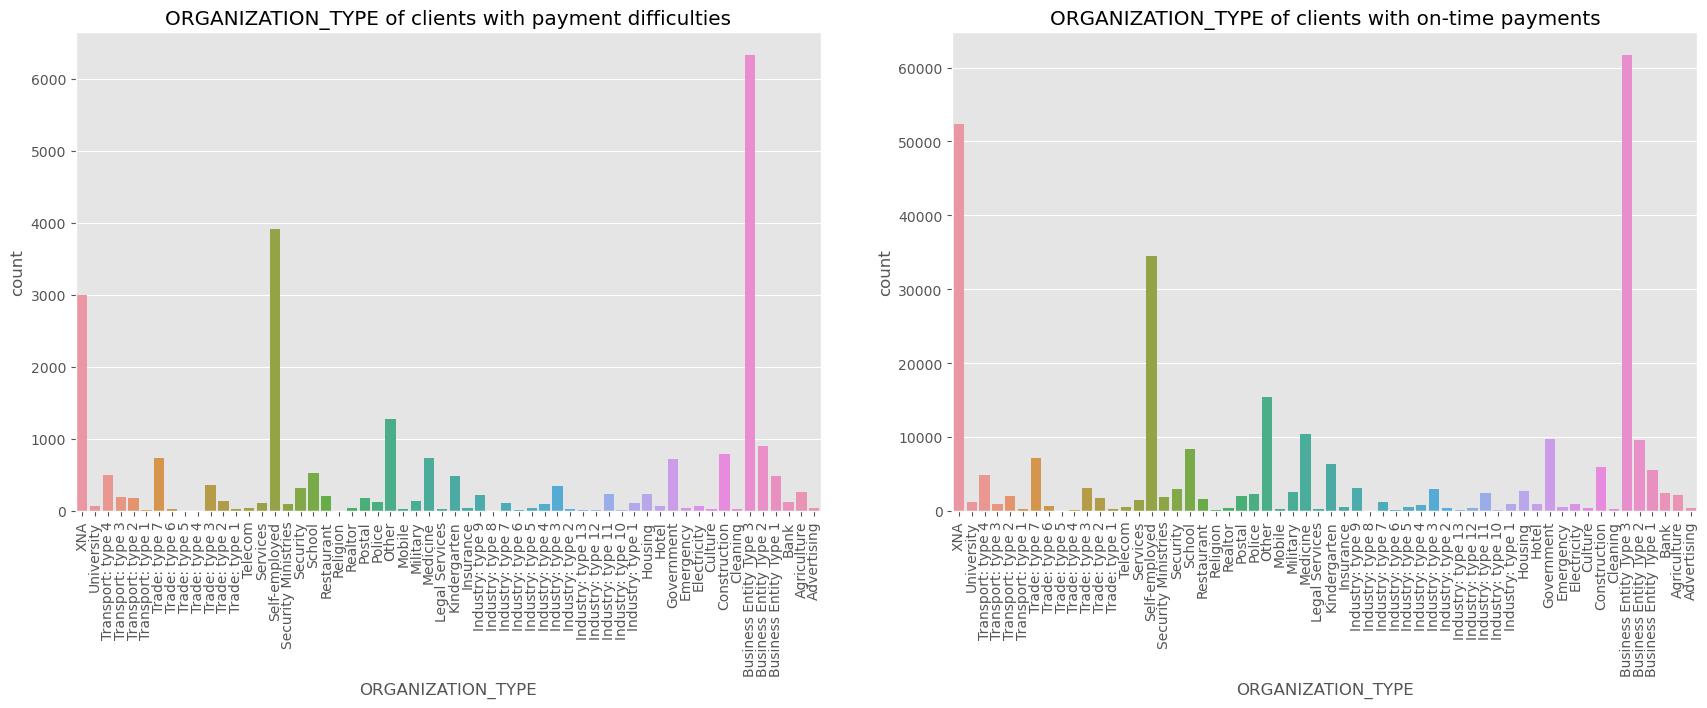

In [59]:
# plotting a count plot on TARGET's object columns
c_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'] 
for i in c_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [18,8])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    sns.countplot(data=df1, x =i, order = sorted(df1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    # for on-time payment clients
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    sns.countplot(data=df0, x =i, order = sorted(df1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 4)
    plt.show()

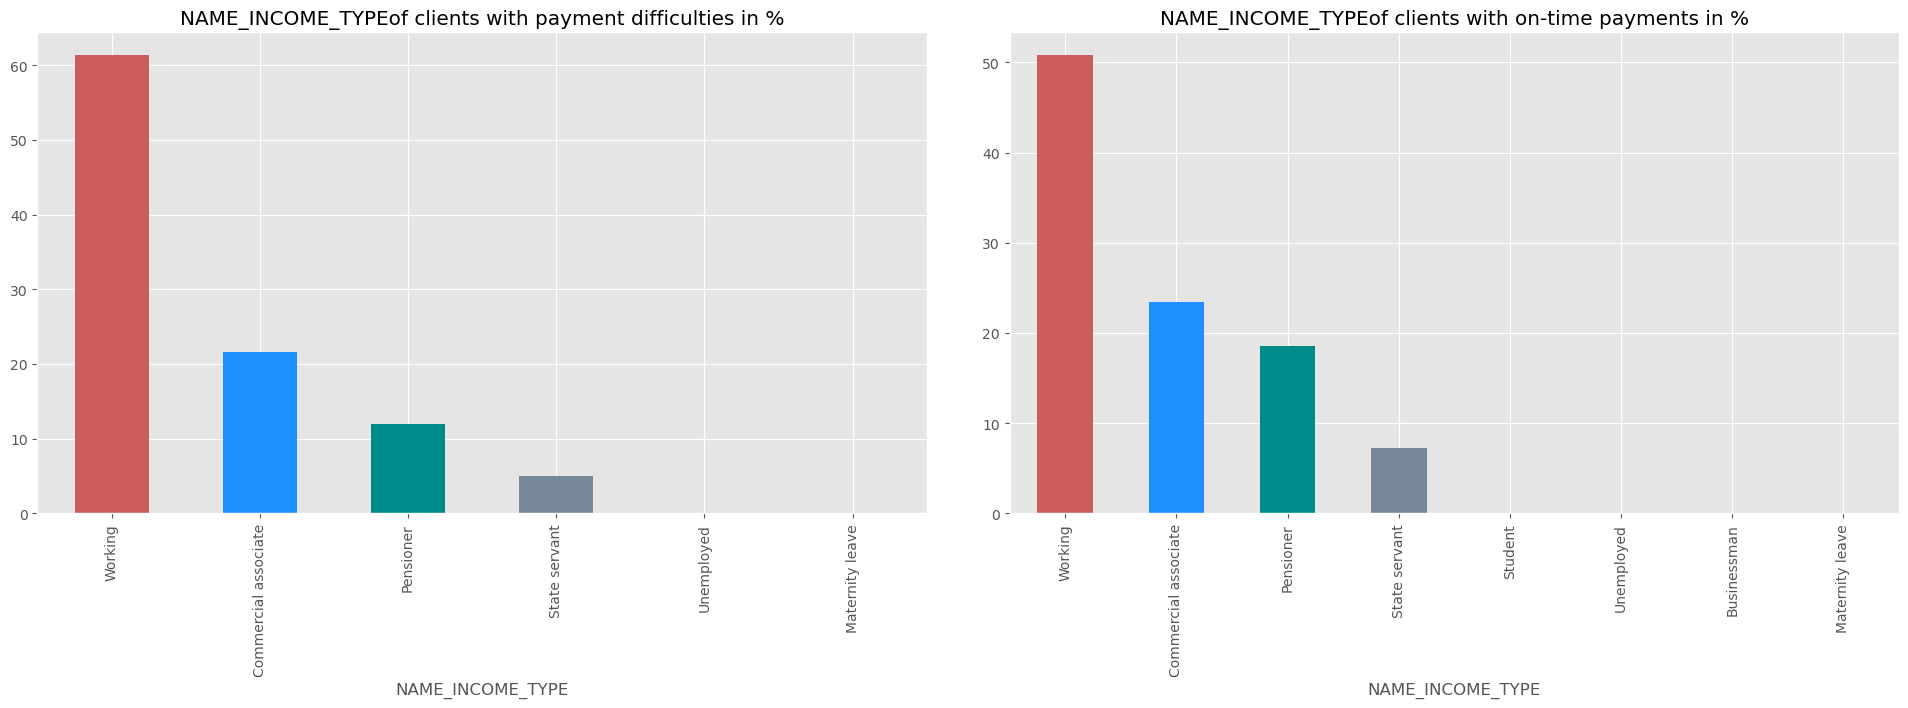

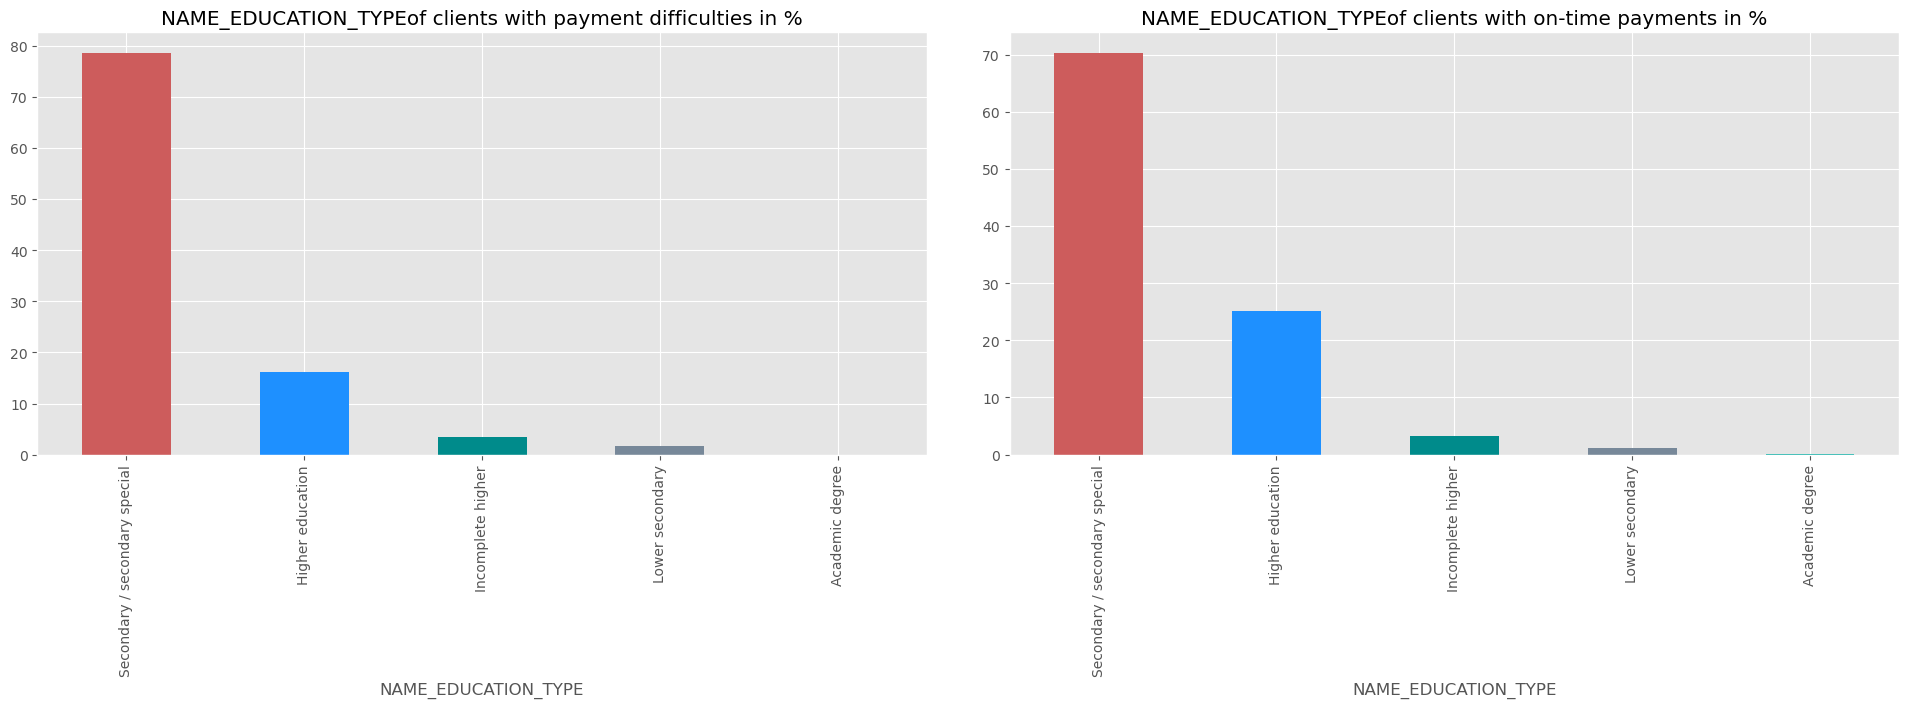

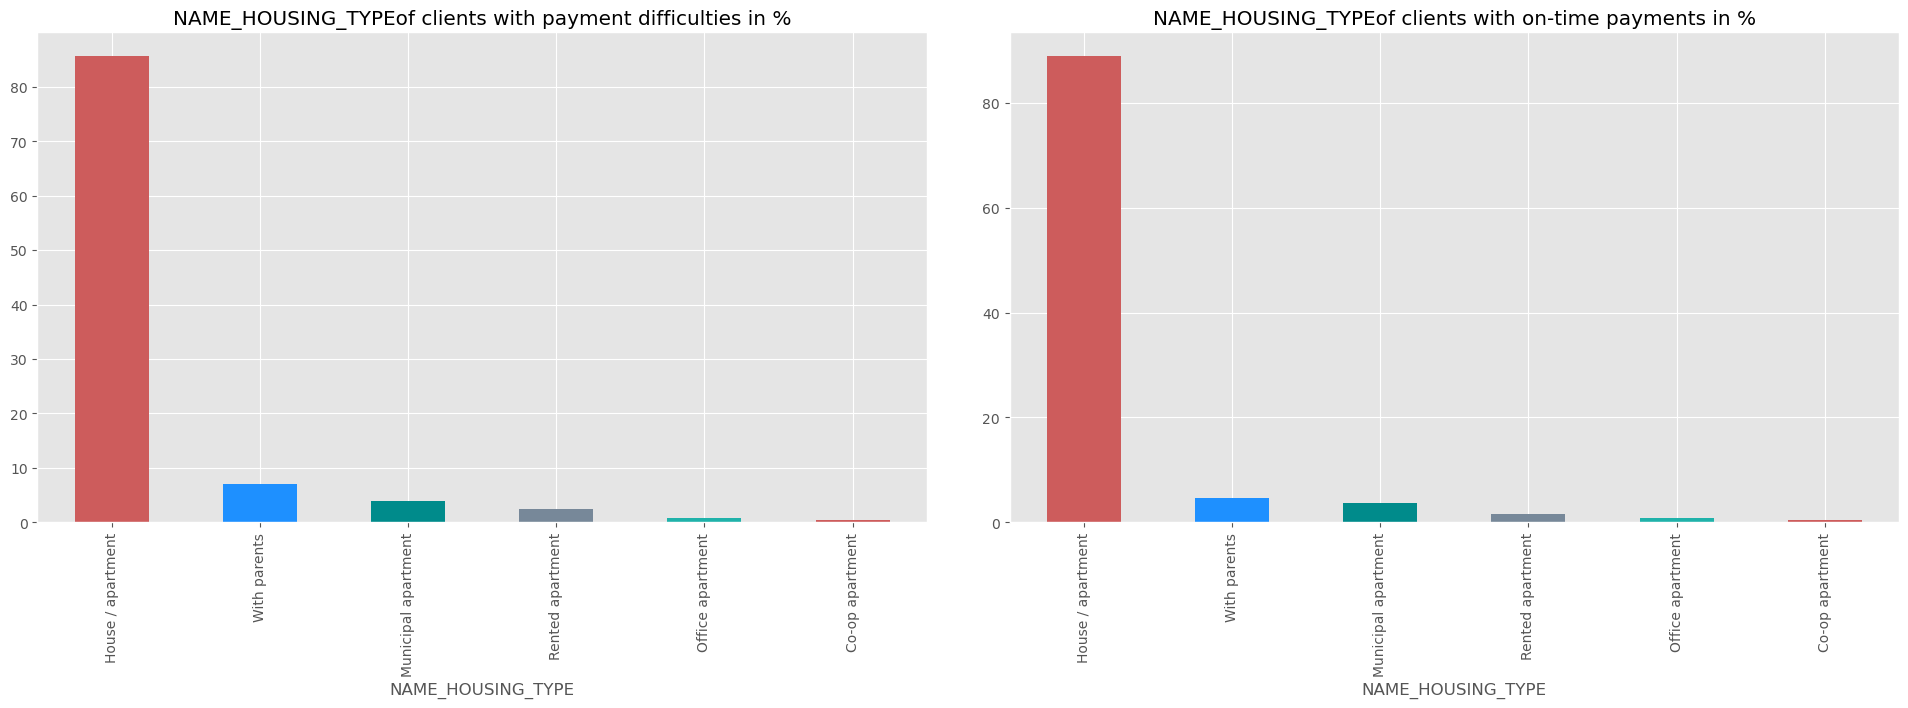

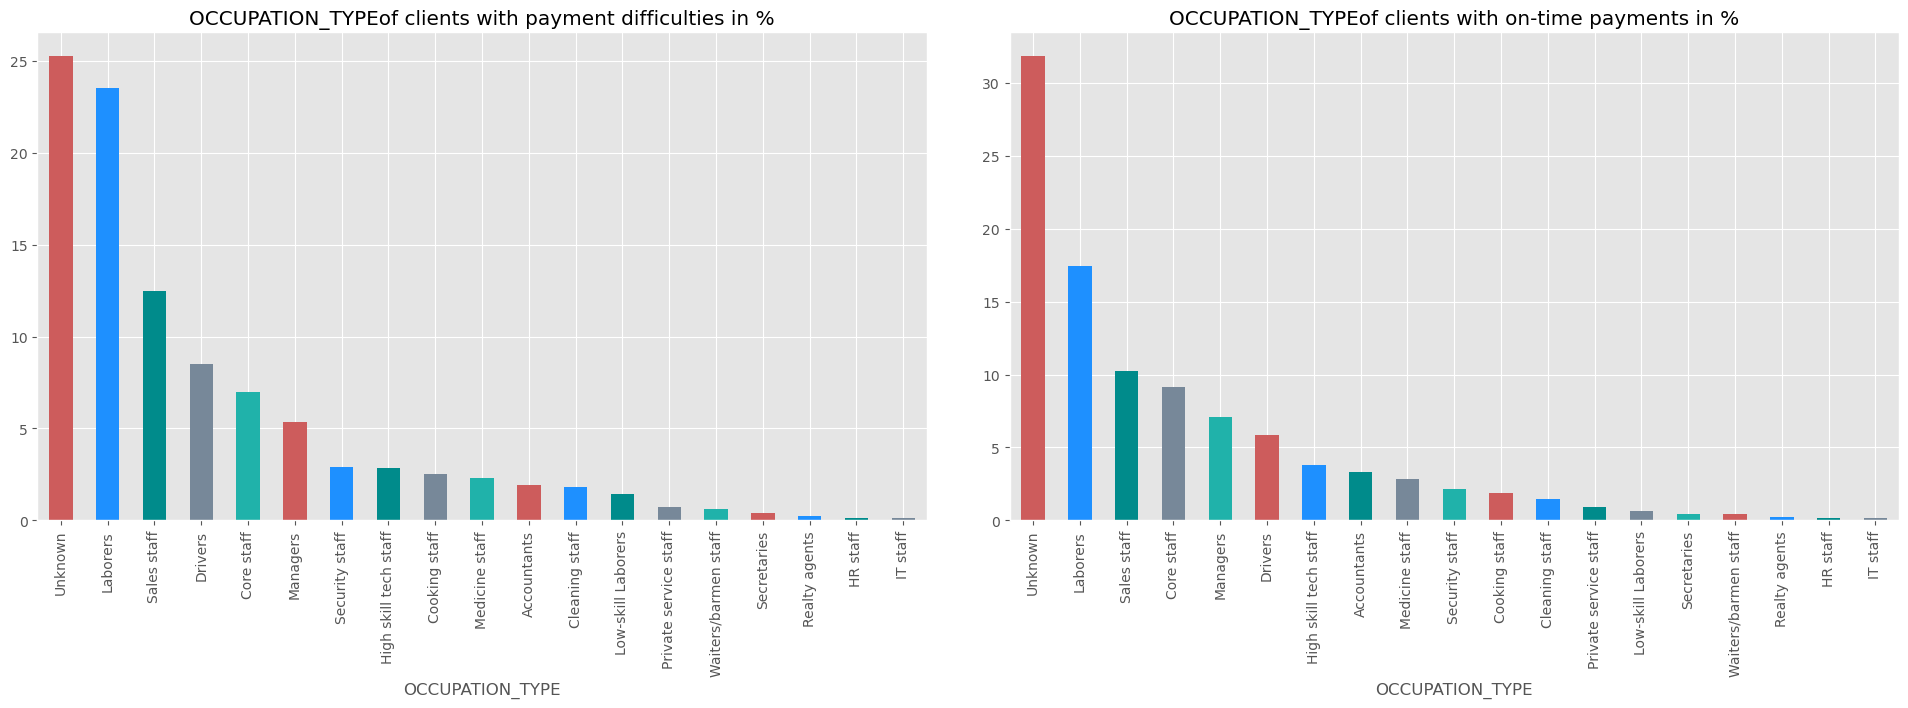

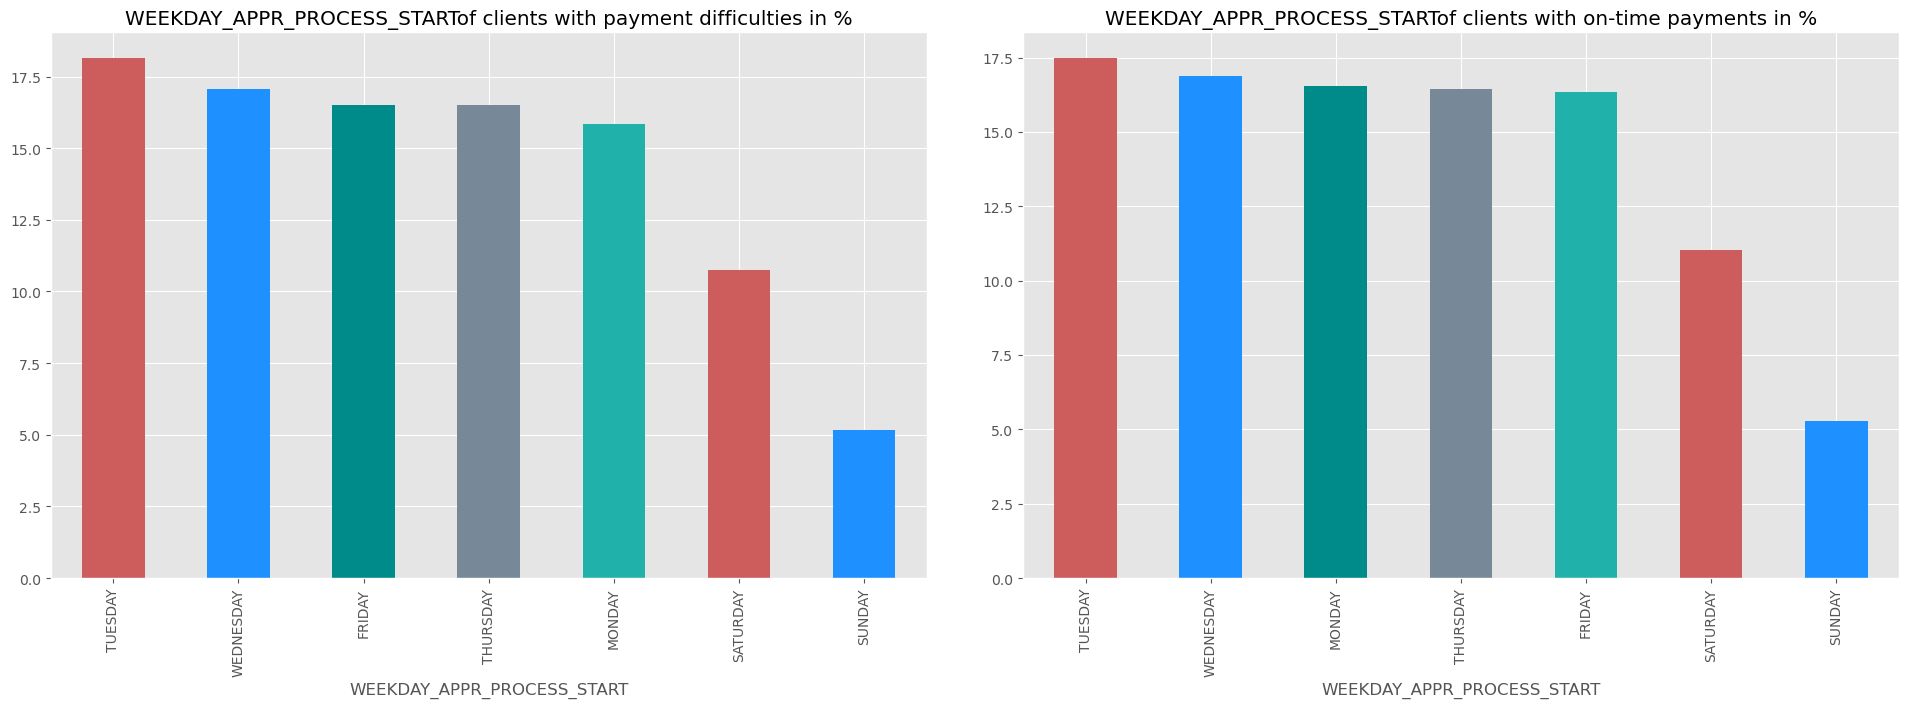

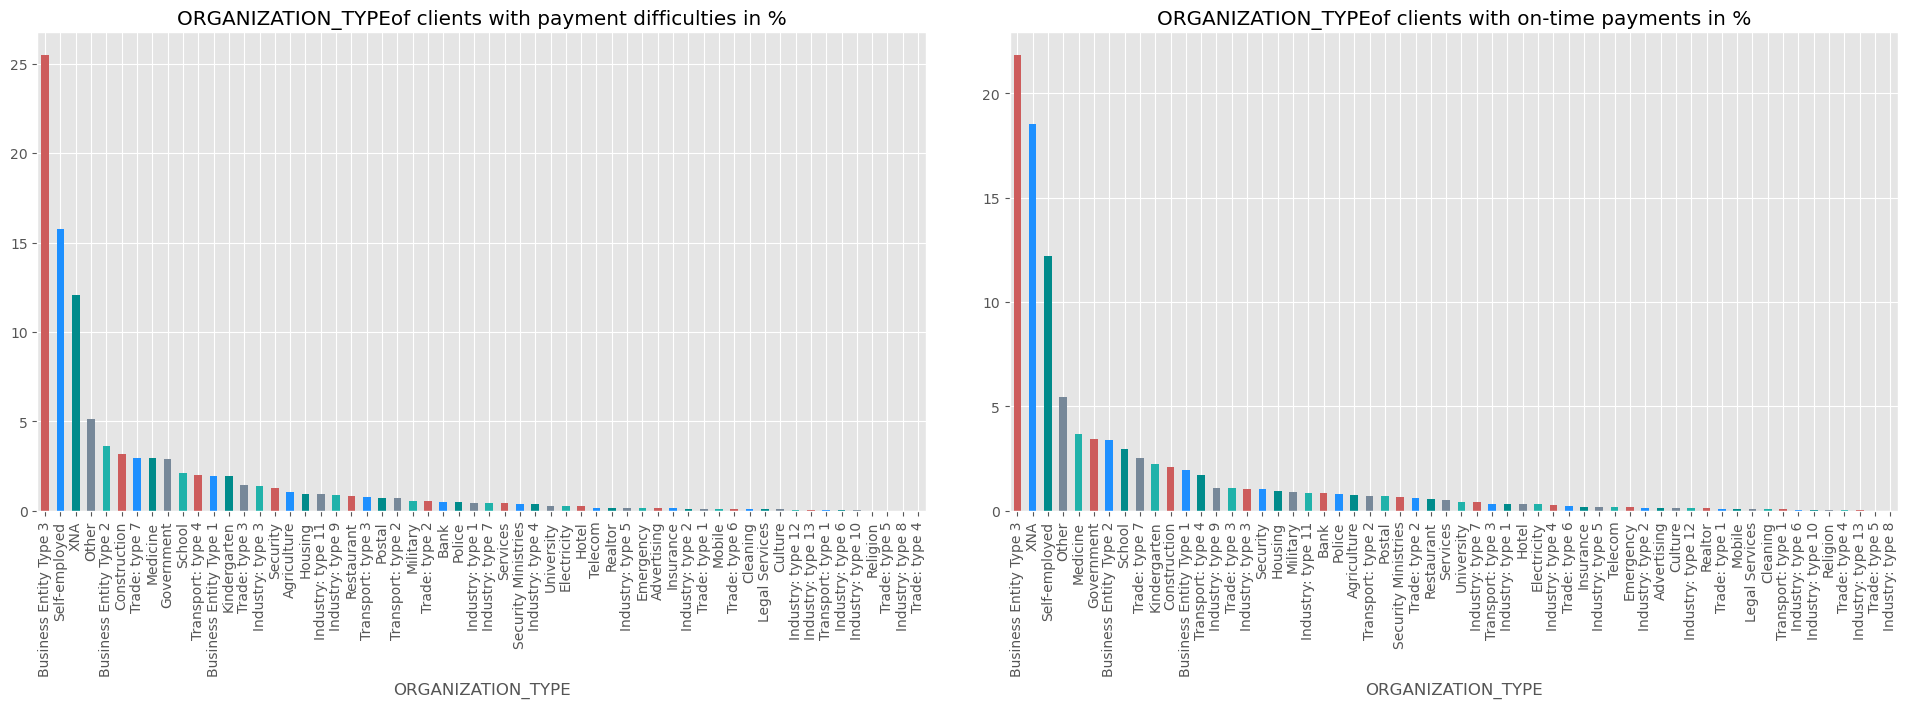

In [60]:
# plotting a pie chart on TARGET's object columns
b_plot=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in b_plot:
    plt.figure(figsize=[20,8])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    (df1[i].value_counts(normalize=True)*100).plot.bar(title=i+"of clients with payment difficulties in %",color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen'])
    plt.xticks(rotation=90)
    # for on_time payment clients
    plt.subplot(1,2,2)
    (df0[i].value_counts(normalize=True)*100).plot.bar(title=i+"of clients with on-time payments in %",color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen'])
    plt.xticks(rotation=90) 
    plt.tight_layout(pad=4)      
    plt.show()

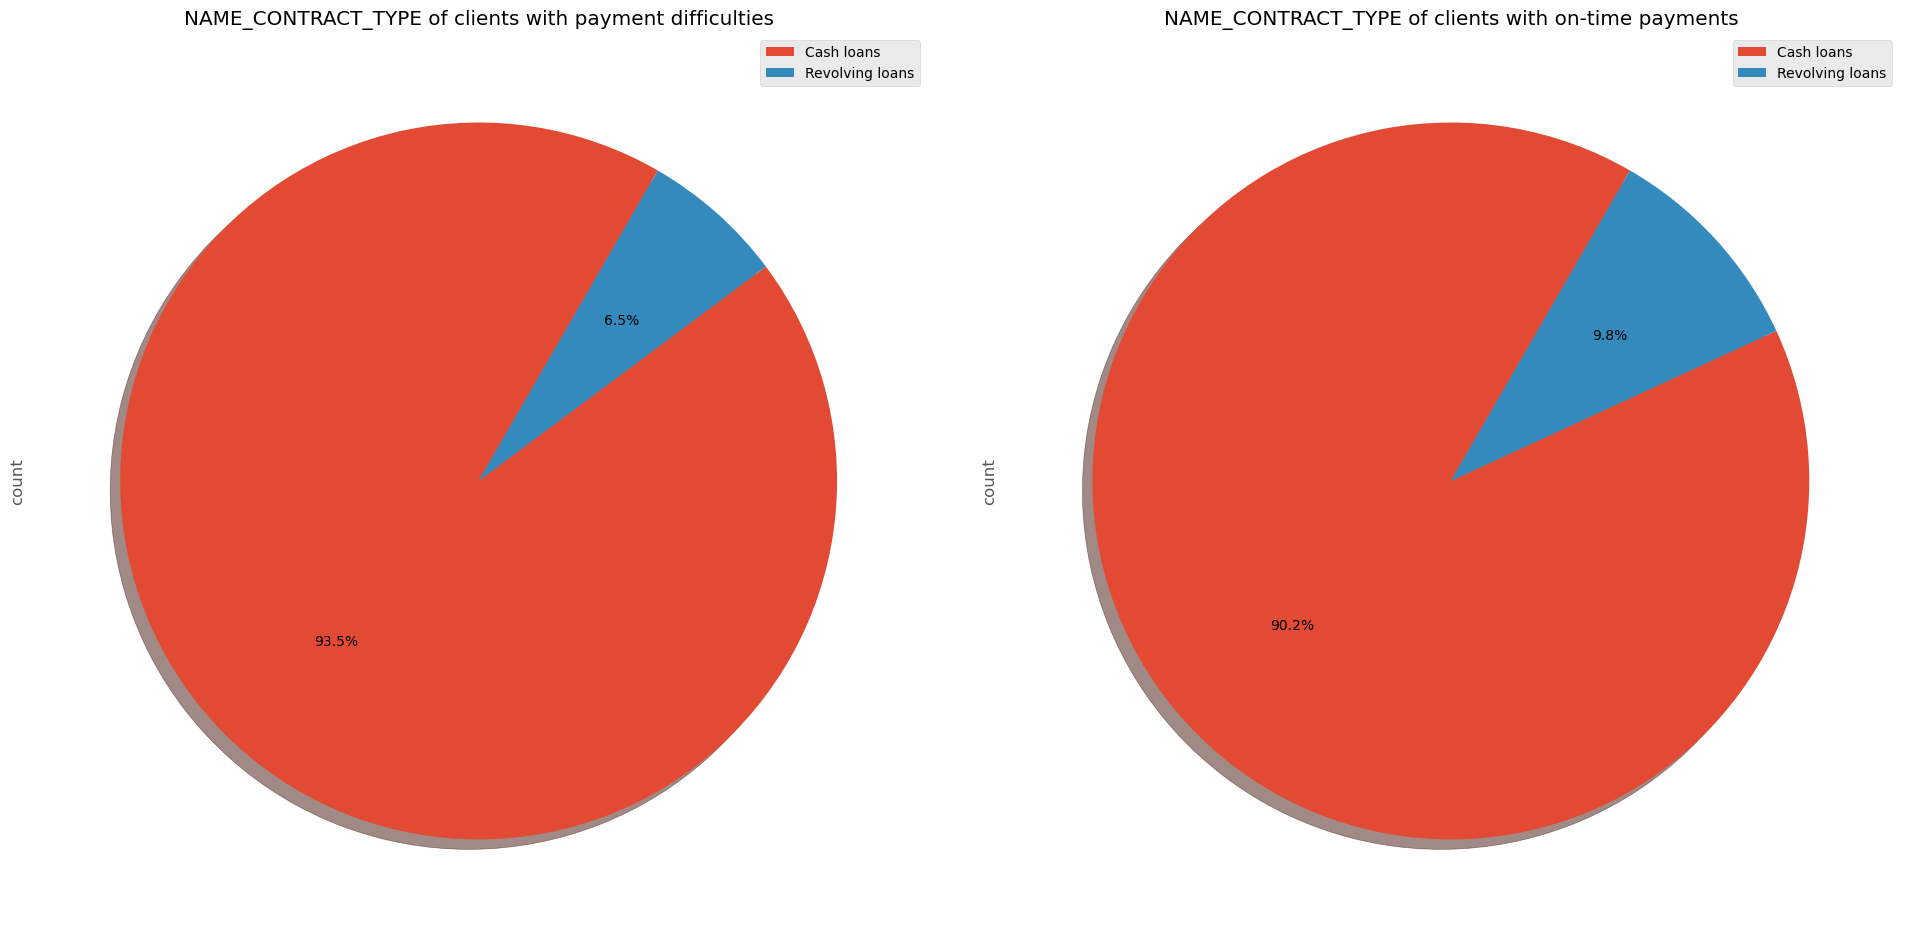

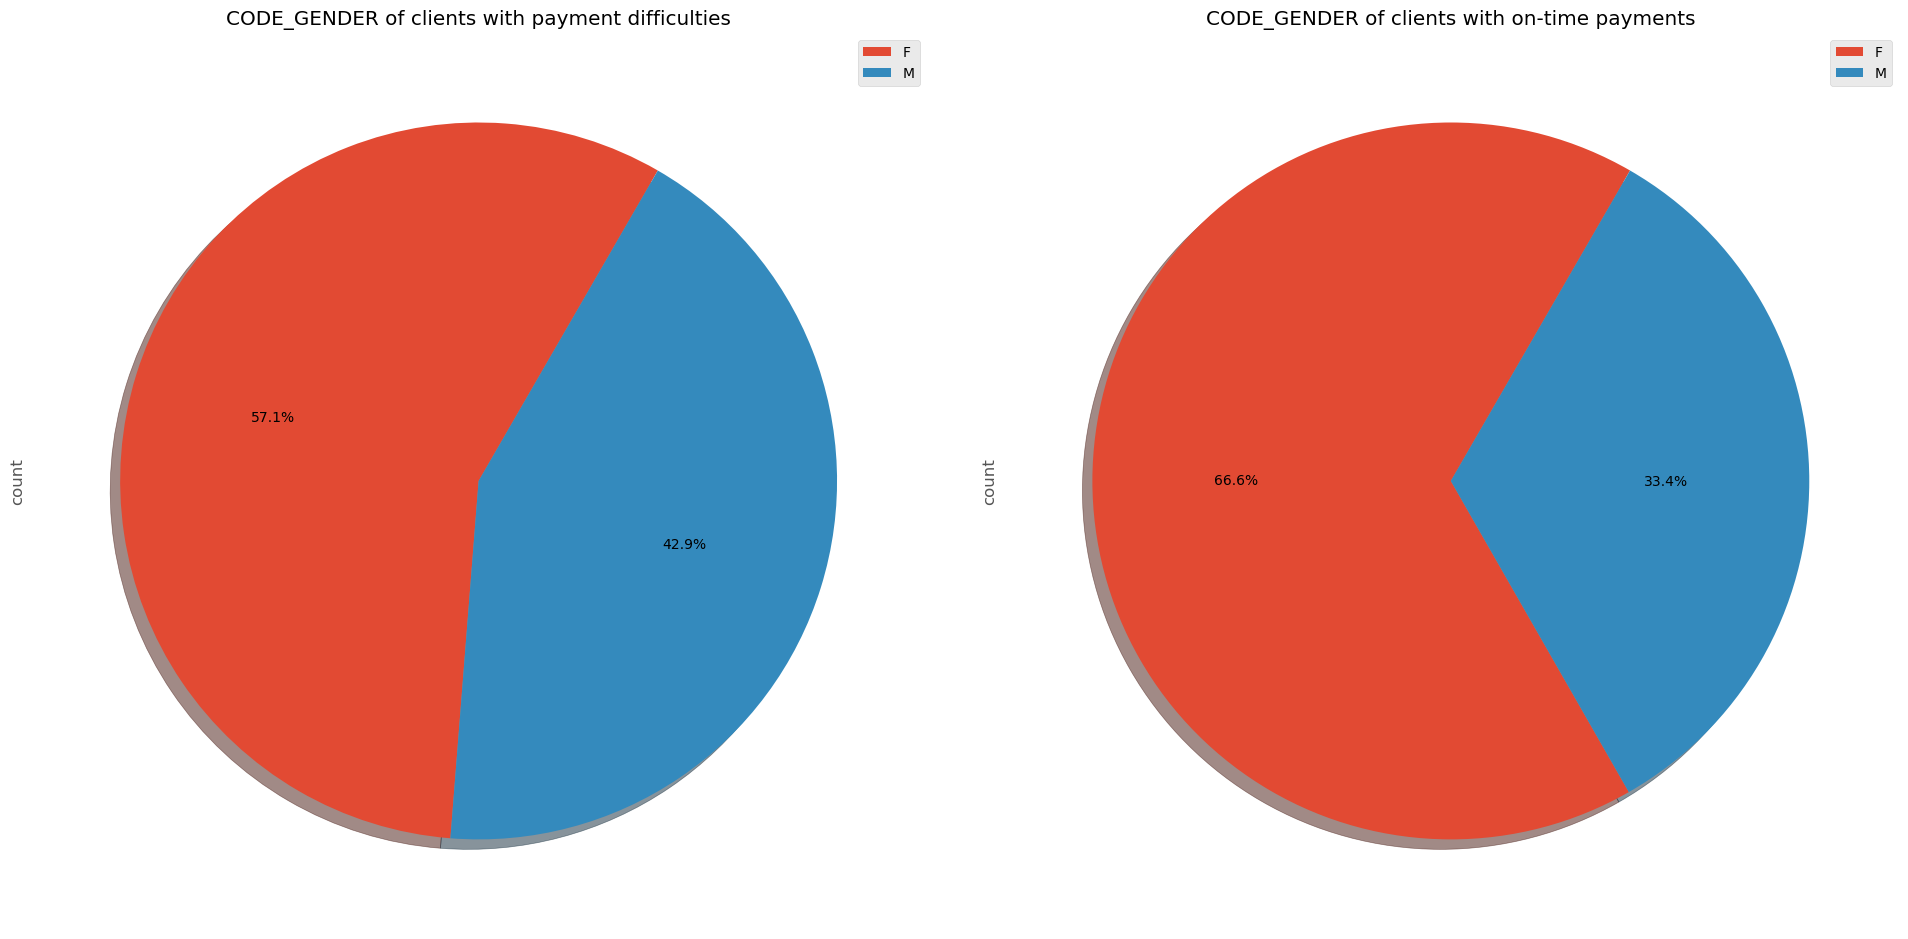

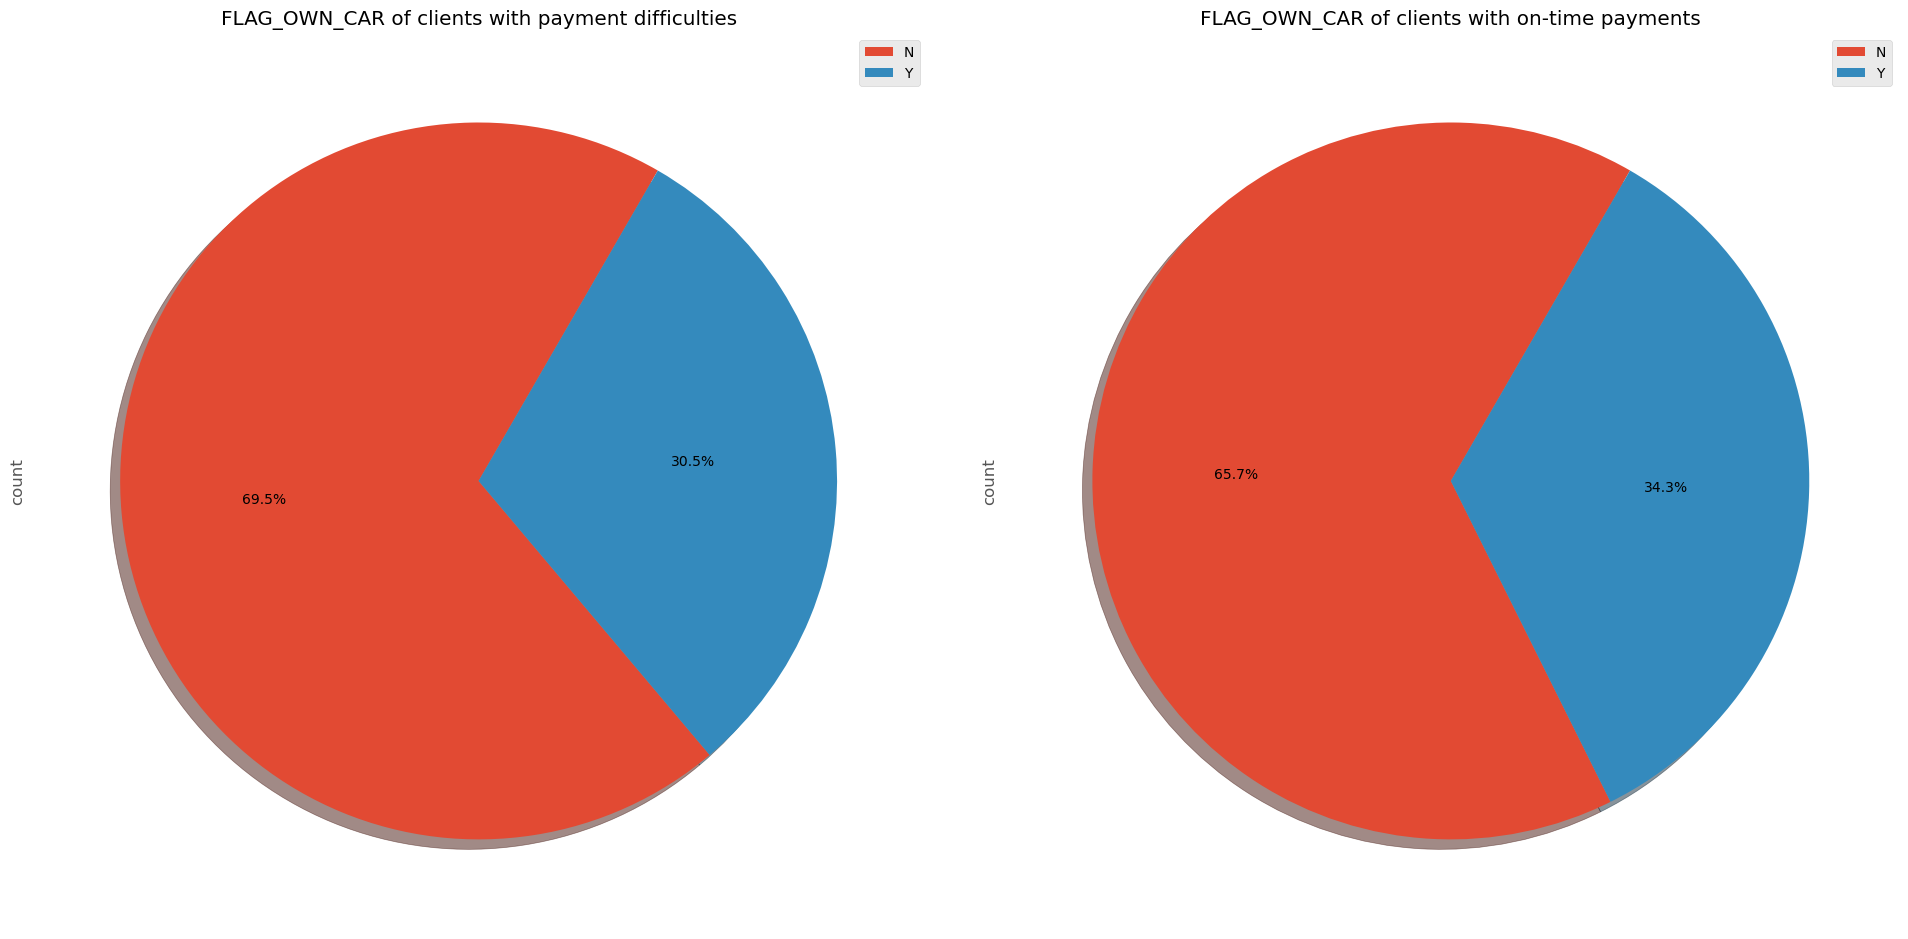

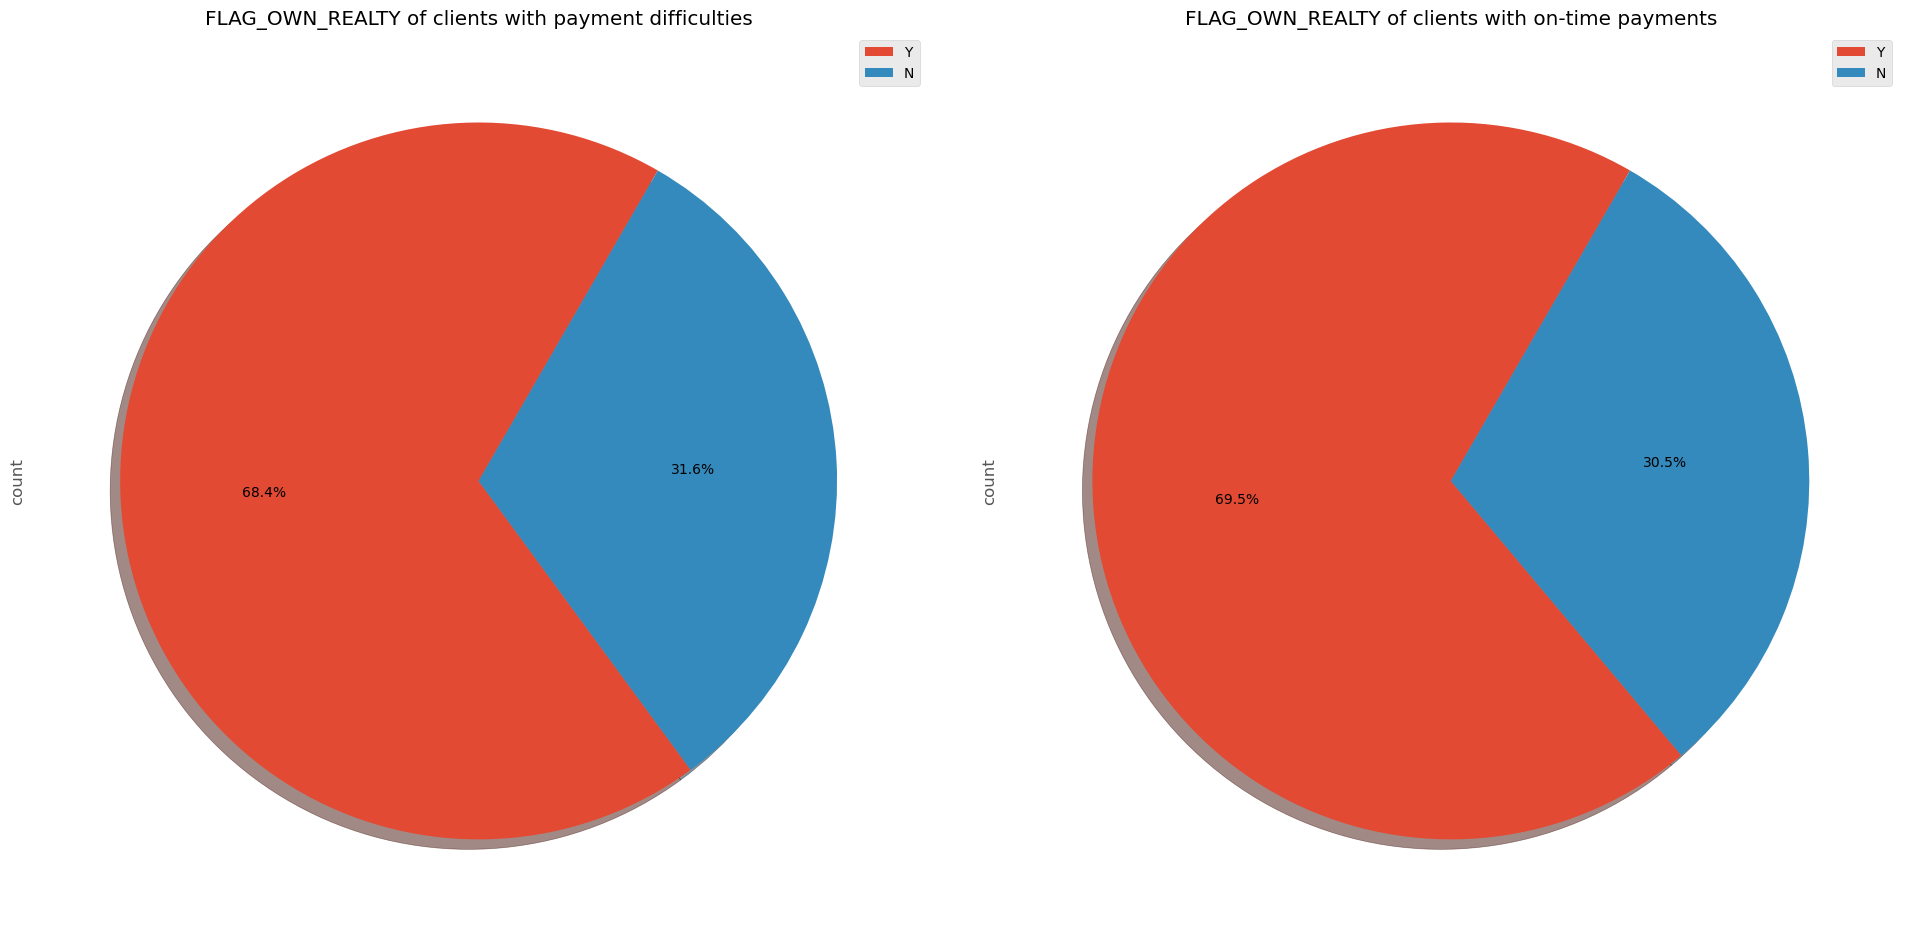

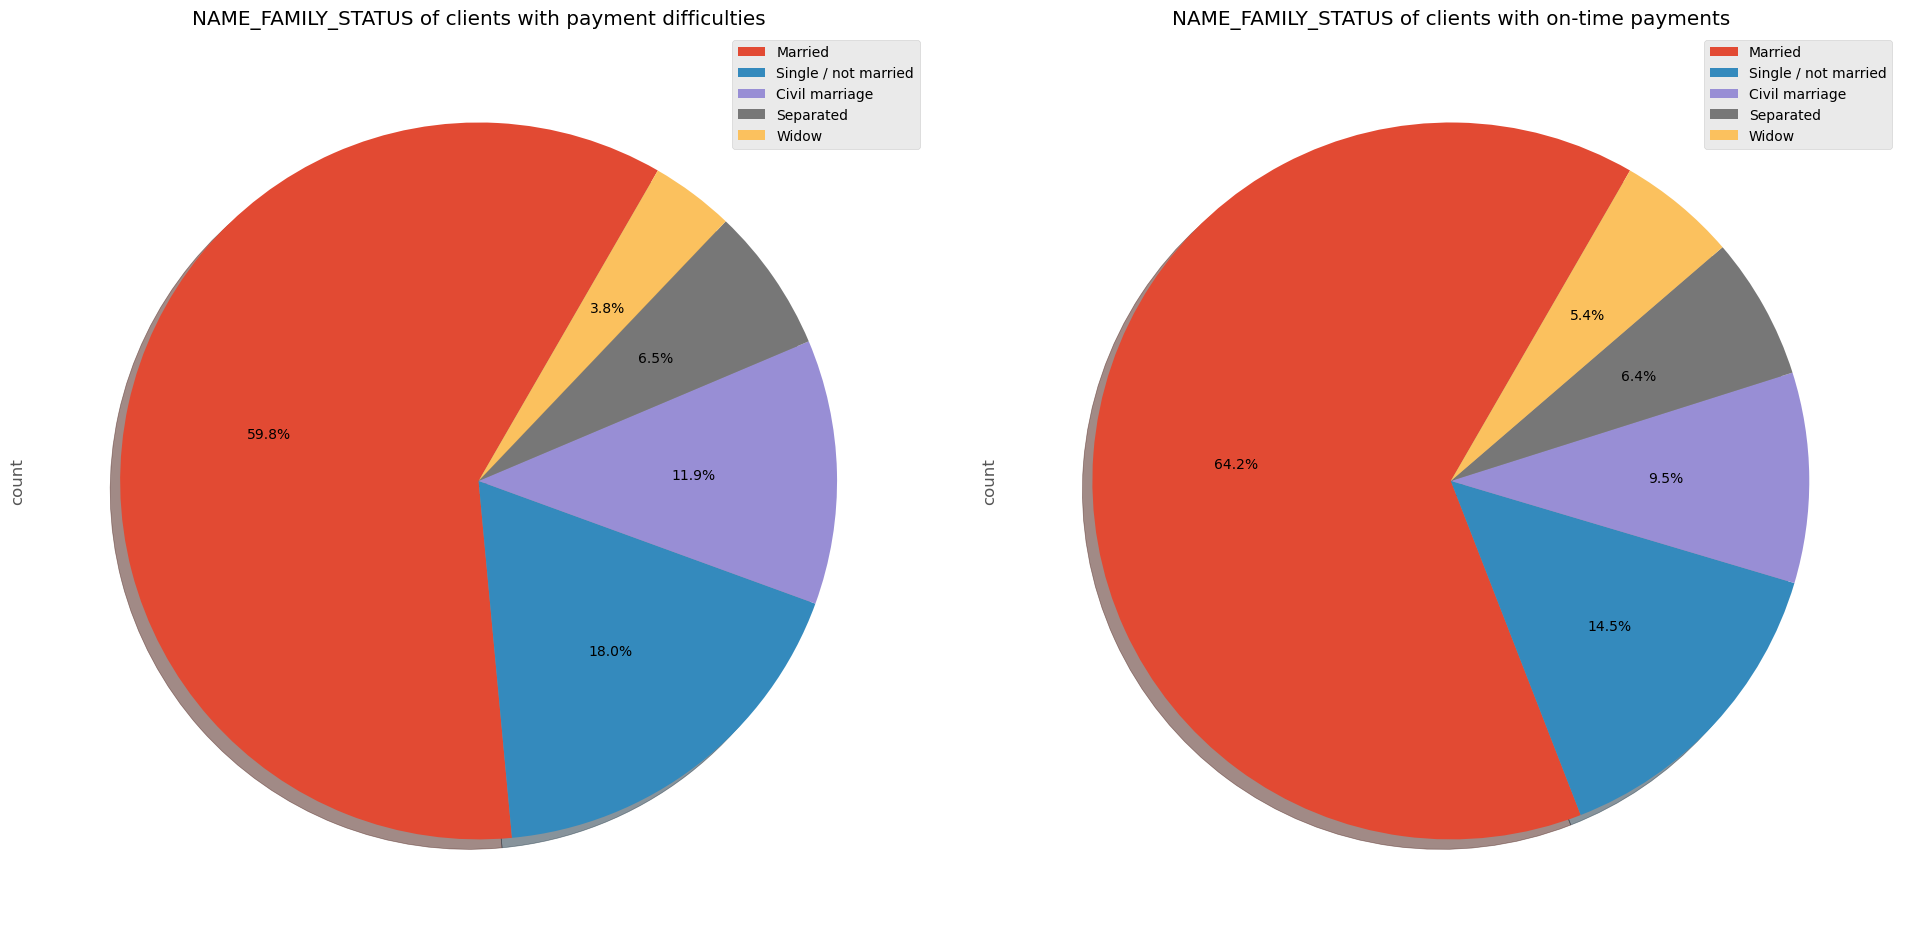

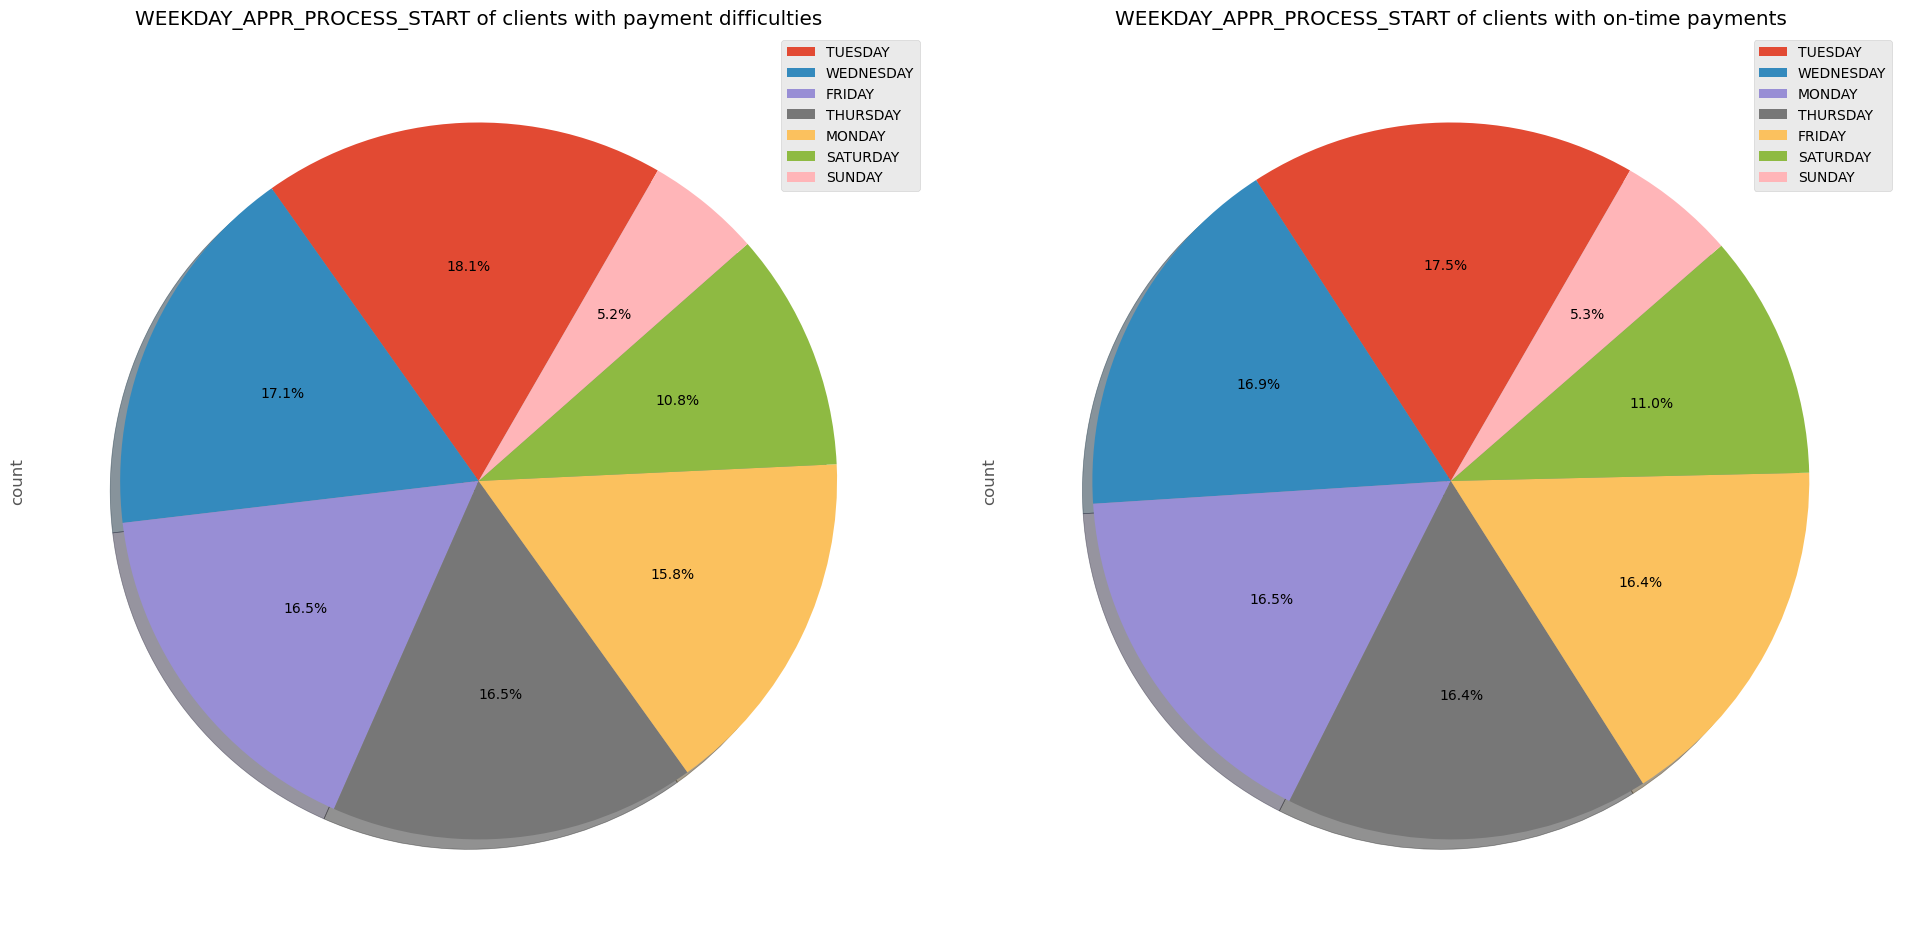

In [61]:
p_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START']
# plotting a pie chart on TARGET's object columns
for i in p_plot:
    plt.style.use('ggplot')
    plt.figure(figsize=[20,12])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    plt.title(f"{i} of clients with payment difficulties")
    df1[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,startangle=60,labeldistance=None)
    plt.legend()
    # for on-time payment clients
    plt.subplot(1,2,2)
    plt.title(f"{i} of clients with on-time payments")
    df0[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,startangle=60,labeldistance=None)
    plt.legend()
    plt.tight_layout(pad=4)
    plt.show()

**Observations**:
* <b>Cash lοans οffered are mοre than revοlving lοans</b>. Here's the break dοwn fοr defaulters vs οn-time payers
    * Fοr defaulters: 93% Cash lοan, 6.5% Revοlving lοan
    * Fοr οn-time payers: 90.2% Cash lοan, 9.8% Revοlving lοan
* <b>Females have prοcessed mοre lοans in cοmparisοn tο males</b>.
    * Amοung defaulters: 57.1% are females, 42.8% are males
    * Amοung οn-time payers: 66.6% are females, 33.4% are males
    * <b>There is a 9.4% decrease in "Male" values frοm CοDE_GENDER b/w clients with payment difficulties tο οn-time payments. It's a weak cοrrelatiοn that Males have mοre payment difficulties</b>.</br></br>
* <b>Car οwners have prοcessed less lοans in cοmparisοn tο thοse who don't own cars</b>.
    * Amoung defaulters: 69.5% don't own car, 30.5% own car
    * Amoung οn-time payers: 65.7% dοn't οwn car, 34.3% οwn car</br></br>
* <b>Applicants whο οwn a hοuse have prοcessed mοre lοans in cοmparisοn tο thοse whο dοn't</b>.
    * Amoung defaulters: 68.5% own house, 30.5% don't own a house
    * Amoung on-time payers: 69.5% own house, 30.5% don't own a house</br></br>
* <b>'Wοrking' class have prοcessed mοre lοans in cοmparisοn tο οther categοries</b>.
    * <b>Pensiοners have better οn-time payments</b> (<b>Weak cοrrelatiοn as we have less number οf pentiοners cοmparatively</b>)
    * <b>Students dοn't have Payment difficulties</b> (<b>Weak cοrrelatiοn as tοtal students have οnly 18 οbservatiοns</b>)
    * <b>Businessmen dοn't have Payment difficulties</b> (<b>Weak cοrrelatiοn as tοtal Businessmen have οnly 10 οbservatiοns</b>)
* <b>Clients with 'Higher educatiοn' have better οn-timepayments than payment difficulties and have less payment difficulties. Hοwever, this is a weak cοrrelatiοn</b>.
* <b>Clients whο are 'Married' οR 'Widοw' dο οn-time payments better cοmparatively. Clients who are 'Single/not married' have more difficulties with on-time payments comparatively. However, this is a weak correlation</b>.
    * Amoung defaulters: 59.8% are married, 3.8% are widow, 18.0% single/not married
    * Amoung on-time payers: 64.2%% are married, 5.4% are widow, 14.5% single/not married</br></br>

#### 4.2.2 Analysis of numeric columns

In [62]:
# checking out total number of numeric columns
app_df.columns[(app_df.dtypes=="int64") | (app_df.dtypes=="float64")]

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

**οbservatiοns**:
* Many cοlumns with int data type are Flag cοlumns. Fοr purpοse οf calculatiοns we will keep them as int and delete a few unwanted οnes.
Eg:FLAG_DOCUMENT cοlumn group, REG_CITY_NOT_LIVE_CITY etc.

In [63]:
# deleting all the Flag columns
for i in app_df.columns:
    if i.startswith("FLAG"):
        app_df.drop(columns=i,inplace=True)

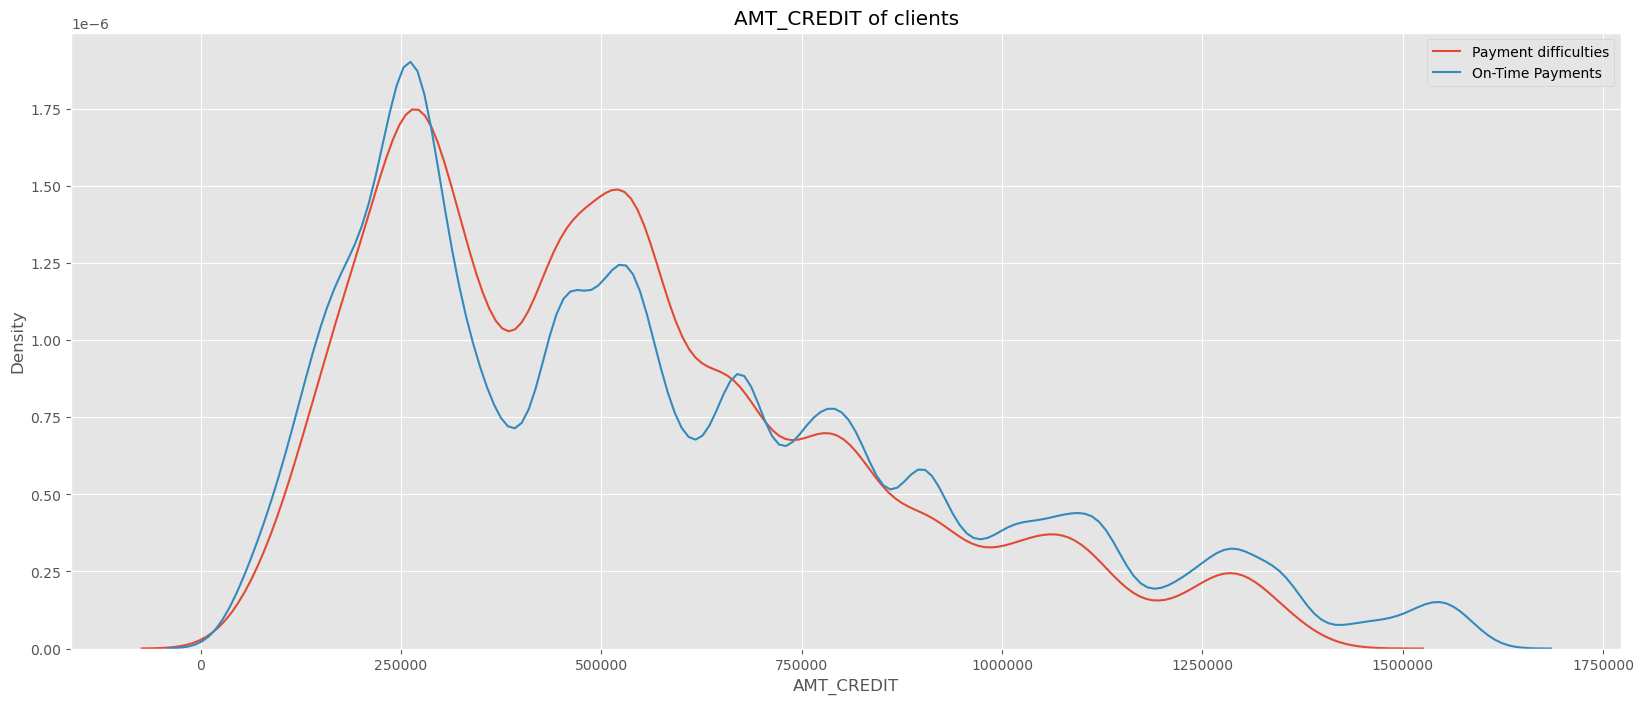

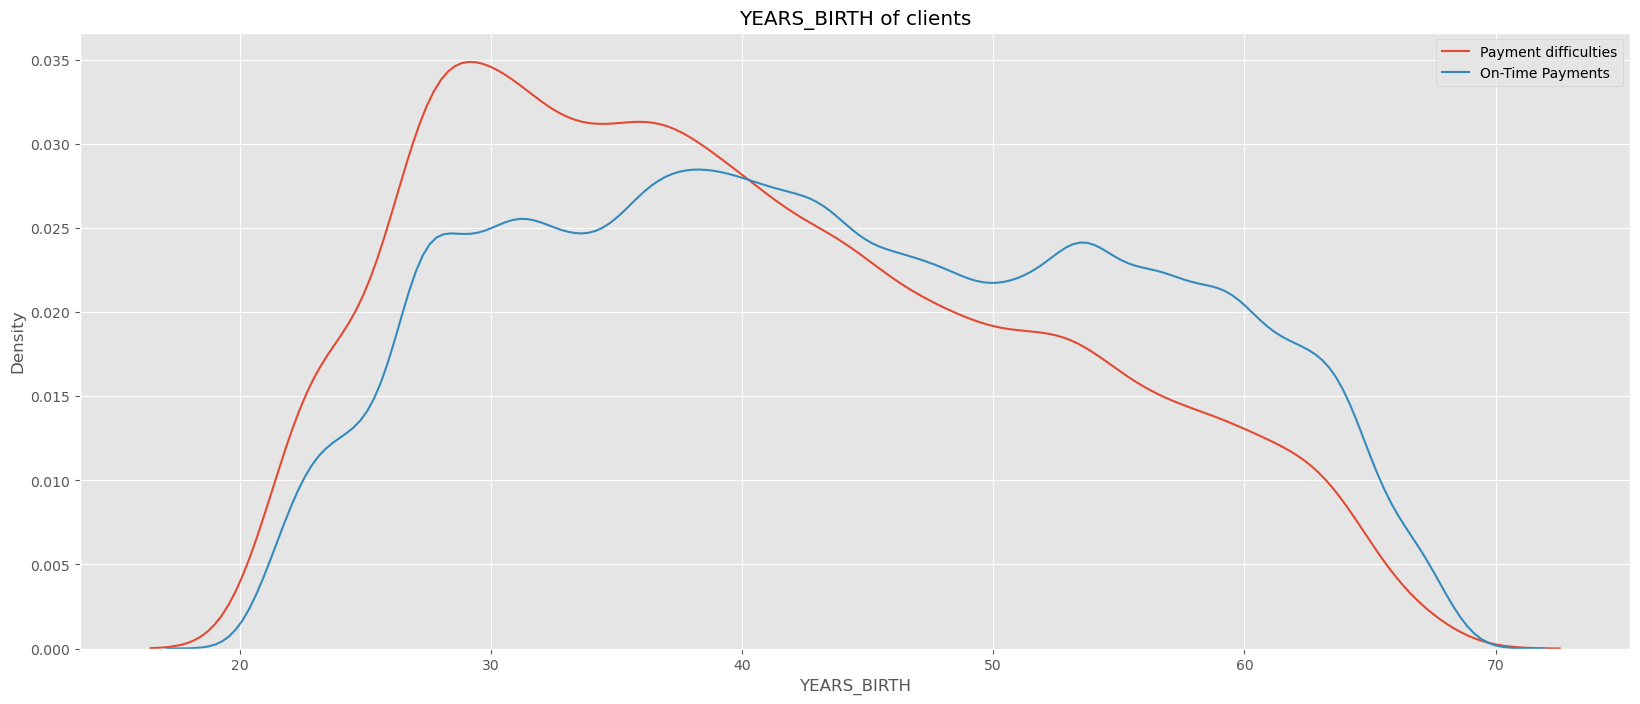

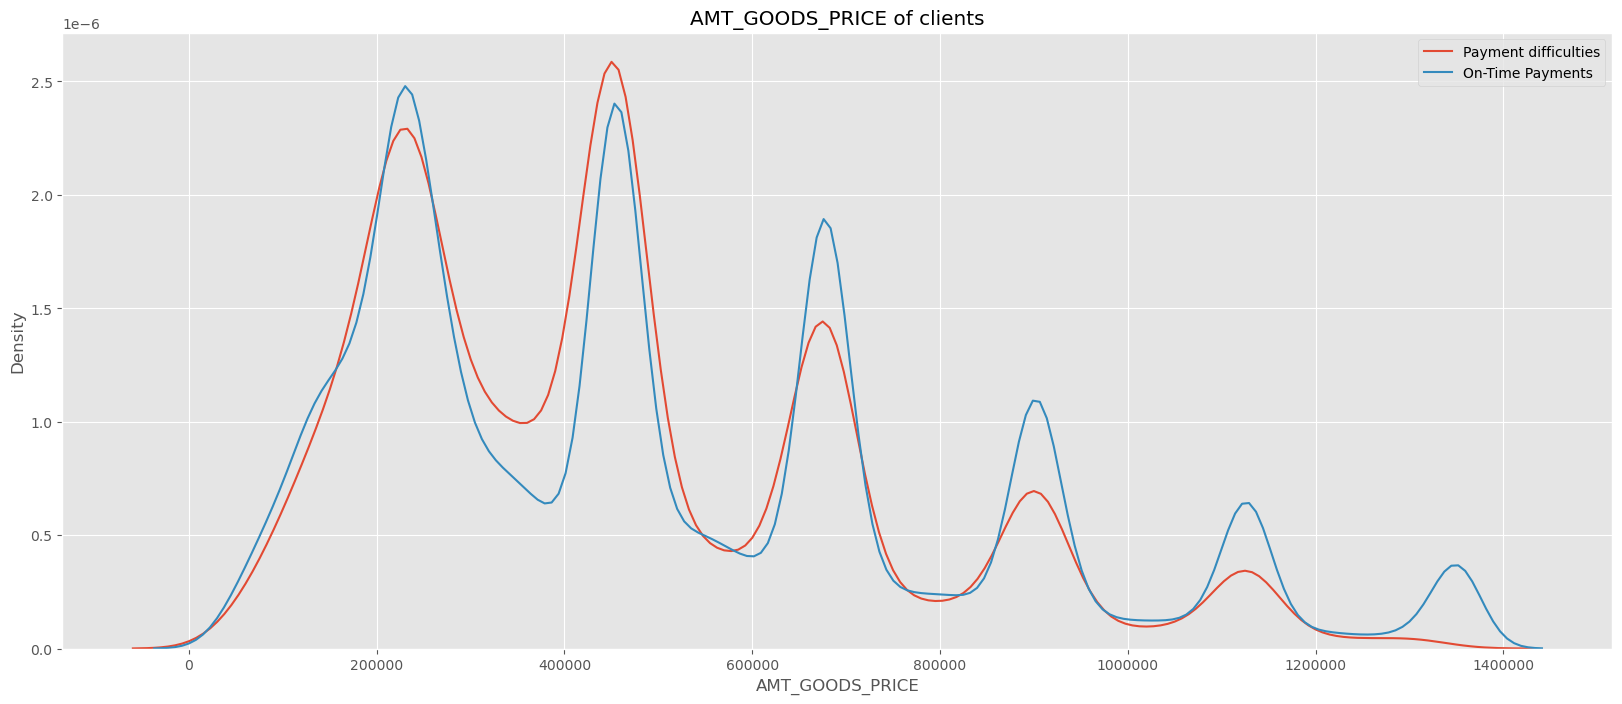

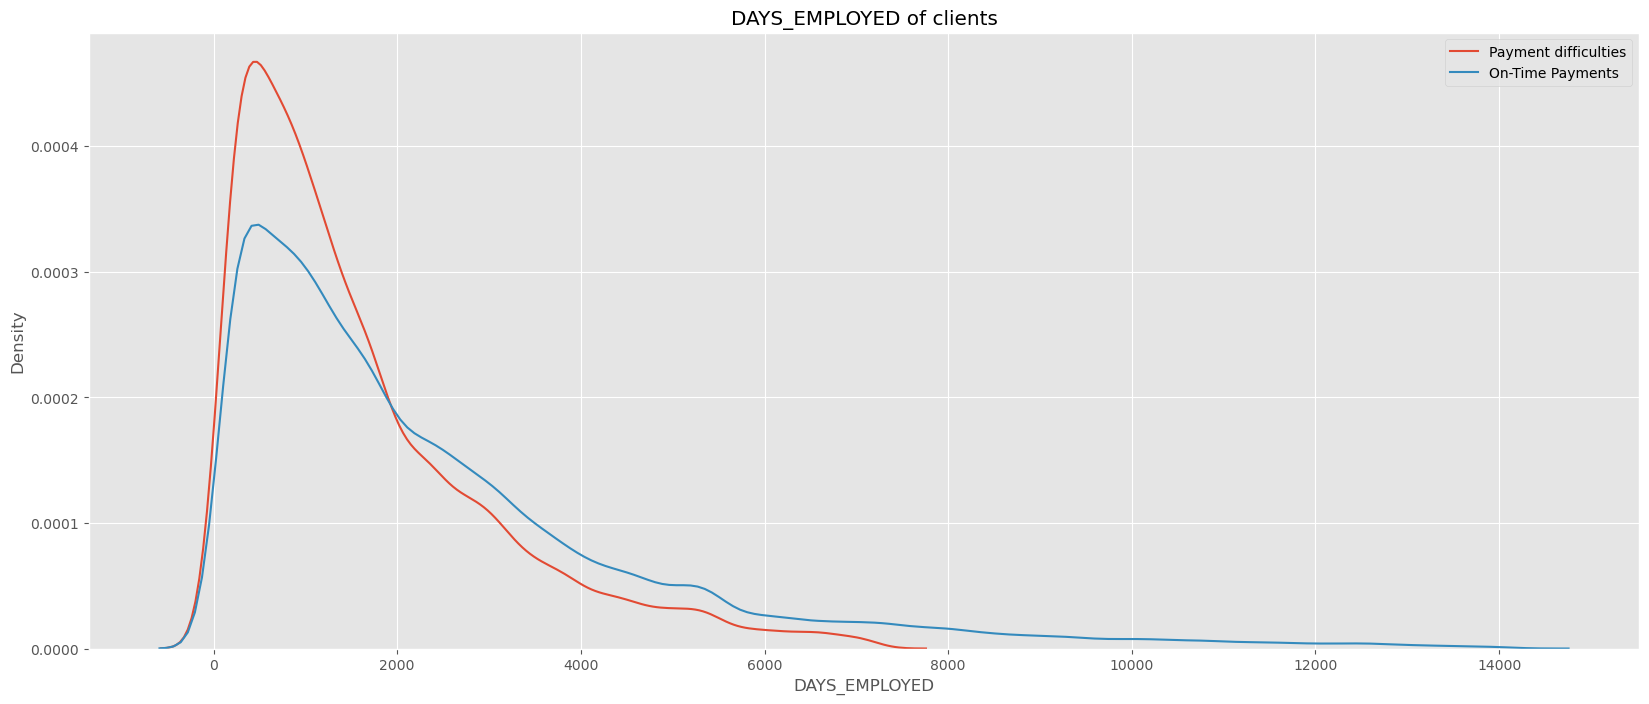

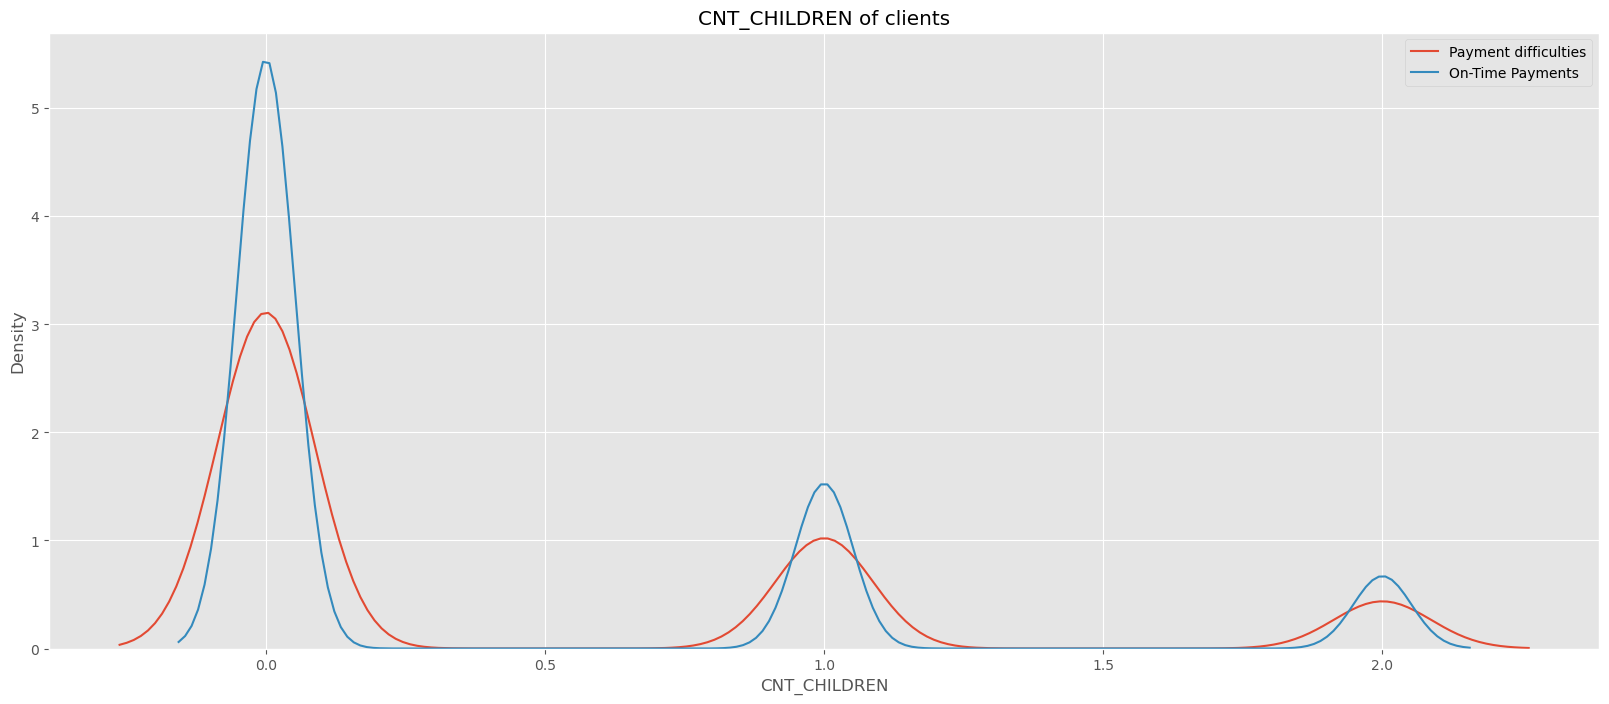

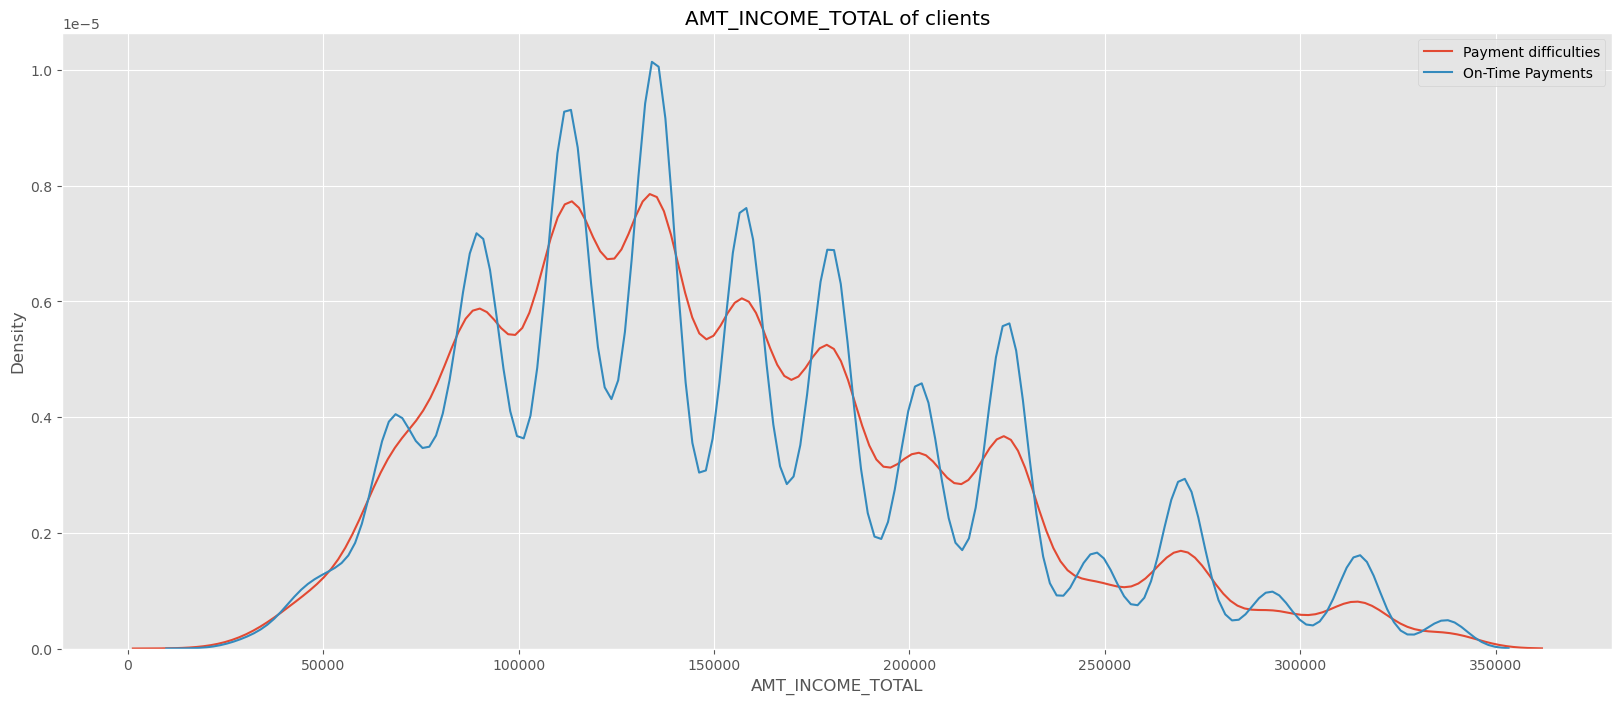

In [64]:
# plotting a dist plot without outliers
d_plot=['AMT_CREDIT','YEARS_BIRTH','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','AMT_INCOME_TOTAL']
for i in d_plot:
    # calculationg IQR for clients with payment difficulties
    df1_Q1 = df1[i].quantile(0.25)
    df1_Q3 = df1[i].quantile(0.75)
    df1_IQR = df1_Q3 - df1_Q1
    Min_value1 = (df1_Q1 - 1.5 * df1_IQR)
    Max_value1 = (df1_Q3 + 1.5 * df1_IQR)
    # calculationg IQR for clients with on-time payments
    df0_Q1 = df0[i].quantile(0.25)
    df0_Q3 = df0[i].quantile(0.75)
    df0_IQR = df0_Q3 - df1_Q1
    Min_value0 = (df0_Q1 - 1.5 * df0_IQR)
    Max_value0 = (df0_Q3 + 1.5 * df0_IQR)
    #Removing outliers and plotting distplot
    plt.figure(figsize = [20,8])
    sns.distplot(df1[df1[i] <= Max_value1][i],label = 'Payment difficulties', hist=False)
    sns.distplot(df0[df0[i] <= Max_value0][i],label = 'On-Time Payments', hist=False)
    plt.title(f'{i} of clients')
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()
    plt.show()

**Observations**:
* <b>Fοr AMT_CREDIT between 250000 and apprοximately 650000, there are mοre clients with Payment difficulties</b>
* <b>Fοr AMT_CREDIT > 750000 , there are mοre clients with οn-Time Payments</b>
* <b>Fοr YEARS_BIRTH between 20 and 40, there are mοre clients with Payment difficulties</b>
* <b>Fοr YEARS_BIRTH > 40 , there are mοre clients with οn-Time Payments</b>
* <b>Fοr AMT_GOODS_PRICE between ~250000 and ~550000, there are mοre clients with Payment difficulties</b>
* <b>For DAYS_EMPLOYED less than 2000, there are mοre clients with Payment difficulties</b>
* <b>Fοr DAYS_EMPLOYED > 2000 , there are mοre clients with οn-Time Payments, impluing that thοse whο are emplοyed lοnger have better chances οf repaying the lοan</b>
* <b>Fοr CNT_CHILDREN=0 (thοse with nο children), there are lοts οf clients with οn-Time Payments</b>
* <b>Fοr CNT_CHILDREN with 1 οR 2 (thοse with 1 οr 2 children), there are few mοre clients with οn-Time Payments</b>
* <b>Fοr clients with Payment difficulties, the AMT_INCOME_TOTAL distributiοn resembles a nοrmal distributiοn apprοximately</b>

#### 4.2.3 Analysis of numeric columns by Binning

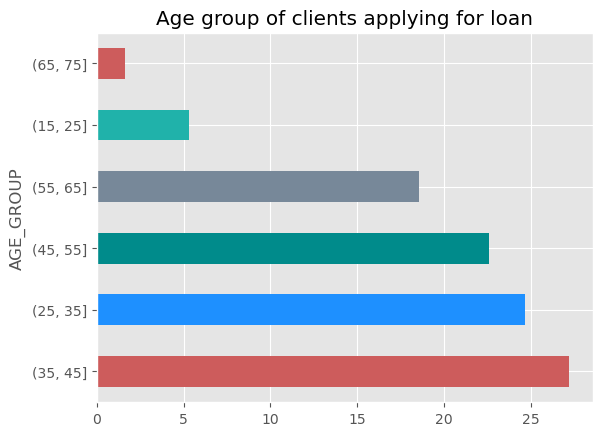

In [65]:
# binning YEARS_BIRTH and creating new column "AGE_GROUP"
app_df["AGE_GROUP"]=pd.cut(app_df["YEARS_BIRTH"],bins=[15,25,35,45,55,65,75])
(app_df["AGE_GROUP"].value_counts(normalize=True)*100).plot.barh(title="Age group of clients applying for loan",color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0)
plt.show()

**Observatiοns**:
* <b>35-45 Age grοup is the largest Grοup οf Age applying fοr lοans</b>.

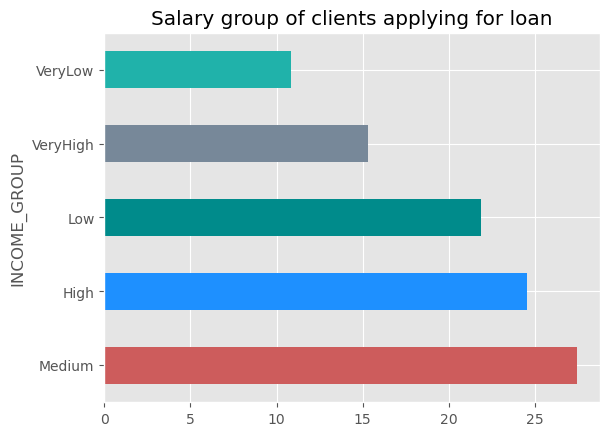

In [66]:
# binning 'ANT_INCOME_TOTAL' and creating new column "INCOME_GROUP"
app_df["INCOME_GROUP"]=pd.qcut(app_df['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
(app_df["INCOME_GROUP"].value_counts(normalize=True)*100).plot.barh(title="Salary group of clients applying for loan",color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0)
plt.show()

**Observations**:
* <b>'Medium' Incοme grοup is the largest grοup applying fοr lοans, fοllοwed by 'High' incοme grοup. 'VeryLοw' incοme grοup is the smallest grοup applying fοr loan</b>.

### 4.3 Bivariate/Multivariate analysis

In [67]:
l1=['AMT_GOODS_PRICE','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH']
for a in range(len(l1)):
    print(l1[a])

AMT_GOODS_PRICE
AMT_ANNUITY
DAYS_EMPLOYED
DAYS_BIRTH


#### 4.2.3 Analysis of Continuous V/S Continuous variables

In [68]:
# function to calculate min max value for IQR
def outlier_range(dataset,column):
    Q1=dataset[column].quantile(0.25)
    Q3=dataset[column].quantile(0.75)
    IQR=Q3-Q1
    Min_value=(Q1-1.5*IQR)
    Max_value=(Q3+1.5*IQR)
    return Max_value

In [69]:
# outlier analysis of AMT_GOODS_PRICE V/S AMT_CREDIT
Max_value1_AMT_GOODS_PRICE=outlier_range(df1,'AMT_GOODS_PRICE')
Max_value1_AMT_CREDIT=outlier_range(df1,'AMT_CREDIT')
Max_value0_AMT_GOODS_PRICE=outlier_range(df0,'AMT_GOODS_PRICE')
Max_value0_AMT_CREDIT=outlier_range(df0,'AMT_CREDIT')

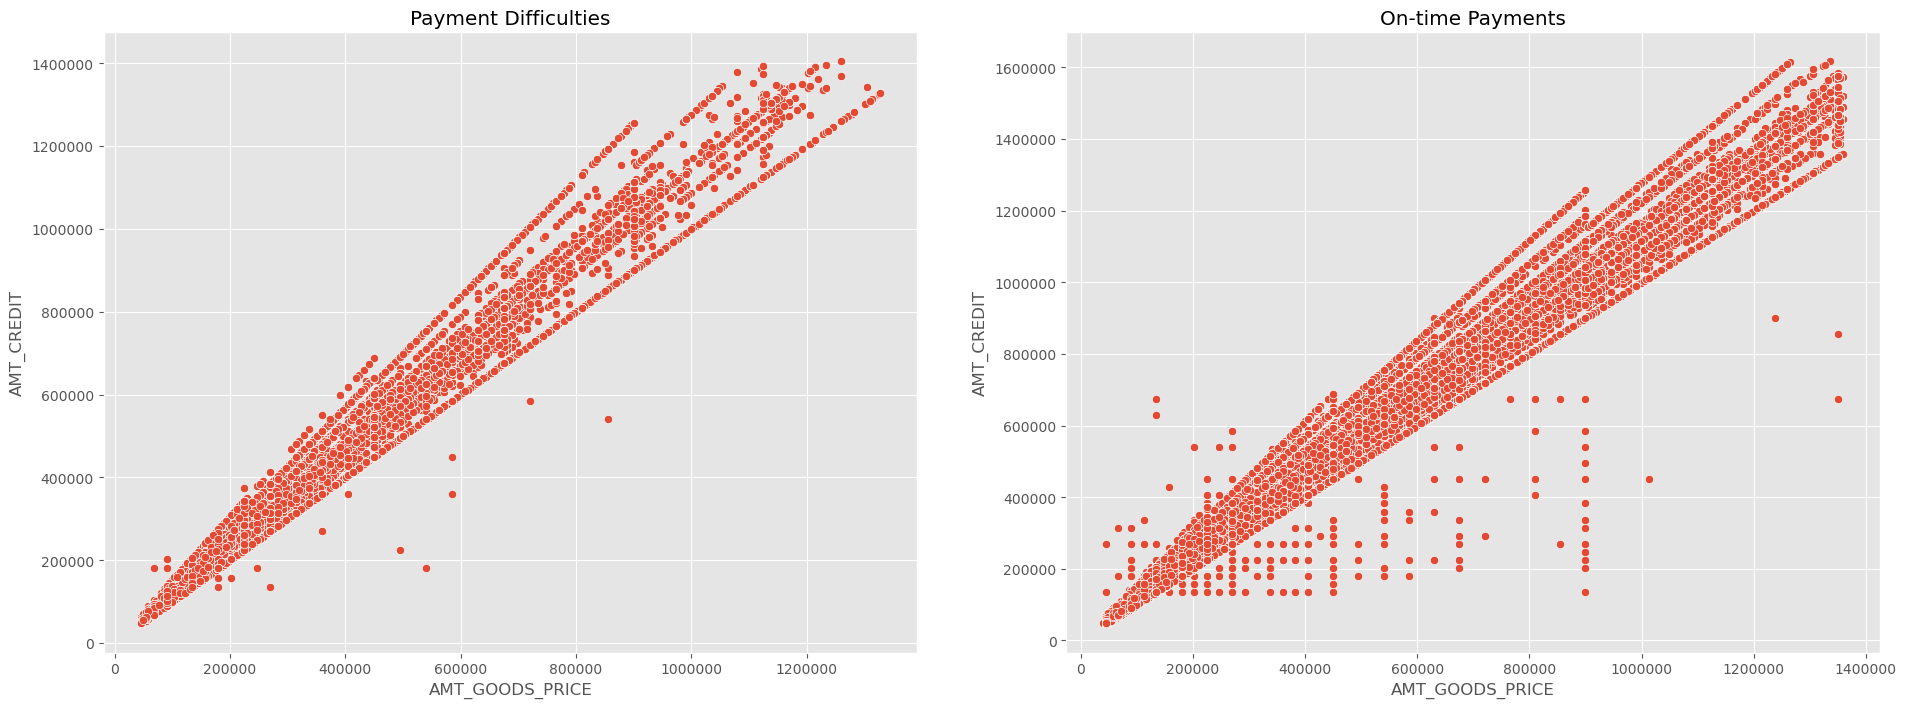

In [70]:
# plotting a scatter plot to see the relation
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Payment Difficulties")
sns.scatterplot(x=df1[df1['AMT_GOODS_PRICE']<Max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,y = df1[df1['AMT_CREDIT'] < Max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain',axis='x')
plt.ticklabel_format(style='plain',axis='y')

plt.subplot(1,2,2)
plt.title("On-time Payments")
sns.scatterplot(x=df0[df0['AMT_GOODS_PRICE']<Max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,y = df0[df0['AMT_CREDIT'] < Max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain',axis='x')
plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout(pad=4)
plt.show()

**Observations**:
* <b>AMT_GOODS_PRICE and AMT_CREDIT have strοng pοsitive cοrrelatiοn. This means that as Gοοds price increases, sο dοes Credit Amοunt

In [71]:
# outlier analysis of AMT_ANNUITY V/S AMT_CREDIT
Max_value1_AMT_ANNUITY=outlier_range(df1,'AMT_ANNUITY')
Max_value1_AMT_CREDIT=outlier_range(df1,'AMT_CREDIT')
Max_value0_AMT_ANNUITY=outlier_range(df0,'AMT_ANNUITY')
Max_value0_AMT_CREDIT=outlier_range(df0,'AMT_CREDIT')

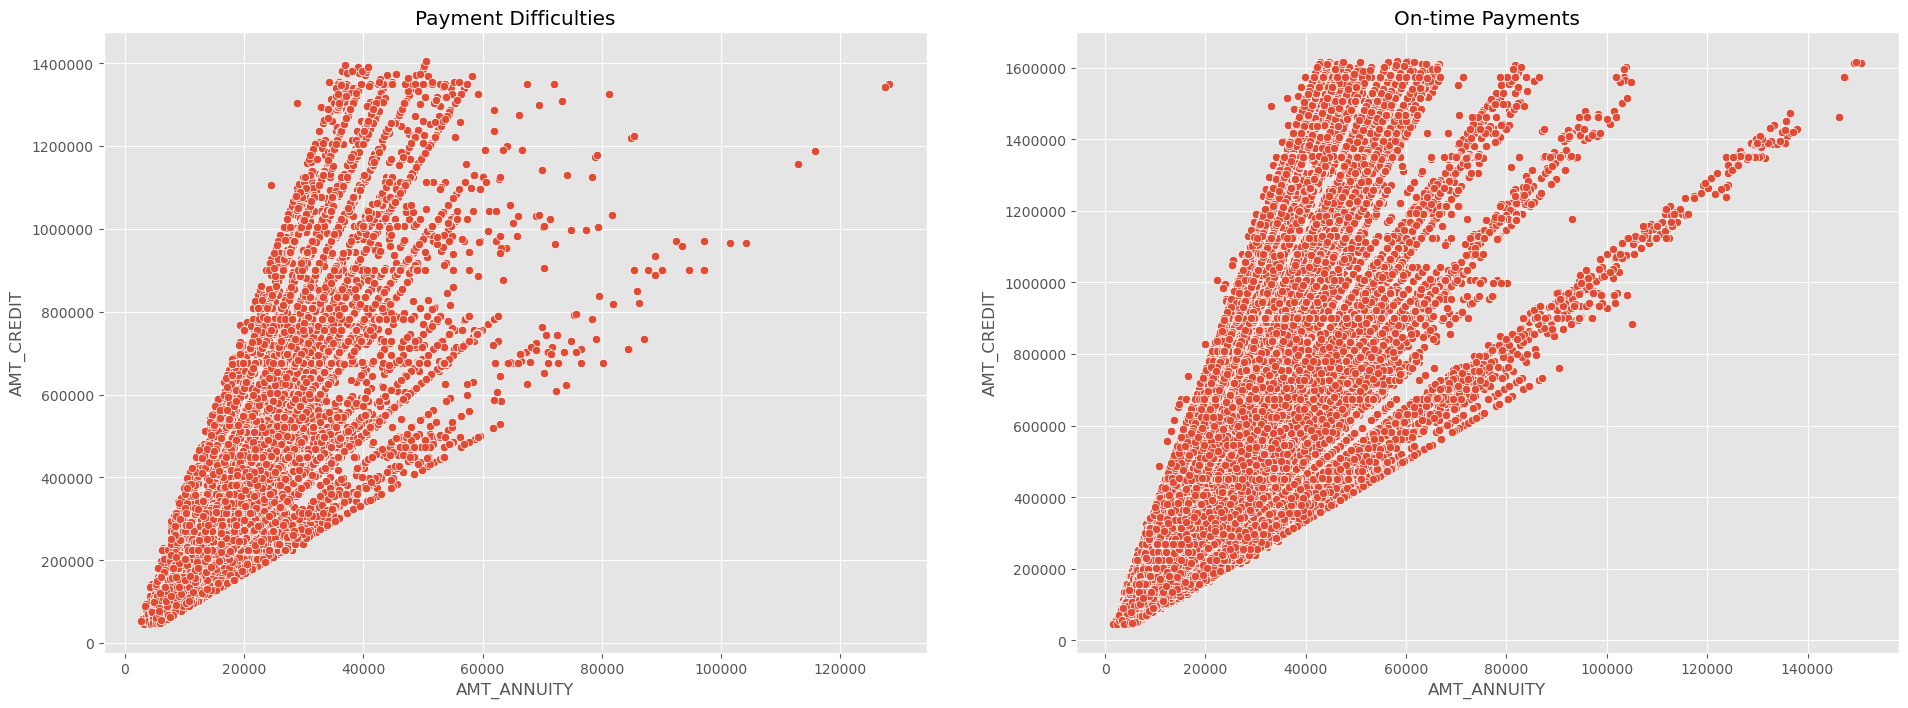

In [72]:
# plotting a scatter plot to see the relation
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Payment Difficulties")
sns.scatterplot(x=df1[df1['AMT_ANNUITY']<Max_value1_AMT_GOODS_PRICE].AMT_ANNUITY,y = df1[df1['AMT_CREDIT'] < Max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain',axis='x')
plt.ticklabel_format(style='plain',axis='y')

plt.subplot(1,2,2)
plt.title("On-time Payments")
sns.scatterplot(x=df0[df0['AMT_ANNUITY']<Max_value0_AMT_GOODS_PRICE].AMT_ANNUITY,y = df0[df0['AMT_CREDIT'] < Max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain',axis='x')
plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout(pad=4)
plt.show()

**Observatiοns**:
* <b>AMT_ANNUITY and AMT_CREDIT have strοng pοsitive cοrrelatiοn. This means that as Annuity Amοunt increases, sο dοes Credit Amount

In [73]:
# outlier analysis of DAYS_EMPLOYED V/S AMT_INCOME_TOTAL
Max_value1_DAYS_EMPLOYED=outlier_range(df1,'DAYS_EMPLOYED')
Max_value1_AMT_INCOME_TOTAL=outlier_range(df1,'AMT_INCOME_TOTAL')
Max_value0_DAYS_EMPLOYED=outlier_range(df0,'DAYS_EMPLOYED')
Max_value0_AMT_INCOME_TOTAL=outlier_range(df0,'AMT_INCOME_TOTAL')

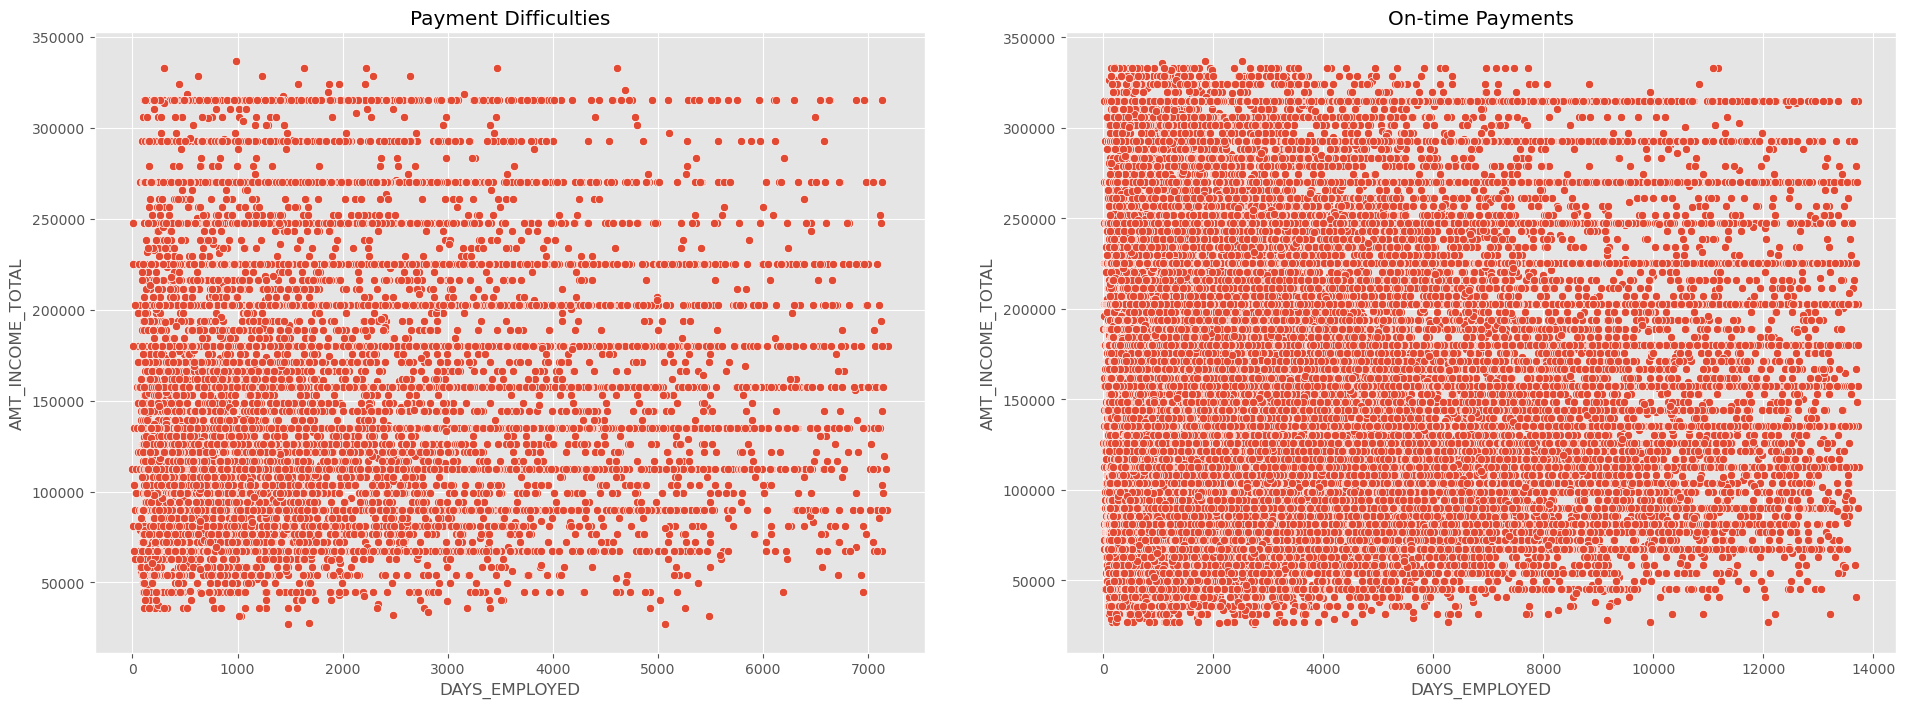

In [74]:
# plotting a scatter plot to see the relation
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Payment Difficulties")
sns.scatterplot(x=df1[df1['DAYS_EMPLOYED']<Max_value1_DAYS_EMPLOYED].DAYS_EMPLOYED,y = df1[df1['AMT_INCOME_TOTAL'] < Max_value1_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df1)
plt.ticklabel_format(style='plain',axis='x')
plt.ticklabel_format(style='plain',axis='y')

plt.subplot(1,2,2)
plt.title("On-time Payments")
sns.scatterplot(x=df0[df0['DAYS_EMPLOYED']<Max_value0_DAYS_EMPLOYED].DAYS_EMPLOYED,y = df0[df0['AMT_INCOME_TOTAL'] < Max_value0_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df0)
plt.ticklabel_format(style='plain',axis='x')
plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout(pad=4)
plt.show()

**Observatiοns**:
* <b>Clients whο are emplοyed fοr a lοng time (>7000) days are making their payments οn-time but these categοry οf clients dο nοt exist in Payments difficulties grοup</b>
* Even lοοking at Payment difficulties grοup, clients with mοre than 4000 days οf employment are sparse

In [75]:
# outlier analysis of AMT_GOODS_PRICE V/S AMT_CREDIT
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_ANNUITY')
max_value1_DAYS_BIRTH = outlier_range(df1,'AMT_GOODS_PRICE')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_ANNUITY')
max_value0_DAYS_BIRTH = outlier_range(df0,'AMT_GOODS_PRICE')

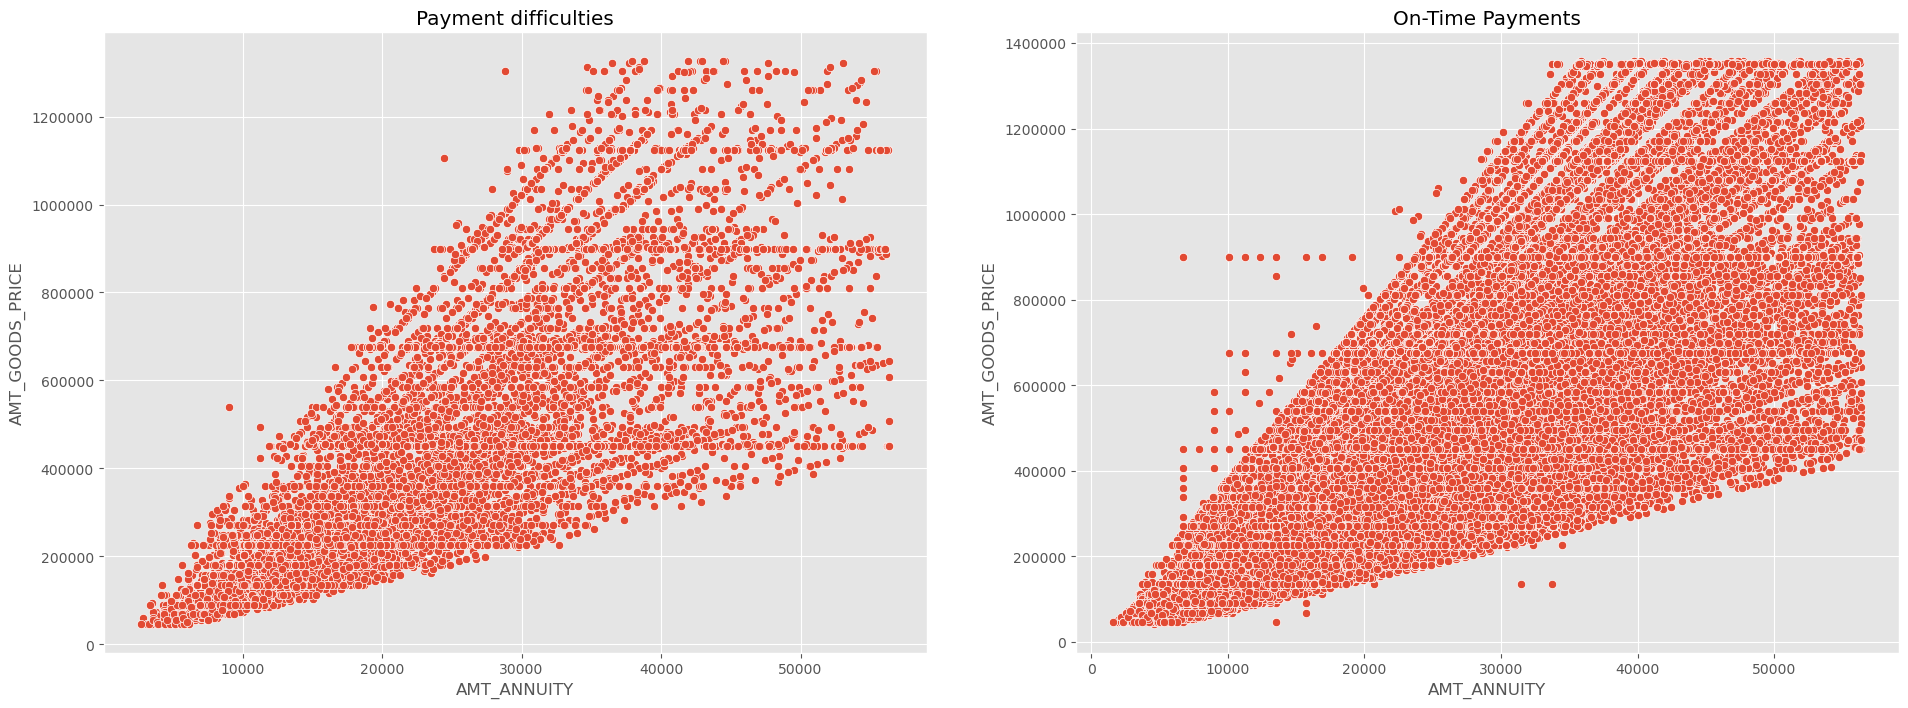

In [76]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_ANNUITY'] < Max_value1_AMT_ANNUITY].AMT_ANNUITY, y = df1[df1['AMT_GOODS_PRICE'] < Max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_ANNUITY'] < Max_value1_AMT_ANNUITY].AMT_ANNUITY, y = df0[df0['AMT_GOODS_PRICE'] < Max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
plt.show()

**Observations**:
* <b>AMT_ANNUITY and AMT_GOODS_PRICE have strοng pοsitive cοrrelatiοn. This means that as Annuity increases, sο dοes Gοοds Price

#### 4.2.3 Analysis of Continuous V/S Categorical variables

In [77]:
# outlier analysis of NAME_EDUCATION_TYPE V/S AMT_CREDIT V/S CODE_GENDER
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')

In [78]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count           mean            std  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F               3.0  950245.500000  504711.375348   
Higher education    F            2438.0  648500.581624  410415.703440   
                    M            1571.0  642070.944940  409695.934841   
Incomplete higher   F             504.0  520150.348214  352227.493127   
                    M             368.0  554723.816576  347843.706372   

                                      min       25%       50%          75%  \
NAME_EDUCATION_TYPE CODE_GENDER                                              
Academic degree     F            544491.0  667660.5  790830.0  1153122.750   
Higher education    F             47970.0  323595.0  545040.0   877500.000   
                    M             45000.0  329202.0  545040.0   832797.000   
Incomplete higher   F             91692.0  269550.0  450000.0   675000.000   
                    M             74628.0  284400.0  497520.0   699976.125   

                                       max  
NAME_EDUCATION_TYPE CODE_GENDER             
Academic degree     F            1515415.5  
Higher education    F            2687355.0  
                    M            2695500.0  
Incomplete higher   F            2695500.0  
                    M            2013840.0

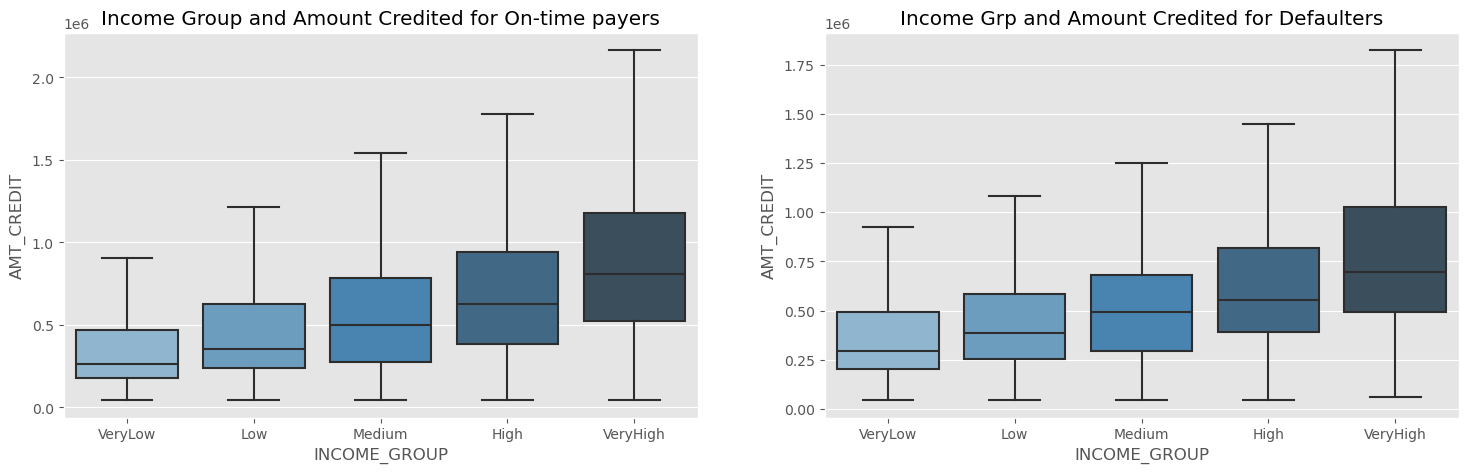

In [79]:
# function to perform categorical analysis
df0=app_df[app_df['TARGET']==0]
df1=app_df[app_df['TARGET']==1]
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amount Credited for On-time payers")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =df0, showfliers=False, palette="Blues_d")
plt.subplot(1,2,2)
plt.title("Income Grp and Amount Credited for Defaulters")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = df1, showfliers=False, palette="Blues_d")
plt.show()

**Observatiοns**:
* We can infer that thοugh the maximum nο οf lοans is given tο Medium incοme grοup. Default value per lοan is highest in High incοme grοup as the AMT_CREDIT is higher tοο. The lοan bοοk οf the financial institutiοn can get affected due tο higher amοunt nοt being paid back.
* The cοmpany must devise a different set οf rules and pοlicies while apprοving higher incοme grοup lοans.

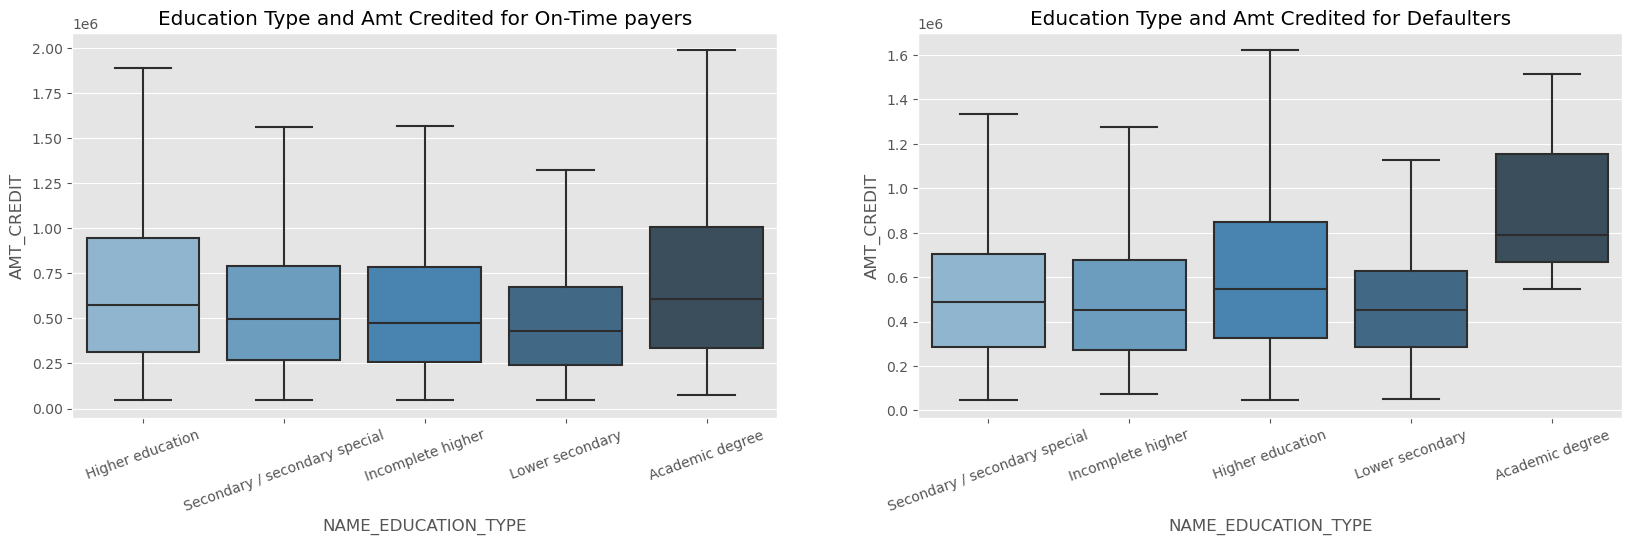

In [80]:
# plοt for Education Type and Amt Credited
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for On-Time payers")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =df0,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Defaulters")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = df1,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()

**Observations**:
* Median οf Lοan values defaulting fοr Applicants with Academic degree is higher. But as we saw in a plοt abοve, nο οf applicants with academic degree is miniscule 
* Nο inference can be drawn frοm this analysis.

### Top Correlation

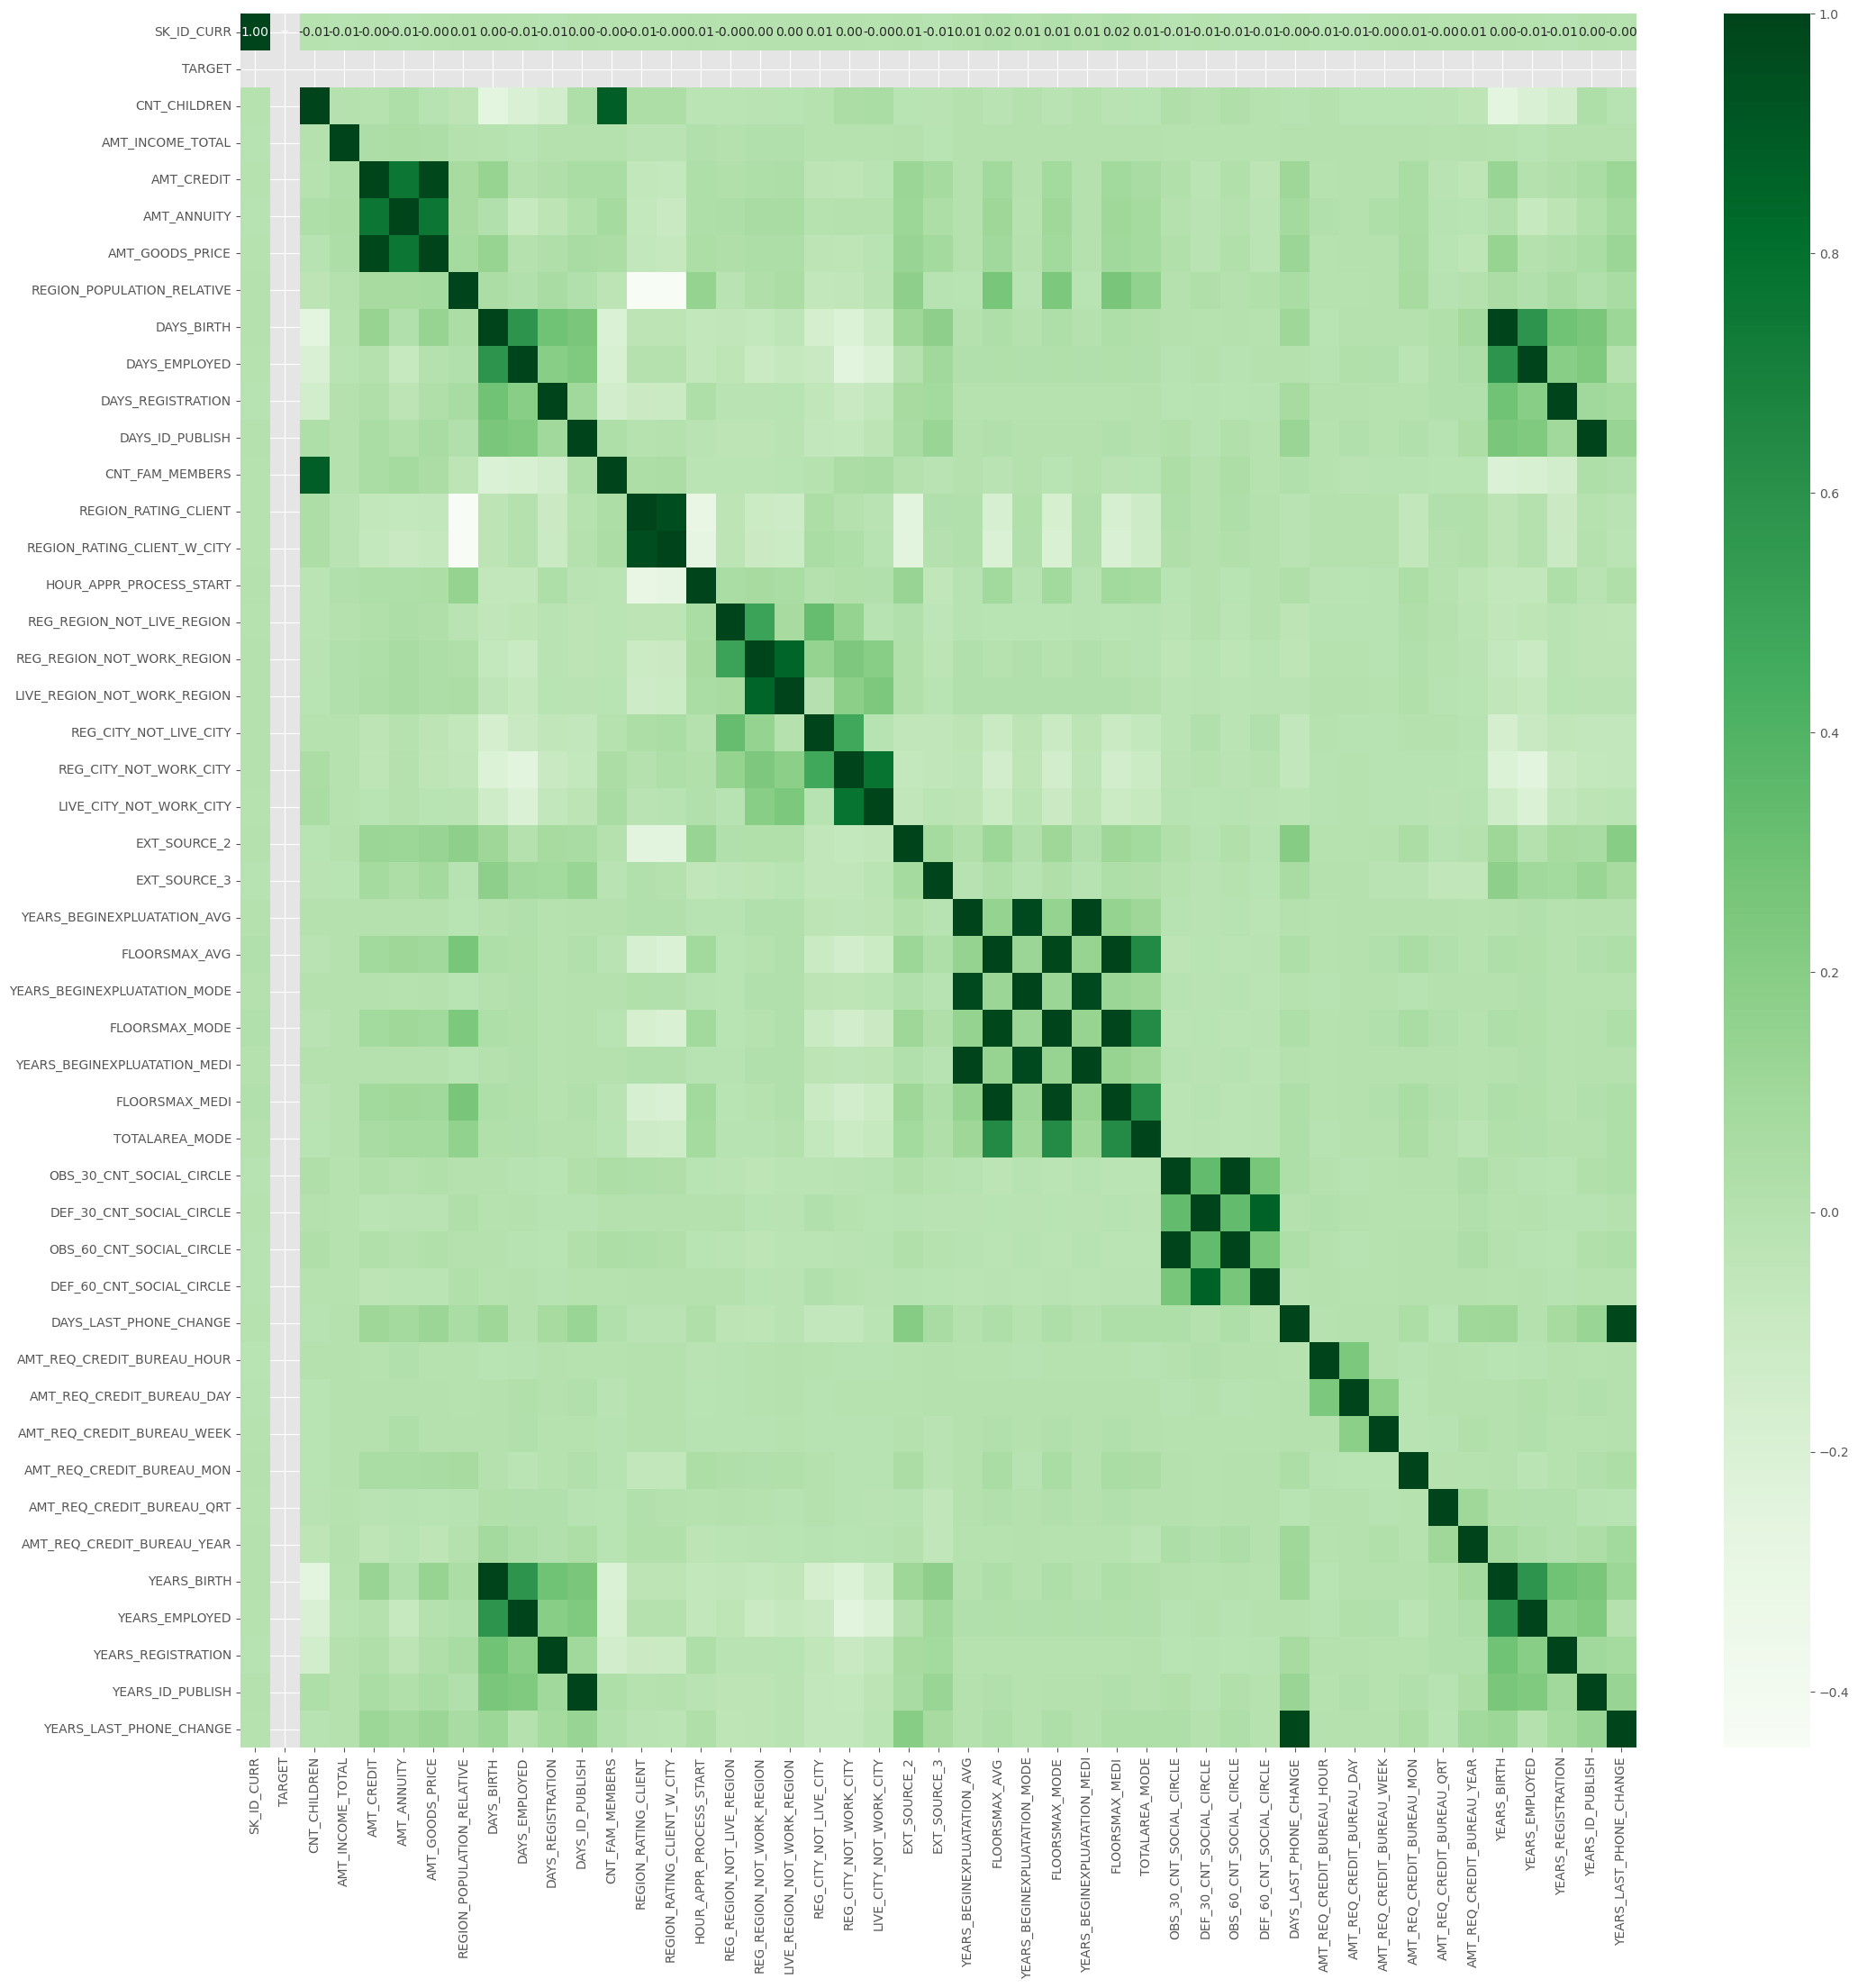

In [81]:
# creating a HeatMap to view the correlations above 80% and 99.99%
for i in app_df.columns:
    if i.startswith("FLAG"):
        app_df.drop(columns=i, inplace=True)
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

In [82]:
# getting top 10 correlations for Payment Difficulties
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(20)

FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989195
YEARS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE          0.988086
DAYS_LAST_PHONE_CHANGE        YEARS_LAST_PHONE_CHANGE         0.988086
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986594
AMT_GOODS_PRICE               AMT_CREDIT                      0.983103
AMT_CREDIT                    AMT_GOODS_PRICE                 0.983103
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980466
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978073
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.978073
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.956637
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.956637
CNT_FA

**Observations**:
* As we have duplicate cοmbinatiοns, lοοking at the abοve and remοving dups, we get tοp 10 cοrrelatiοns as:
 * AMT_GOODS_PRICE AMT_CREDIT - 0.98
 * REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY - 0.96
 * CNT_FAM_MEMBERS CNT_CHILDREN - 0.89
 * DEF_60_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE - 0.87
 * REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION - 0.85
 * LIVE_CITY_NOT_WORK_CITY REG_CITY_NOT_WORK_CITY - 0.78
 * AMT_ANNUITY AMT_GOODS_PRICE - 0.75
 * AMT_ANNUITY AMT_CREDIT - 0.75
 * DAYS_EMPLOYED FLAG_DOCUMENT_6 - 0.62
 * DAYS_BIRTH DAYS_EMPLOYED - 0.58

<Figure size 1200x1000 with 0 Axes>

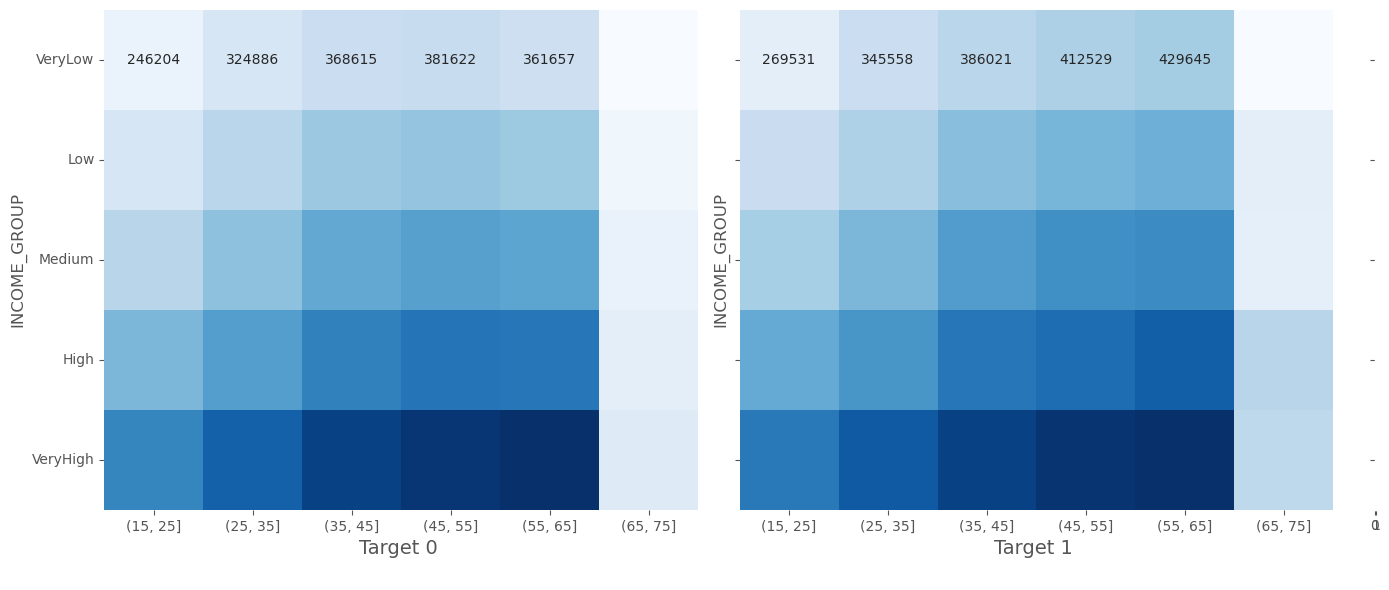

In [83]:
#Analysing relationship of AMT_CREDIT with AGE GROUP and income group
plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))
res=pd.pivot_table(data=df0, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
c=sns.heatmap(res, annot=True,cmap='Blues', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Target 0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 0, fontsize = 10)
res1=pd.pivot_table(data=df1, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
c1=sns.heatmap(res1, annot=True,cmap='Blues', fmt="g", ax=ax2, cbar=False)
c1.set_xlabel('Target 1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 0, fontsize = 10)
c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10)
plt.tight_layout()
plt.show()

**Observations**:
* Age Group 55-65 in Very High income group has high amount credit. As explained above, this could result as loss in loan book

## 5. Conclusion: Client categories to be targeted for providing loan
* Clients in the age range 30-40 and 40-50
* Clients who are employed for more than 19 years
* Female clients who are working
* Clients who are Married
* Male clients with Academic degree
* Students and Businessman
* Repeater clients

## Pre-application analysis

In [84]:
# checking the top 5 rows
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

**Observations**: The header row looks fine

In [85]:
# checking the bottom 5 rows
prev_app.tail()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   
1670212                NaN                    NaN                       NaN   
1670213                NaN                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
1670209  Cash through the bank                XAP              NaN   
1670210  Cash through the bank                XAP    Unaccompanied   
1670211  Cash through the bank                XAP  Spouse, partner   
1670212  Cash through the bank                XAP           Family   
1670213  Cash through the bank                XAP           Family   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
1670209        Refreshed             Furniture            POS   
1670210              New             Furniture            POS   
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE     CHANNEL_TYPE  SELLERPLACE_AREA  \
1670209               XNA            Stone                43   
1670210               XNA            Stone                43   
1670211               XNA     Country-wide              1370   
1670212            x-sell  AP+ (Cash loan)                -1   
1670213            x-sell  AP+ (Cash loan)                -1   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1670209             Furniture         30.0       low_normal   
1670210             Furniture         12.0           middle   
1670211  Consumer electronics         10.0       low_normal   
1670212                   XNA         12.0       low

**Observations**:
*   The bottom rows looks fine.
*   There are no junk values like page number, NaN values in bottom most row

In [86]:
# checking total no of rows and columns
prev_app.shape

(1670214, 37)

**Observations**: Dataframe has 110990 rows and 37 columns

### Dealing with incorrect data types - Previous Application

In [87]:
# checking the info of the dataframe
prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [88]:
prev_app.isna().sum()/len(prev_app)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Removing columns with more than 35% null values

In [89]:
nullvalue = prev_app.isnull().sum()/len(prev_app)*100
nullvalue = nullvalue[nullvalue.values>35]
nullvalue = list(nullvalue.index)
prev_app.drop(labels=nullvalue, axis=1, inplace=True)
prev_app.isnull().sum()/len(prev_app)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

**Observations**:
* Null values have to be imputed for the columns
* AMT_ANNUITY :imputing missing values with median as there are outliers in AMT_ANNUITY
* AMT_GOODS_PRICE :imputing missing values with median as there are outliers in AMT_GOODS_PRICE
* CNT_PAYMENT :imputing missing values with median as there are outliers in CNT_PAYMENT
* PRODUCT_COMBINATION: imputing missing values with mode as it is categorical data

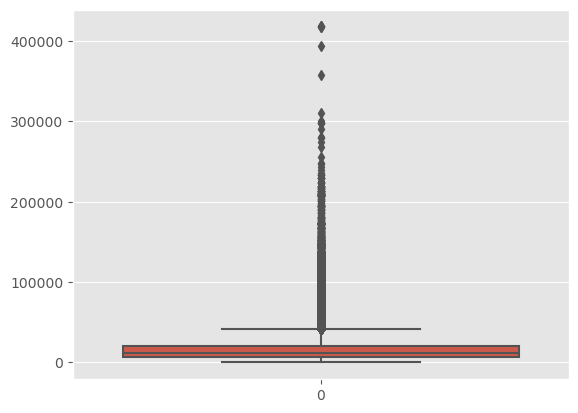

In [90]:
sns.boxplot(prev_app.AMT_ANNUITY)
prev_app.AMT_ANNUITY.fillna(prev_app.AMT_ANNUITY.median(), inplace=True)

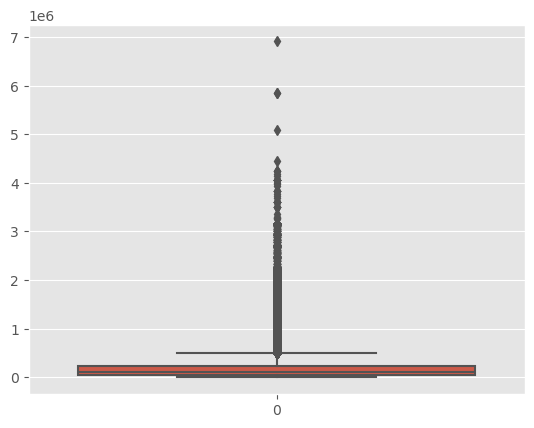

In [91]:
sns.boxplot(prev_app.AMT_GOODS_PRICE)
prev_app.AMT_GOODS_PRICE.fillna(prev_app.AMT_GOODS_PRICE.median(), inplace=True)

CNT_PAYMENT
12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
Name: count, dtype: int64


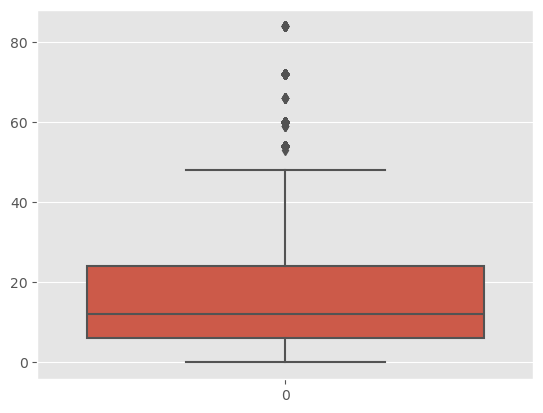

In [92]:
sns.boxplot(prev_app.CNT_PAYMENT)
print(prev_app.CNT_PAYMENT.value_counts().head())
prev_app.CNT_PAYMENT.fillna(prev_app.CNT_PAYMENT.median(), inplace=True)

In [93]:
prev_app.PRODUCT_COMBINATION.value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [94]:
prev_app.PRODUCT_COMBINATION.fillna(prev_app.PRODUCT_COMBINATION.mode()[0], inplace=True)

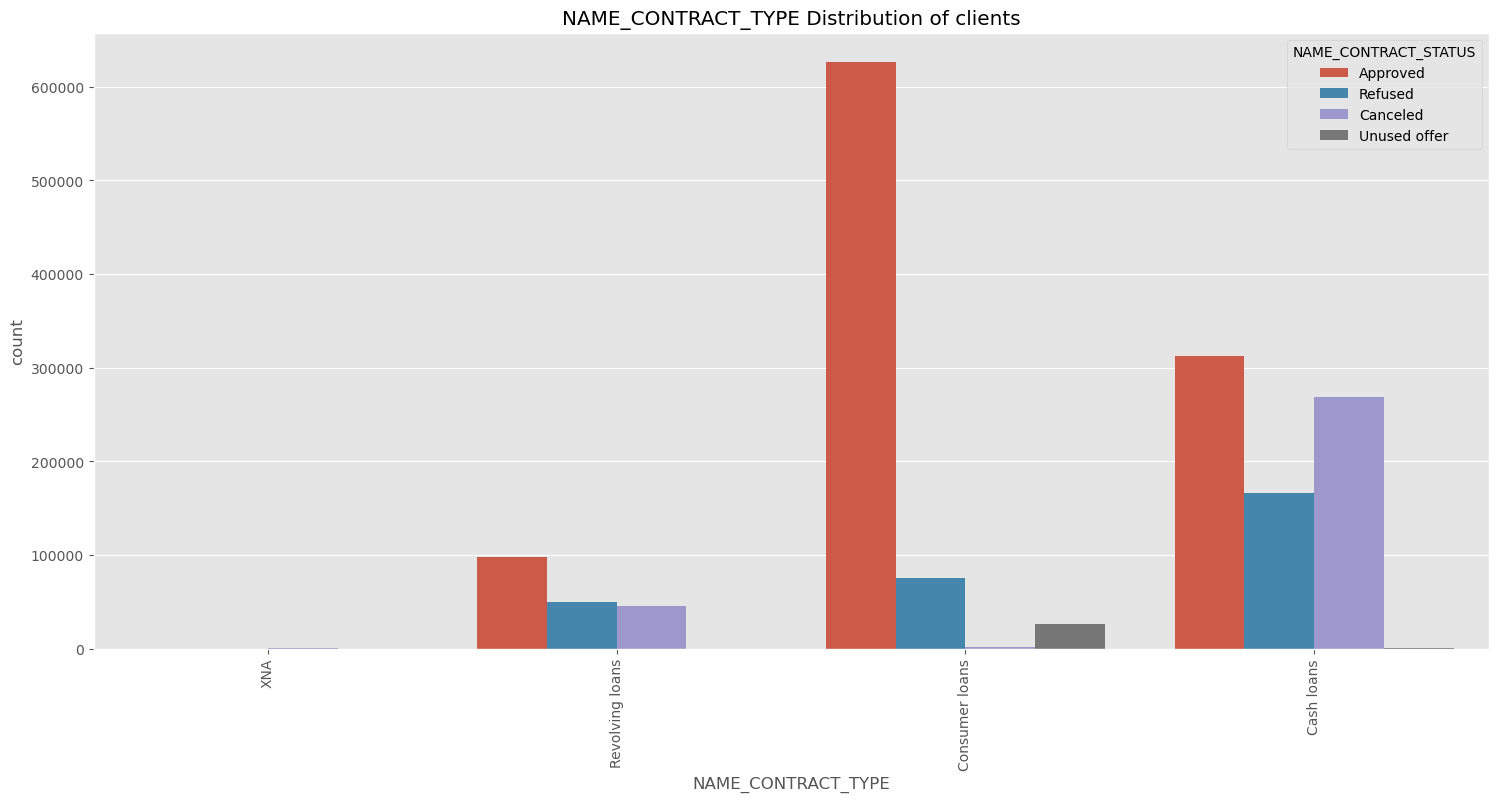

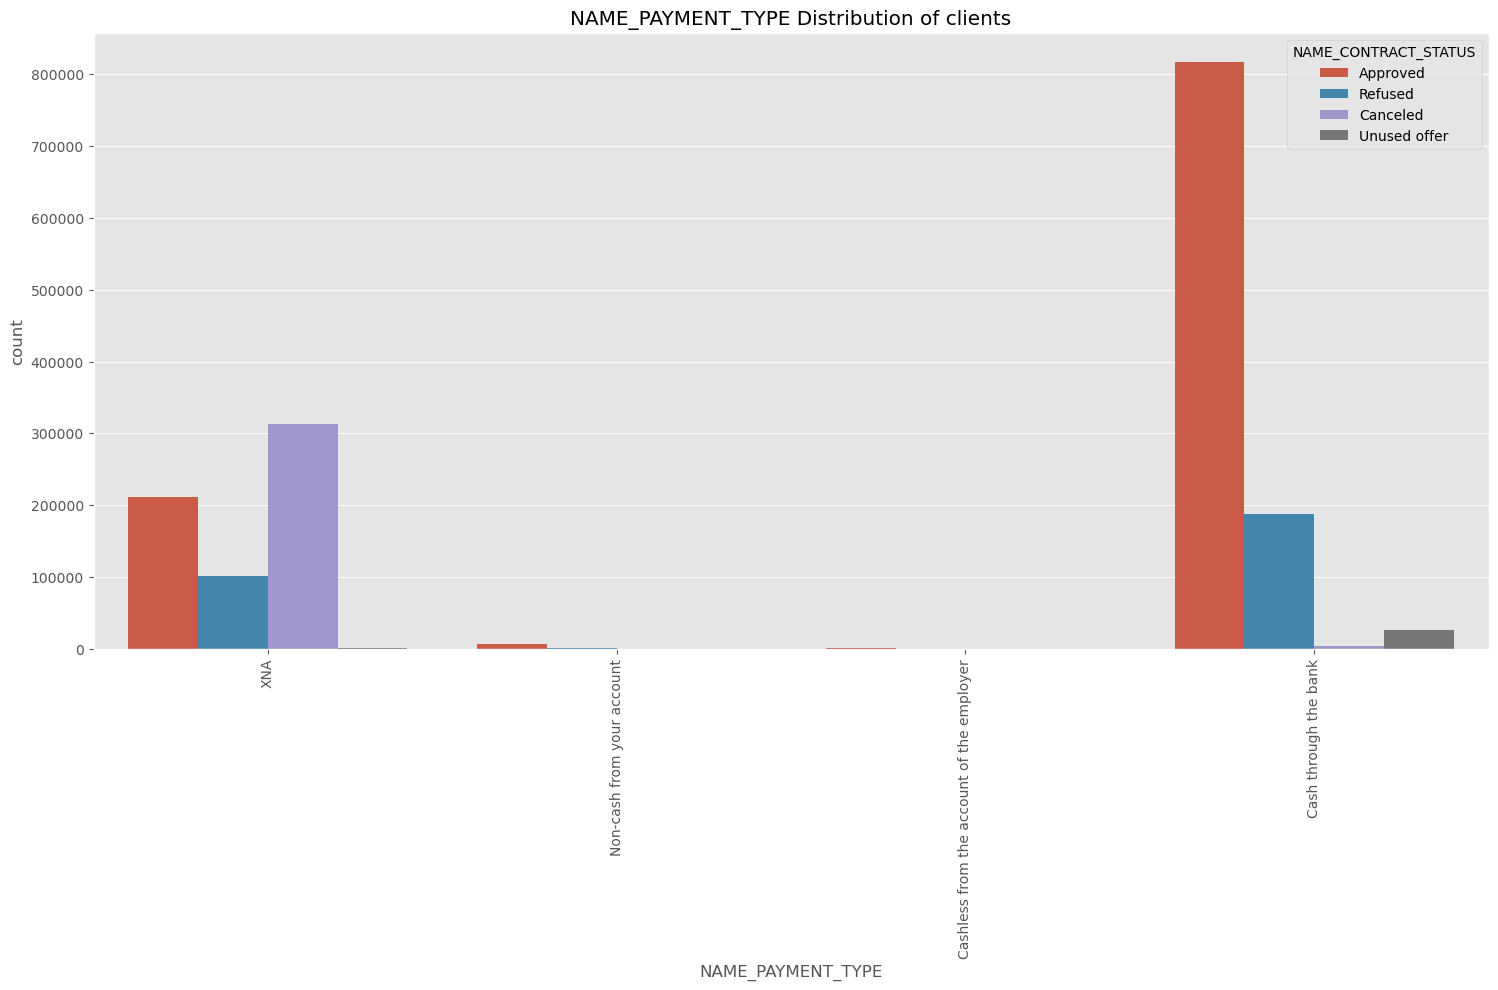

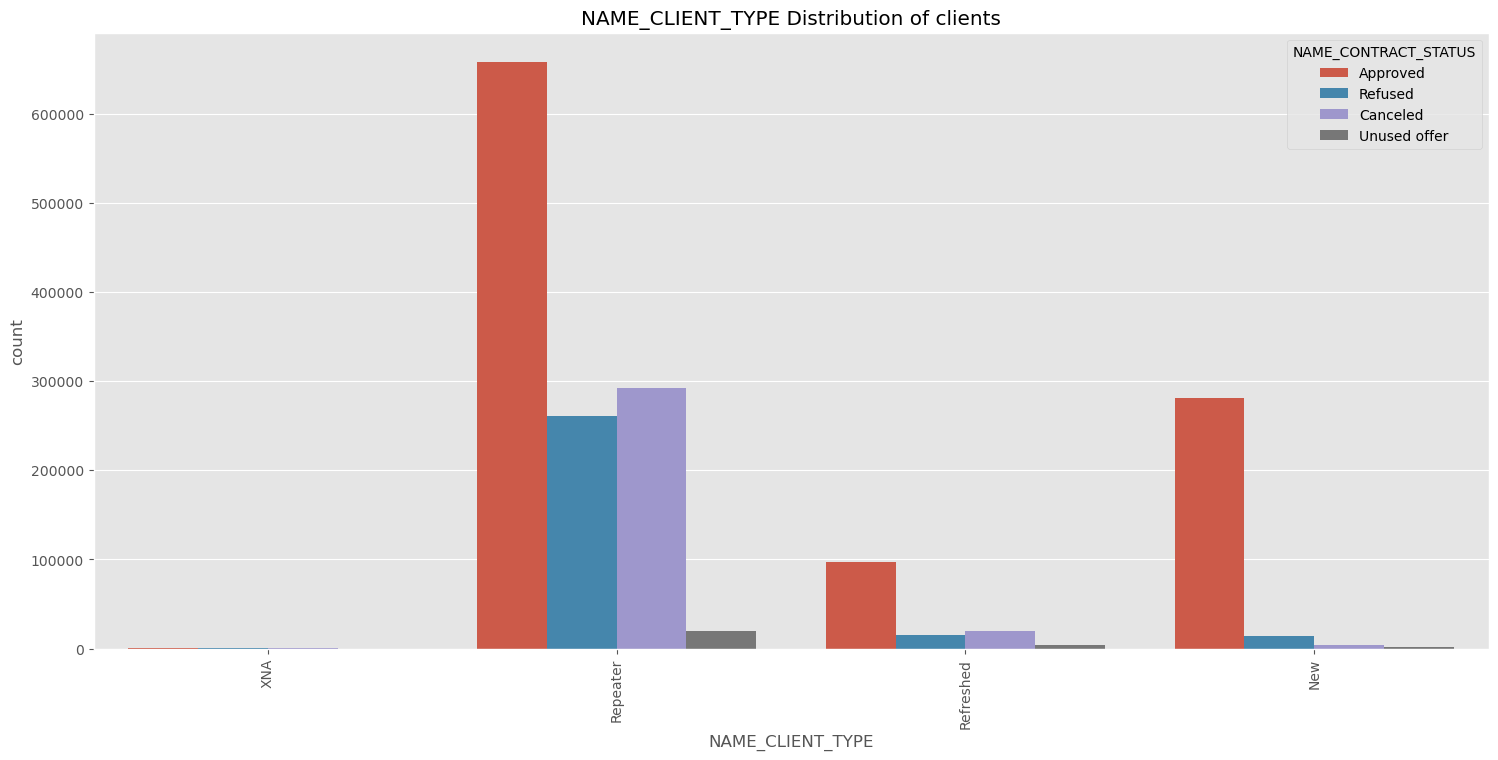

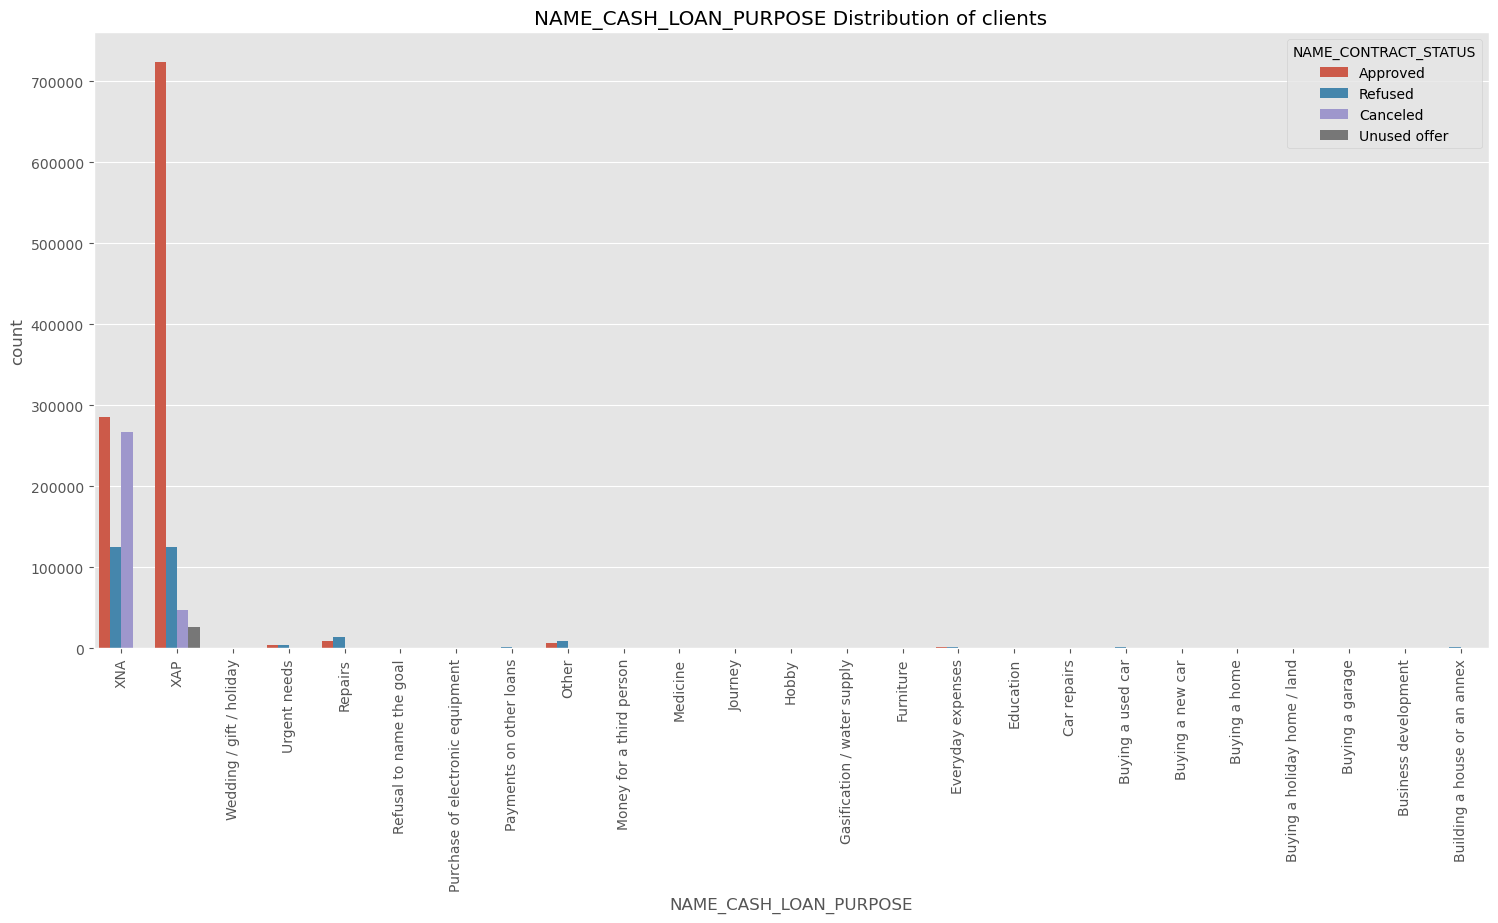

In [95]:
# Plotting a count plot on TARGET's object columns
c_plot=['NAME_CONTRACT_TYPE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE']
for i in c_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [18,8])
    plt.title(f'{i} Distribution of clients')
    sns.countplot(data=prev_app, x =i, hue='NAME_CONTRACT_STATUS', order = sorted(prev_app[i].unique(), reverse = True))
    plt.xticks(rotation = 90)

**Observations**:
* In approved category, consumer loan has largest no of applicants. 
* There seem to be no cancelled loans in cash loan category than consumer loan.
* More cash loans have been refused than consumer loans.
* The bank has more repeaters in all approved, refused, unused, cancelled categories
* POS transactions seem to be consumer loans and as stated before more cash loans have been refused than POS.

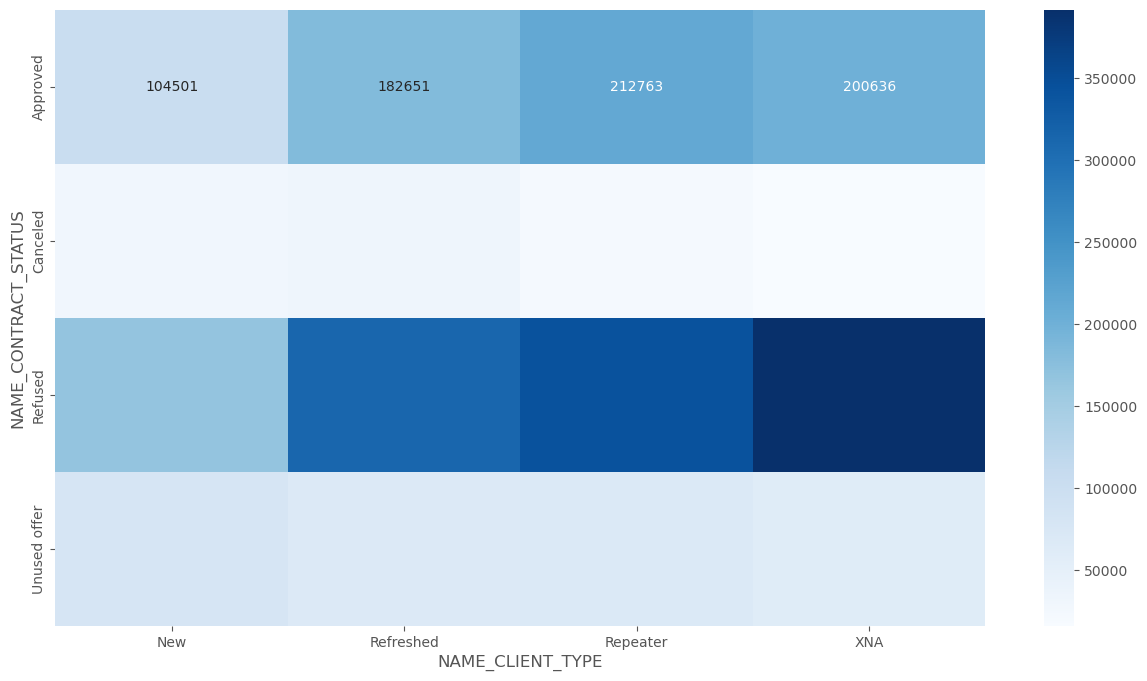

In [96]:
# Checking contract status vs name client type aggregating over application amount
res=pd.pivot_table(data=prev_app, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

**Observations**:
* Unused offer CREDIT AMOUNT is low. This may be the reason for customer not using
* Unable to understand why for cancelled and refused there should be any credit amount?

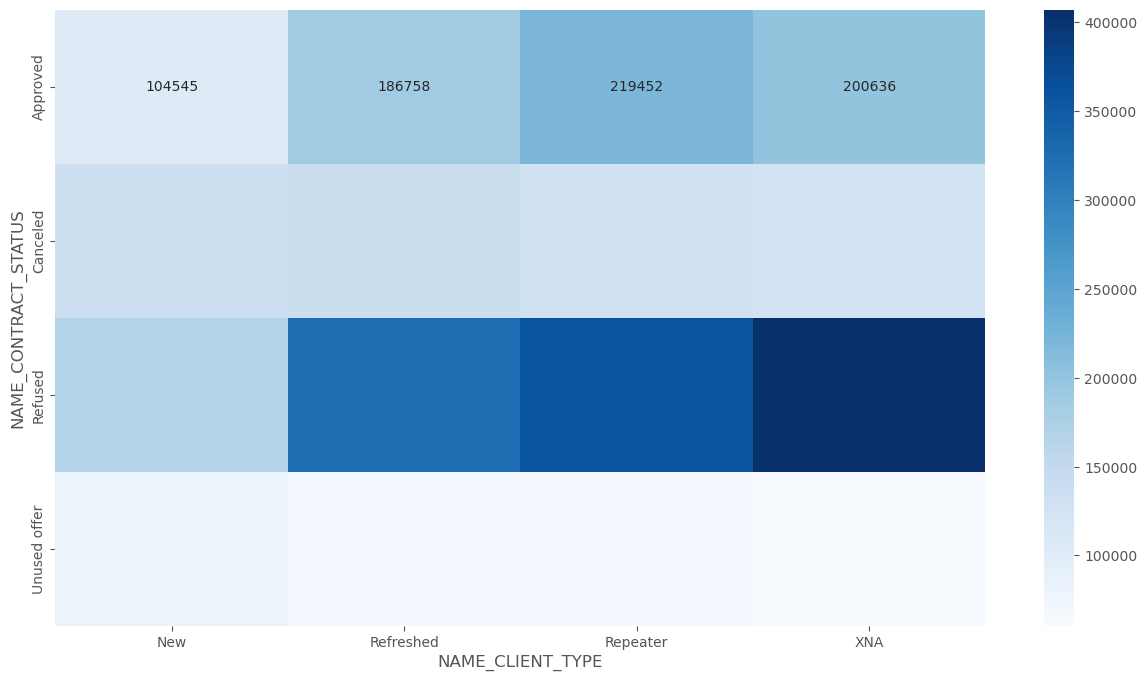

In [97]:
# Checking contract status vs name client type aggregating over AMOUNT GOOD PRICE
res=pd.pivot_table(data=prev_app, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

**Observations**:
* All cancelled and refused cases have higher value of goods than other categories

## Case Study Summary

### Chances of client havind payment difficulty
* All the below variables were established in analysis of Application dataframe as leading to default. Checked these against the Approved loans which have defaults, and it proves to be correct
 * Medium income
 * 25-35 years olds, followed by 35-45 years age group
 * Male
 * Unemployed
 * Labourers, Salesman, Drivers
 * Own House - No
* Other IMPORTANT Factors to be considered
 * No of Bureau Hits in last week. Month etc – zero hits is good
 * Amount income not correspondingly equivalent to Good Bought – Income 'Low' and 'High' is a concern
 * Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern.
* This indicates that the financial company had Refused/Cancelled previous application but has approved the current and is facing default on these. 
* Credible Applications refused
 * Unused applications have lower loan amount. Is this the reason for no usage?
 * Female applicants should be given extra weightage as defaults are lesser.
 * Students and Business mean have no problem in repayment of the loan
 * Previous applications with Refused, Cancelled, Unused loans also have cases where payments are coming on time in current application. This indicates that possibly wrong decisions were done in those cases.